**Rio de Janeiro, 29 de Junho de 2016**

Grupo: **Carlos Mattoso** _[ **1210553** ]_ e **Gabriel Siqueira** _[ **1210689** ]_

Disciplina: **INF1335 - Introdução a Data Science com R e Python**

# A4 - Grade Curricular

# *Setup* Básico

In [1]:
import numpy as np
import urllib.request
import pandas as pd
import sys
import math
import random
from collections import Counter
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

%matplotlib inline

if sys.version_info < (3,0):
    print("Este notebook foi desenvolvido com Python versão 3. Se sua máquina roda uma versão inferior, comportamento anormal deve ser esperado.")
elif sys.version_info < (3,5):
    print("Este notebook foi desenvolvido com Python versão Python 3.5.1.Se sua máquina roda uma versão inferior, pequenas diferenças podem ocorrer")
print("Sua versão do Python é " + sys.version[:5])

Sua versão do Python é 3.5.1


# Leitura Inicial dos Dados

In [2]:
# Obtém o arquivo csv e carrega num dataframe
urllib.request.urlretrieve ("https://gist.githubusercontent.com/GabrielSiq/2a592eb7ab47f604ce53cfba6f8191a8/raw/d2560c36b1c98fd74c03ef4d428aed5d7a950efe/historico_anon.csv", "historico_anon.csv")
frame = pd.read_csv('historico_anon.csv')

# Vamos dar uma olhada rápida em nossos dados
frame.head(10)

matrícula  período disciplina  créditos turma  grau sit.final  \
0   0612907    20061    AZB1132         2   QGI   7.3        AP   
1   0612907    20061    KFS1369         4   SCP   7.2        AP   
2   0612907    20061    GNR1825         2   SCP   6.8        AP   
3   0612907    20061    WRC1627         4   QGI   NaN        CA   
4   0612907    20061    WWW1814         5   QGI   NaN        CA   
5   0612907    20061    HXZ1743         2   QGI   NaN        CA   
6   0612907    20061    LMF1735         5   SCP   5.0        AP   
7   0612907    20061    HBF1988         4   QGI  10.0        AP   
8   0612907    20062    QNI1752         4   NLS   NaN        CL   
9   0612907    20062    UAM1180         3   UFI   0.0        RF   

            professor  
0   Jennifer Franklin  
1   Jocelyn Gutierrez  
2         Billy Pratt  
3    Elijah Listiadji  
4        Sierra Roach  
5        Jade Quiroga  
6         James Huynh  
7  Alexandra Williams  
8       Nicole Dailey  
9        Sylvana Vela

In [3]:
# Remove linhas de disciplinas 'Em Andamento'. (Mas aparentemente não tem nenhuma)
df = frame.loc[frame['sit.final'] != 'EA']
print(str((len(frame.index) - len(df.index))) + " linhas foram removidas.")

0 linhas foram removidas.


# Examinação dos Dados

Vamos primeiro avaliar com quantas matérias estamos lidando aqui.

In [4]:
print(str(len(df.disciplina.unique())) + " cursos únicos neste dataframe.")
print(str(len(df[np.isfinite(df['grau'])].disciplina.unique())) + " dos quais possuem notas.")

695 cursos únicos neste dataframe.
497 dos quais possuem notas.


Bastante matérias! E alunos?

In [5]:
print(str(len(df.matrícula.unique())) + " alunos únicos neste dataframe.")

599 alunos únicos neste dataframe.


Parece que também temos uma boa quantidade de alunos. O que mais podemos dizer sobre esses alunos?

In [6]:
k = df.groupby('matrícula')['período'].unique()

j = pd.DataFrame(columns=('Mat', 'Count'))
for index, row in k.iteritems():
    aux = pd.DataFrame([[index, len(row)]], columns=('Mat', 'Count'))
    j = j.append(aux)
    
print(j.describe())

            Count
count  599.000000
mean     5.071786
std      3.981965
min      1.000000
25%      2.000000
50%      4.000000
75%      8.000000
max     20.000000


Analisando o número de períodos cumpridos por cada aluno nesse dataset, podemos ver que a média está por volta de 5 (2 anos e meio), o que faz sentido considerando que a maioria dos cursos universitários tem duração planejada por volta de 8 a 9 períodos, porém muitos alunos demoram mais que isso, elevando essa média. Ao mesmo tempo, além dos alunos que desistem da faculdade logo no primeiro período (veremos mais sobre isso em breve) temos que, ao menos em disciplinas de engenharia, os primeiros 4 períodos - o ciclo básico - são um grande filtro, que acaba por desmotivar os alunos e causar desistência.

Agora, quantos desses 599 alunos será que se encontram acima do 'esperado'?

In [7]:
j[j.Count > 9].describe()

Count
count  103.000000
mean    12.009709
std      2.185043
min     10.000000
25%     10.000000
50%     12.000000
75%     13.000000
max     20.000000

Este é um número bem razoável. Cerca de 17% dos alunos encontram-se acima do considerado período esperado de formatura. É claro, não sabemos se esse dataset é verdadeiramente uma amostra aleatória. Também seria interessante ter acesso ao curso declarado do aluno no momento da matéria. Assim poderíamos calcular quantos desses alunos estão acima do tempo porque, por exemplo, trocaram de curso.

# Análises

### 1. Como é a distribuição dos graus para cada disciplina?

Disciplina: TGG1649
Estatísticas básicas:
count    106.000000
mean       5.271698
std        2.208415
min        0.400000
25%        4.075000
50%        5.900000
75%        6.575000
max        9.700000
Name: grau, dtype: float64


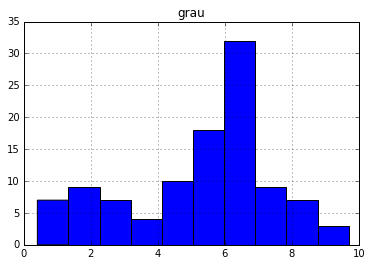



Disciplina: ZLF1756
Estatísticas básicas:
count    3.000000
mean     7.033333
std      4.445597
min      1.900000
25%      5.750000
50%      9.600000
75%      9.600000
max      9.600000
Name: grau, dtype: float64


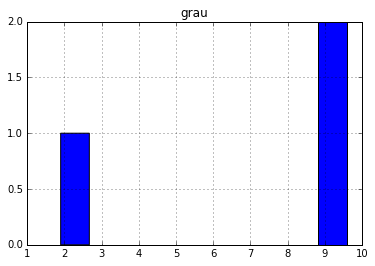



Disciplina: NHV1035
Estatísticas básicas:
count    2.000000
mean     4.150000
std      2.616295
min      2.300000
25%      3.225000
50%      4.150000
75%      5.075000
max      6.000000
Name: grau, dtype: float64


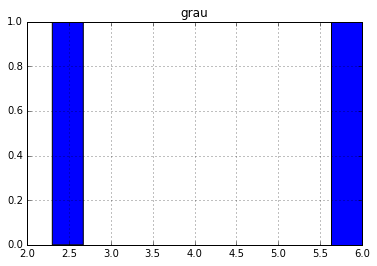



Disciplina: QQB1190
Estatísticas básicas:
count    28.000000
mean      7.407143
std       1.922947
min       0.400000
25%       6.550000
50%       7.650000
75%       8.800000
max       9.900000
Name: grau, dtype: float64


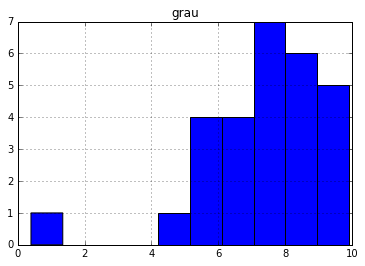



Disciplina: CXX1302
Estatísticas básicas:
count     1
mean     10
std     NaN
min      10
25%      10
50%      10
75%      10
max      10
Name: grau, dtype: float64


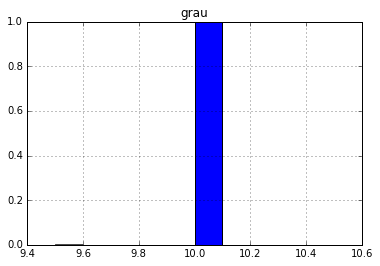



Disciplina: ATZ1234
Estatísticas básicas:
count    2.000000
mean     8.850000
std      0.353553
min      8.600000
25%      8.725000
50%      8.850000
75%      8.975000
max      9.100000
Name: grau, dtype: float64


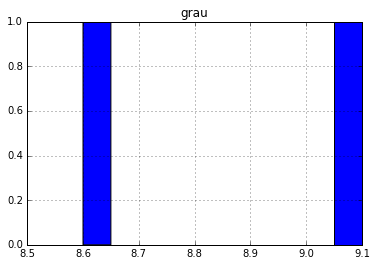



Disciplina: LES1454
Estatísticas básicas:
count    15.000000
mean      6.493333
std       1.687122
min       1.100000
25%       6.350000
50%       6.900000
75%       7.400000
max       8.200000
Name: grau, dtype: float64


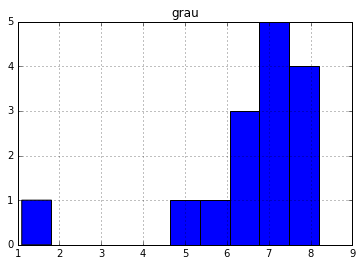



Disciplina: MKK1957
Estatísticas básicas:
count    369.000000
mean       5.830352
std        3.111078
min        0.000000
25%        3.400000
50%        6.600000
75%        8.300000
max       10.000000
Name: grau, dtype: float64


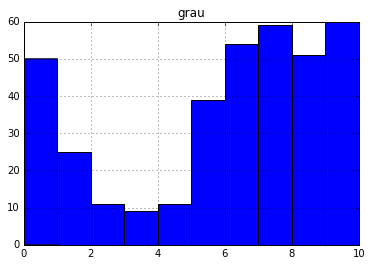



Disciplina: IMT1945
Estatísticas básicas:
count    29.000000
mean      6.600000
std       2.872779
min       0.000000
25%       6.400000
50%       7.300000
75%       8.900000
max       9.900000
Name: grau, dtype: float64


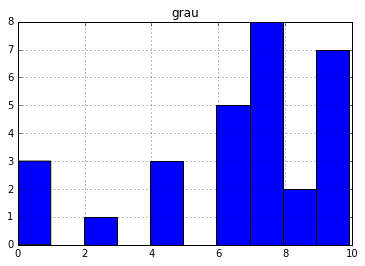



Disciplina: HAL1575
Estatísticas básicas:
count    1.0
mean     8.9
std      NaN
min      8.9
25%      8.9
50%      8.9
75%      8.9
max      8.9
Name: grau, dtype: float64


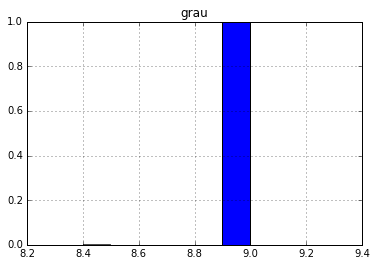



Disciplina: NWV1024
Estatísticas básicas:
count    17.000000
mean      5.994118
std       2.563803
min       0.000000
25%       5.000000
50%       6.300000
75%       8.100000
max       9.500000
Name: grau, dtype: float64


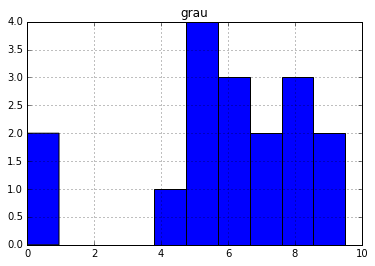



Disciplina: UCY1117
Estatísticas básicas:
count    1.0
mean     8.8
std      NaN
min      8.8
25%      8.8
50%      8.8
75%      8.8
max      8.8
Name: grau, dtype: float64


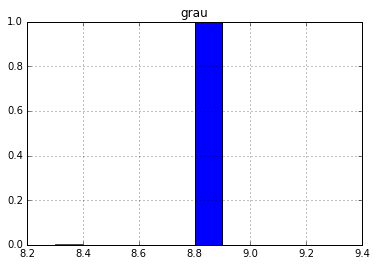



Disciplina: KBR1233
Estatísticas básicas:
count    2.000000
mean     8.750000
std      1.343503
min      7.800000
25%      8.275000
50%      8.750000
75%      9.225000
max      9.700000
Name: grau, dtype: float64


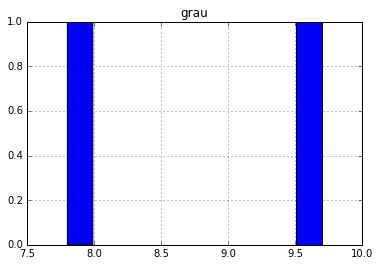



Disciplina: HDB1295
Estatísticas básicas:
count    1.0
mean     5.1
std      NaN
min      5.1
25%      5.1
50%      5.1
75%      5.1
max      5.1
Name: grau, dtype: float64


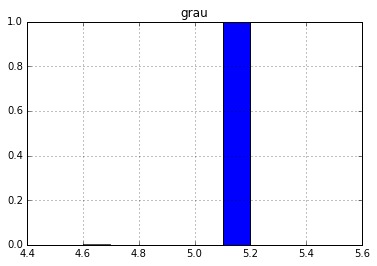



Disciplina: VKT1587
Estatísticas básicas:
count    2.000000
mean     8.800000
std      0.707107
min      8.300000
25%      8.550000
50%      8.800000
75%      9.050000
max      9.300000
Name: grau, dtype: float64


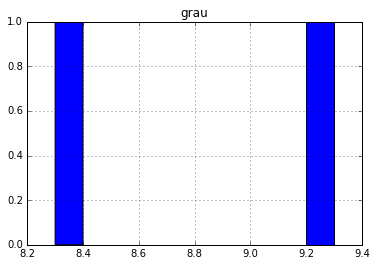

In [8]:
%matplotlib inline
random.seed(1234)

# Como temos um número muito grande de disciplinas, vamos exibir estatísticas básicas 
# e o histograma para uma seleção aleatória de 15 disciplinas desse dataset
for d in np.random.choice(df[np.isfinite(df['grau'])].disciplina.unique(), size=15):
    print("Disciplina: " + d)
    print("Estatísticas básicas:")
    print(df[df['disciplina'] == d]['grau'].describe())
    df[df['disciplina'] == d].hist(column= 'grau')
    plt.show()
    print("\n")


### 2. Quais disciplinas têm maior evasão (cancelamento)? E menor?

Vamos dividir essa análise em duas partes. Em termos relativos e em termos absolutos. Por que? Bem, o motivo é que há matérias que são muito cursadas e, naturalmente, possuem muitos cancelamentos. Esse tipo de caso iria esconder matérias que, por exemplo, possuem poucos alunos e uma grande parte tranca. Para isso, precisamos calcular a evasão também em termos relativos.

Em termos relativos, esses são os 10 cursos com a menor taxa de evasão, excetuando-se aqueles com 0 evasão.

In [9]:
cancelation = df[df['sit.final'].isin(['CA', 'CD', 'CL', 'DT', 'LT'])]
course_count = df.groupby('disciplina').size()
cancelation = cancelation.groupby('disciplina').size()
canc_rate = (cancelation/course_count).dropna()

print(canc_rate.sort_values().head(10))

disciplina
QVN1693    0.028571
XOA1296    0.031250
PSW1036    0.031250
OLC1422    0.033333
RHY1360    0.040000
NWV1024    0.041667
CAB1609    0.050000
GNR1825    0.050000
KSK1537    0.052632
TBP1888    0.058824
dtype: float64


Também em termos relativos, esses são os cursos com a maior taxa de evasão.

In [10]:
print(canc_rate.sort_values(ascending=False).head(10))

disciplina
ZUP1734    1
EIE1208    1
SIP1097    1
FUF1766    1
FTW1631    1
FOU1047    1
FLT1231    1
FLH1307    1
FEN1372    1
ESL1478    1
dtype: float64


Interessante também é o resultado que obtemos se removermos os cursos com 100% de evasão. (talvez por cancelamento da disciplina, não ter alunos suficientes). A lista muda totalmente, e a maior taxa de evasão passa a ser 75%.

In [11]:
print(canc_rate[canc_rate != 1].sort_values(ascending=False).head(10))

disciplina
TBC1529    0.750000
EFV1885    0.666667
ZQT1470    0.666667
QIS1835    0.666667
NNK1908    0.666667
BZY1224    0.625000
UZV1886    0.615385
YGX1761    0.600000
NNE1938    0.600000
EEY1789    0.600000
dtype: float64


Já em termos absolutos, estes são os cursos com maior evasão.

In [12]:
print(cancelation.sort_values(ascending=False).head(10))

disciplina
AKJ1977    239
GLJ1776    129
GOZ1785    117
OBK1818    110
DWU1433    103
HCV1283     94
PBJ1031     93
MKK1957     89
QNI1752     85
ZAB1614     83
dtype: int64


Por último, temos vários cursos com 0 evasão. Selecionamos uma amostra de 10 deles.

In [13]:
random.sample((set(course_count.keys().unique())-set(cancelation.keys().unique())),10)

['ROP1560',
 'FRS1922',
 'IQX1362',
 'KBS1764',
 'HTG1268',
 'ZOQ1175',
 'YFY1147',
 'SPS1565',
 'XRK1471',
 'VMN1629']

### 3. Quais disciplinas os alunos fazem mais vezes (por que cancelam ou são reprovados)?

Aqui pegamos as matérias cuja situação final foi marcada como reprovado ou alguma forma de cancelamento durante o período letivo, excluindo os cancelamentos no DePara/Administrativos.
Podemos listar então os top 10 cursos com maior número de reprovações e cancelamento

In [14]:
cancel_fail = df[df['sit.final'].isin(['CA', 'CD', 'CL', 'DT', 'LT', 'RF', 'RM'])]
cancel_fail = cancel_fail.groupby('disciplina').size().sort_values(ascending=False).head(10)
print(cancel_fail)
    

disciplina
AKJ1977    384
GOZ1785    302
GLJ1776    293
OBS1959    242
OBK1818    217
PBJ1031    214
DWU1433    197
GUO1361    196
MKK1957    195
HCV1283    157
dtype: int64


### 4. Qual é a proporção de alunos AP, RM, RF, CL e outros para cada (disciplina, período relativo)?

Aqui podemos ver que há muitos pares de disciplina/período sem alunos aprovados ou reprovados, mas com 100% em outros. Se prestarmos atenção especialmente para esses casos, podemos ver que eles se dão principalmente por transferência de crédito, ou seja, matérias transferidas como equivalência de outras universidades. Se o dataset for relativo à PUC, por exemplo, já podemos concluir que essas transferências não englobam intercâmbio acadêmico, visto que as matérias vindas por este meio são cadastradas como AP, com grau e etc.

In [15]:
for group in df.groupby(['disciplina', 'período']):
    print(group[0])
    print("AP: " + str(len(group[1][group[1]['sit.final'] == 'AP'])/len(group[1])))
    print("RM: " + str(len(group[1][group[1]['sit.final'] == 'RM'])/len(group[1])))
    print("RF: " + str(len(group[1][group[1]['sit.final'] == 'RF'])/len(group[1])))
    print("CL: " + str(len(group[1][group[1]['sit.final'] == 'CL'])/len(group[1])))
    print("Others: " + str(len(group[1][~group[1]['sit.final'].isin(['AP', 'RM', 'RF', 'CL'])])/len(group[1])))
    # Casos em que há 100% de 'Outros'.
    if len(group[1][~group[1]['sit.final'].isin(['AP', 'RM', 'RF', 'CL'])])/len(group[1]) == 1:
        print(group[1]['sit.final'])

('ABA1055', 20062)
AP: 0.0
RM: 0.0
RF: 0.0
CL: 0.0
Others: 1.0
13314    CT
Name: sit.final, dtype: object
('ABA1055', 20101)
AP: 0.0
RM: 0.0
RF: 0.0
CL: 0.0
Others: 1.0
17352    CT
Name: sit.final, dtype: object
('ABA1055', 20102)
AP: 0.0
RM: 0.0
RF: 0.0
CL: 0.0
Others: 1.0
17790    CT
Name: sit.final, dtype: object
('ABV1916', 20081)
AP: 1.0
RM: 0.0
RF: 0.0
CL: 0.0
Others: 0.0
('ABV1916', 20092)
AP: 1.0
RM: 0.0
RF: 0.0
CL: 0.0
Others: 0.0
('ADF1370', 20031)
AP: 1.0
RM: 0.0
RF: 0.0
CL: 0.0
Others: 0.0
('ADF1370', 20062)
AP: 0.0
RM: 0.0
RF: 0.0
CL: 0.0
Others: 1.0
13343    CT
Name: sit.final, dtype: object
('ADF1370', 20102)
AP: 0.0
RM: 0.0
RF: 0.0
CL: 0.0
Others: 1.0
17938    CT
Name: sit.final, dtype: object
('AFE1114', 20102)
AP: 0.75
RM: 0.0
RF: 0.0
CL: 0.0
Others: 0.25
('AFE1114', 20111)
AP: 1.0
RM: 0.0
RF: 0.0
CL: 0.0
Others: 0.0
('AFE1114', 20112)
AP: 0.6
RM: 0.0
RF: 0.0
CL: 0.0
Others: 0.4
('AFE1114', 20121)
AP: 0.6666666666666666
RM: 0.0
RF: 0.0
CL: 0.0
Others: 0.33333333333333

### 5. Em quais períodos do curso (relativos à matrícula do aluno) cada disciplina é mais cursada? Sugestão: faça um gráfico de barras indicando número de matriculados por período (relativo à matrícula do aluno)

Com base na lista de períodos cursados por aluno, calculada na **Examinação dos Dados**, podemos então, para cada registro de disciplina, determinar em que período o aluno estava.

In [16]:
for index, row in df.iterrows():
    df.loc[index, "período corrente"] = k[row['matrícula']].tolist().index(row['período'])+1

Assim, agrupamos por disciplina e descobrimos, para cada disciplina, em que período é mais comumente cursada. Em caso de empate, podemos ainda observar o histograma para ver como essa distribuição acontece.

ABA1055
É mais comum no 1.0 período.


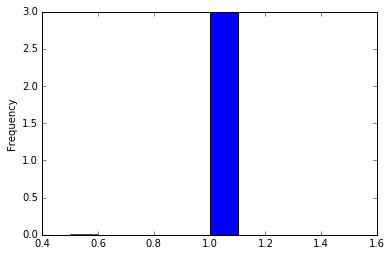

ABV1916
É mais comum no 3.0 período.


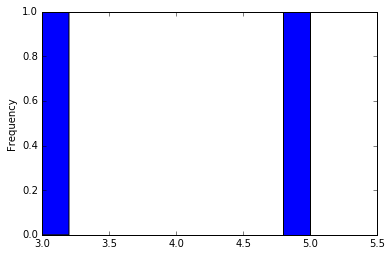

ADF1370
É mais comum no 1.0 período.


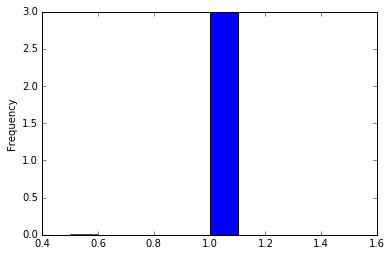

AFE1114
É mais comum no 8.0 período.


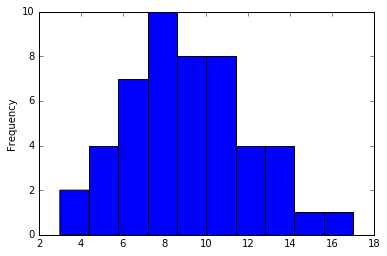

AGB1488
É mais comum no 2.0 período.


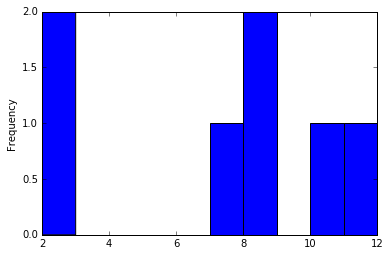

AGD1579
É mais comum no 8.0 período.


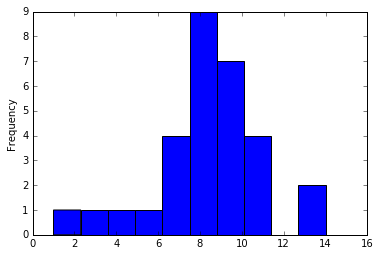

AGM1083
É mais comum no 7.0 período.


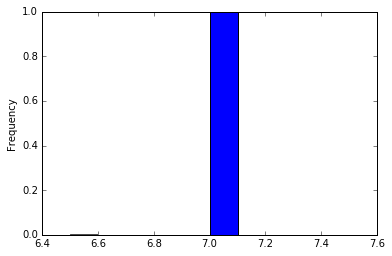

AGO1440
É mais comum no 1.0 período.


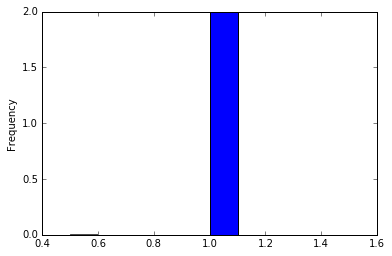

AHF1401
É mais comum no 3.0 período.


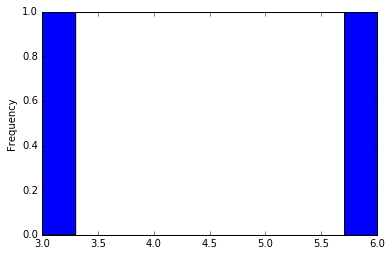

AHR1808
É mais comum no 4.0 período.


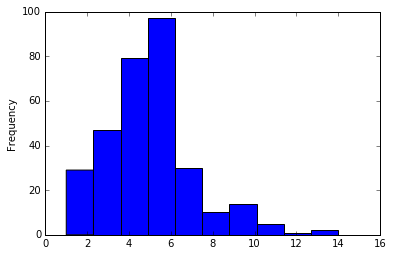

AKC1421
É mais comum no 11.0 período.


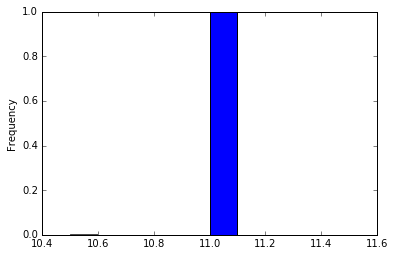

AKJ1977
É mais comum no 2.0 período.


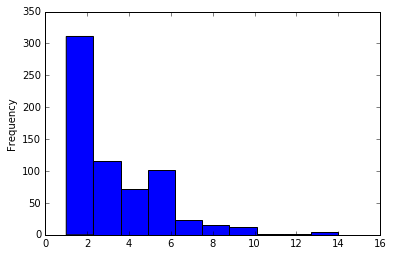

ALF1547
É mais comum no 1.0 período.


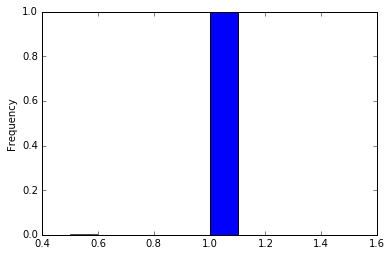

AML1436
É mais comum no 2.0 período.


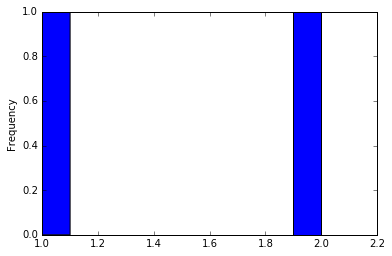

AMP1538
É mais comum no 4.0 período.


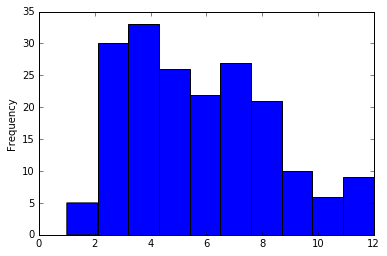

AOR1164
É mais comum no 5.0 período.


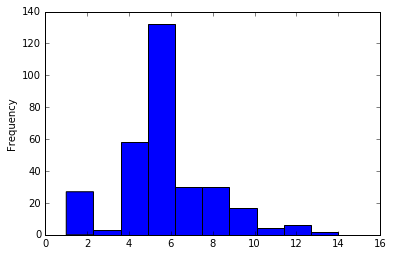

APF1864
É mais comum no 9.0 período.


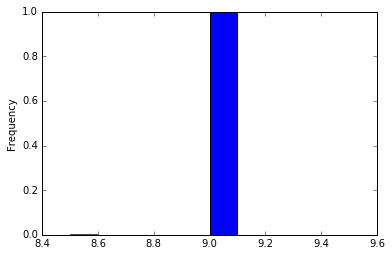

APX1748
É mais comum no 10.0 período.


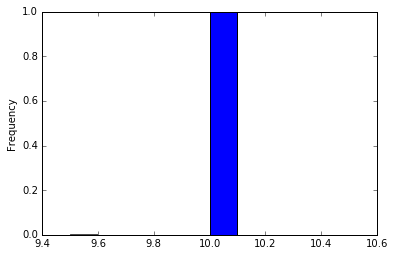

APY1237
É mais comum no 1.0 período.


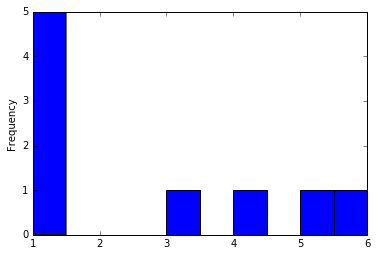

AQN1510
É mais comum no 3.0 período.


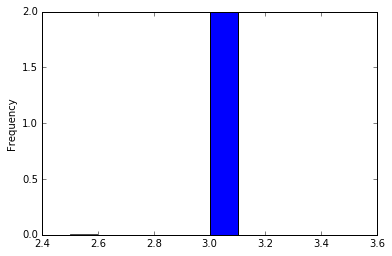

ARQ1932
É mais comum no 3.0 período.


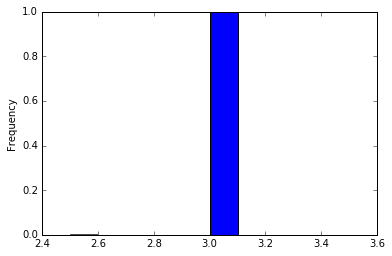

ASF1626
É mais comum no 2.0 período.


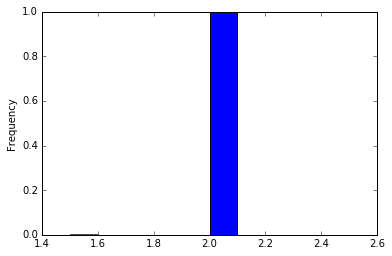

ATZ1234
É mais comum no 8.0 período.


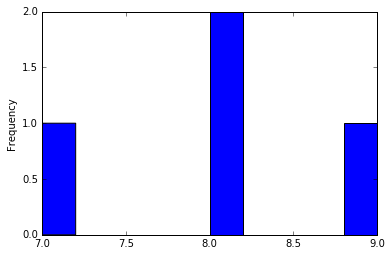

AUI1941
É mais comum no 9.0 período.


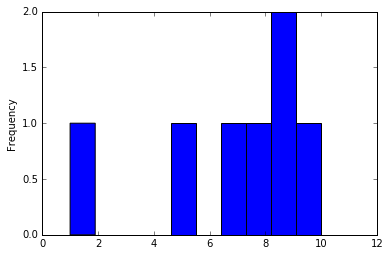

AUJ1624
É mais comum no 1.0 período.


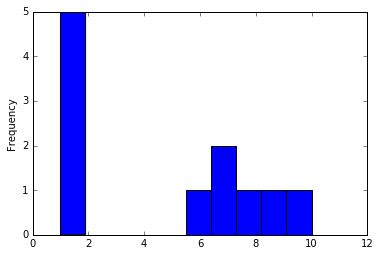

AUZ1266
É mais comum no 1.0 período.


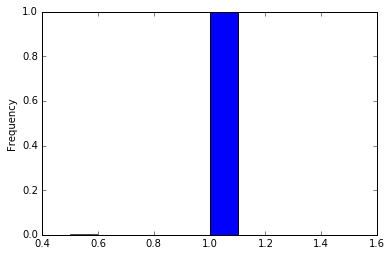

AXF1492
É mais comum no 1.0 período.


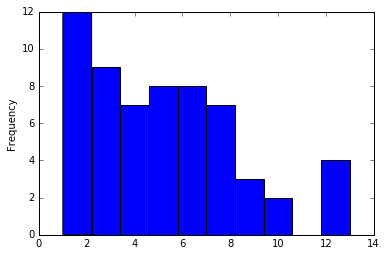

AZB1132
É mais comum no 1.0 período.


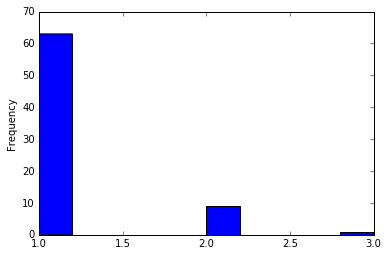

AZZ1015
É mais comum no 6.0 período.


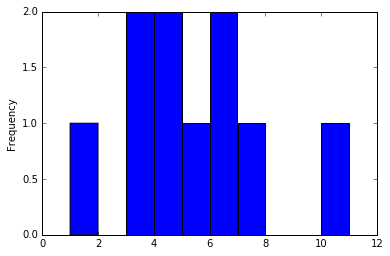

BAQ1044
É mais comum no 1.0 período.


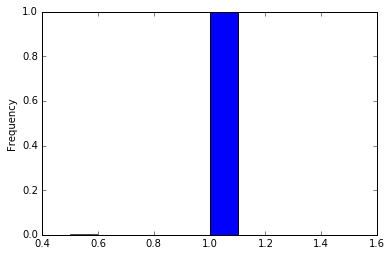

BBG1206
É mais comum no 3.0 período.


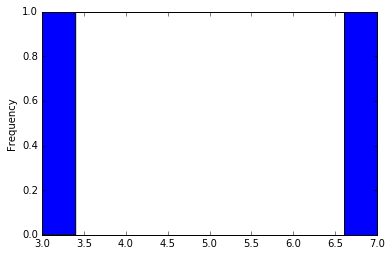

BCG1523
É mais comum no 2.0 período.


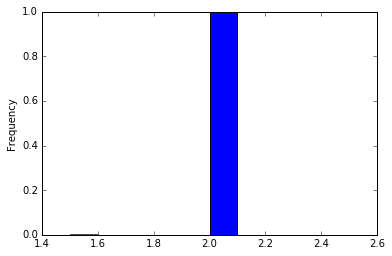

BCI1518
É mais comum no 1.0 período.


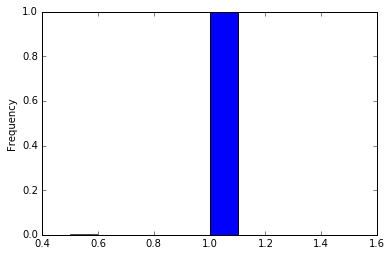

BCT1672
É mais comum no 9.0 período.


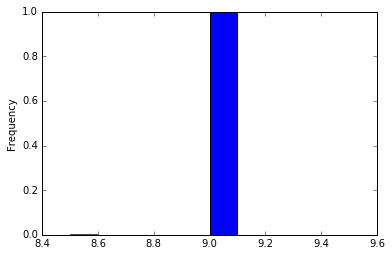

BGL1947
É mais comum no 5.0 período.


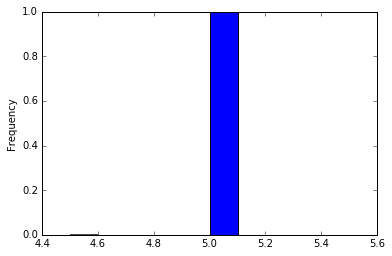

BIU1505
É mais comum no 1.0 período.


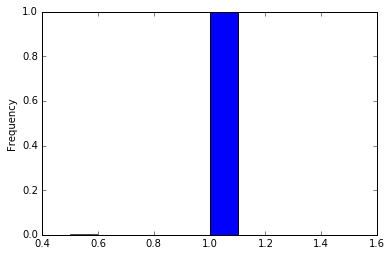

BJR1622
É mais comum no 14.0 período.


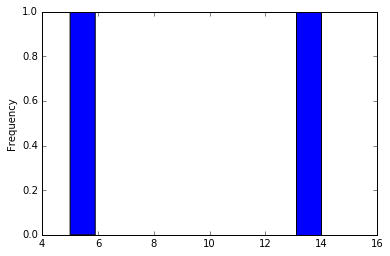

BNB1985
É mais comum no 9.0 período.


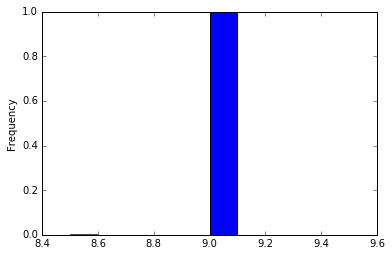

BOS1473
É mais comum no 3.0 período.


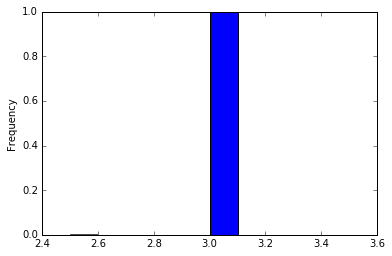

BPB1684
É mais comum no 8.0 período.


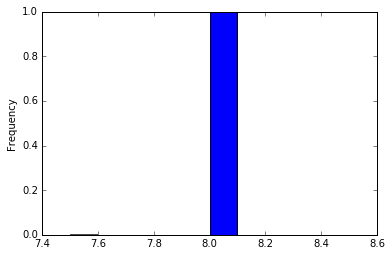

BQU1972
É mais comum no 7.0 período.


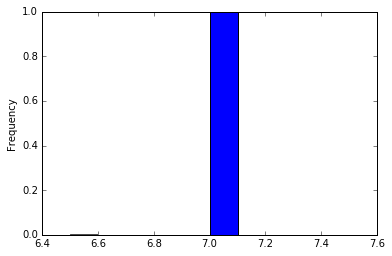

BUW1990
É mais comum no 2.0 período.


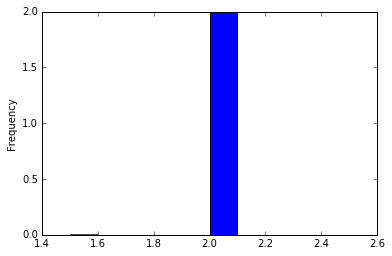

BVC1700
É mais comum no 13.0 período.


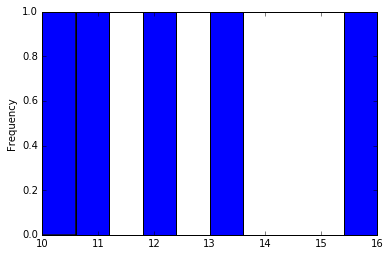

BVS1534
É mais comum no 6.0 período.


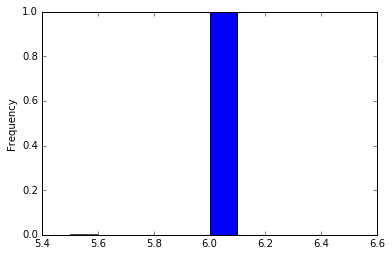

BXE1741
É mais comum no 4.0 período.


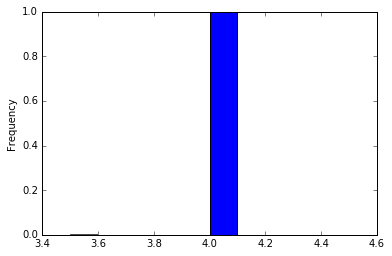

BYQ1072
É mais comum no 1.0 período.


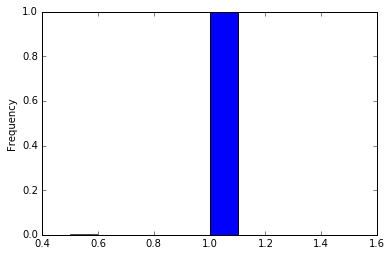

BZQ1007
É mais comum no 2.0 período.


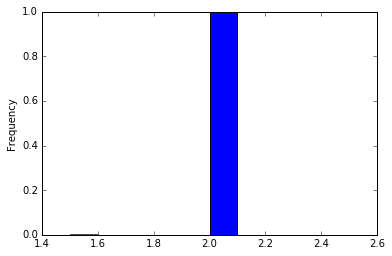

BZY1224
É mais comum no 3.0 período.


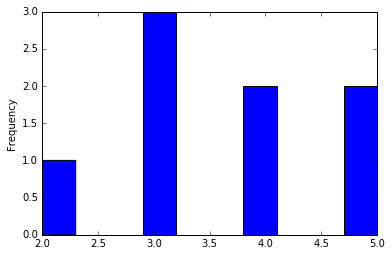

CAB1609
É mais comum no 4.0 período.


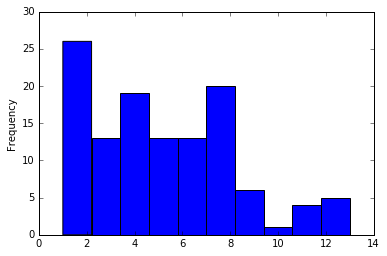

CCL1512
É mais comum no 1.0 período.


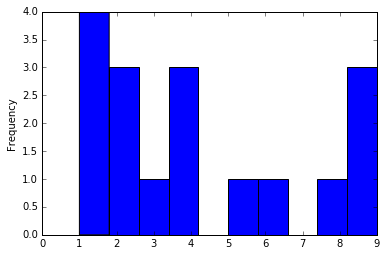

CCM1119
É mais comum no 5.0 período.


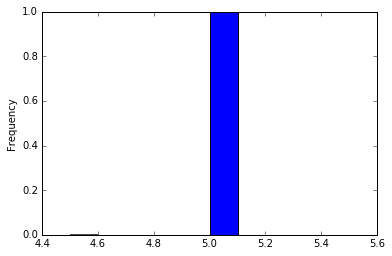

CEY1890
É mais comum no 3.0 período.


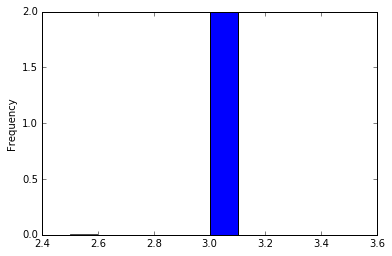

CGE1253
É mais comum no 1.0 período.


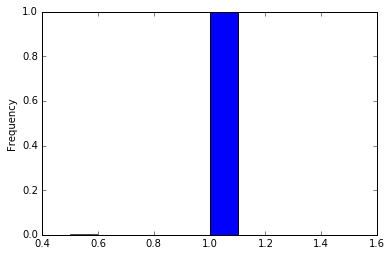

CJF1280
É mais comum no 1.0 período.


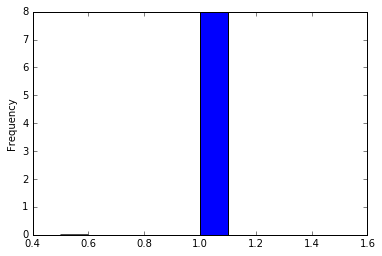

CKD1091
É mais comum no 13.0 período.


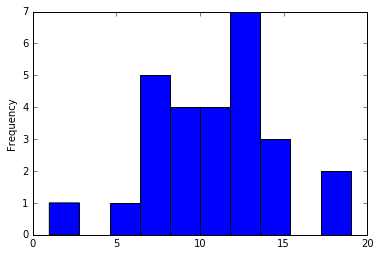

CLS1569
É mais comum no 8.0 período.


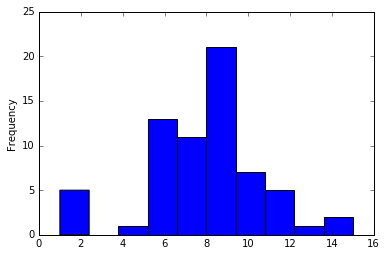

CNX1328
É mais comum no 9.0 período.


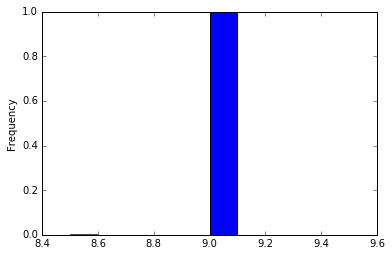

CPI1026
É mais comum no 3.0 período.


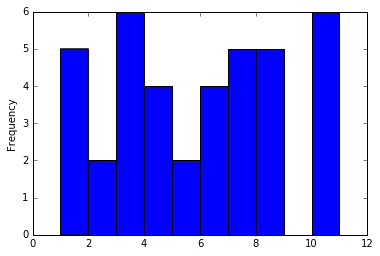

CPL1834
É mais comum no 4.0 período.


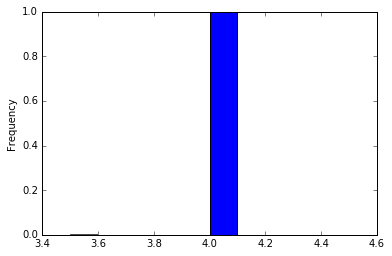

CQL1043
É mais comum no 1.0 período.


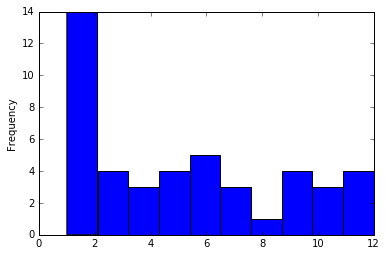

CQX1087
É mais comum no 12.0 período.


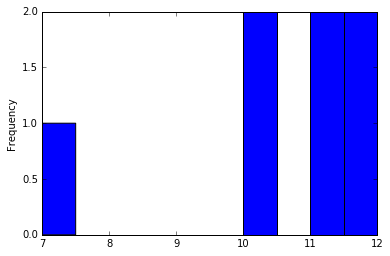

CSH1051
É mais comum no 2.0 período.


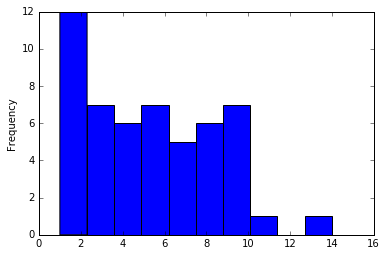

CUB1500
É mais comum no 2.0 período.


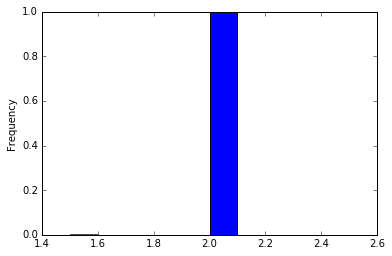

CUC1195
É mais comum no 1.0 período.


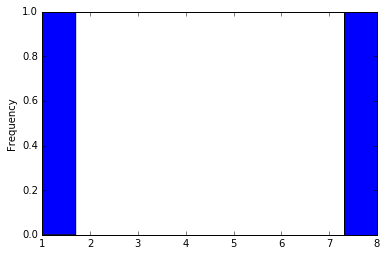

CVS1171
É mais comum no 2.0 período.


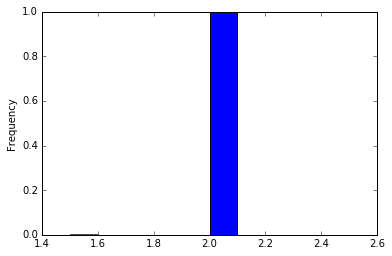

CWN1686
É mais comum no 3.0 período.


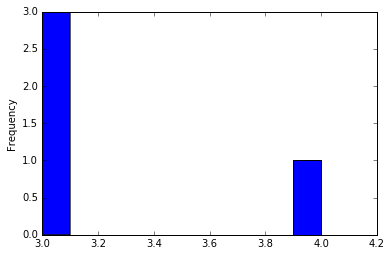

CXG1104
É mais comum no 2.0 período.


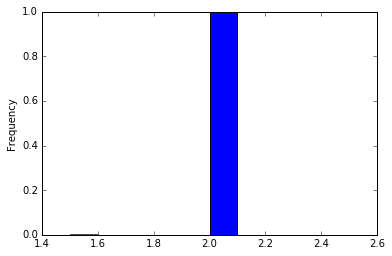

CXI1611
É mais comum no 7.0 período.


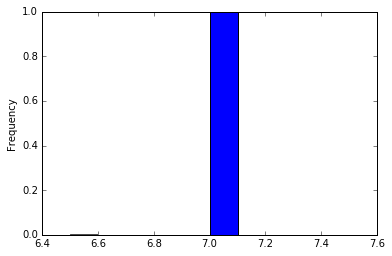

CXX1302
É mais comum no 2.0 período.


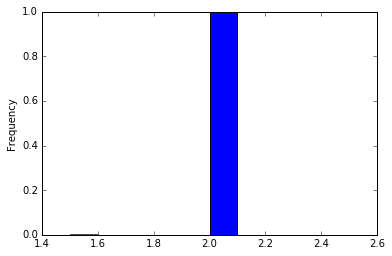

CYK1255
É mais comum no 5.0 período.


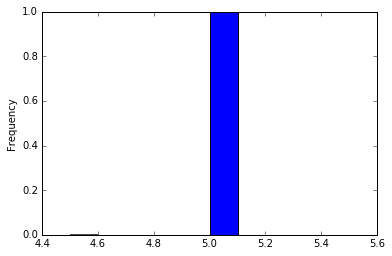

CZQ1472
É mais comum no 2.0 período.


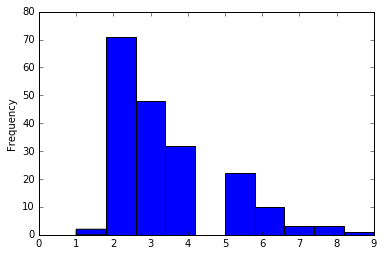

CZW1014
É mais comum no 2.0 período.


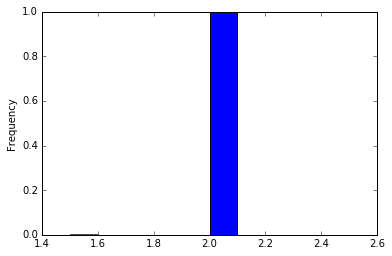

DAN1561
É mais comum no 4.0 período.


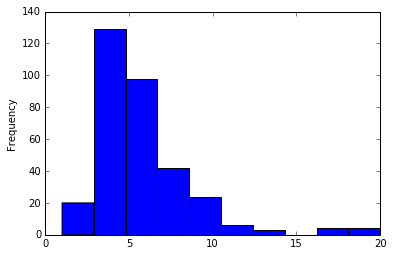

DBX1056
É mais comum no 1.0 período.


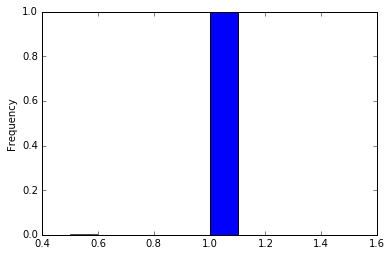

DCC1710
É mais comum no 5.0 período.


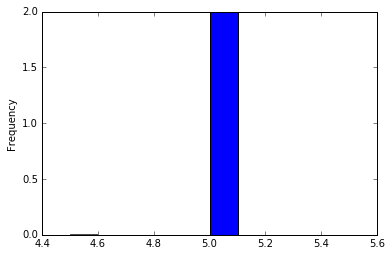

DDG1521
É mais comum no 8.0 período.


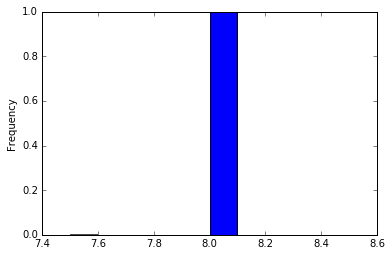

DDN1829
É mais comum no 4.0 período.


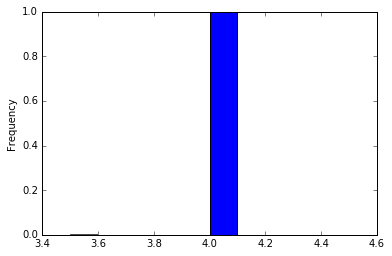

DGE1159
É mais comum no 1.0 período.


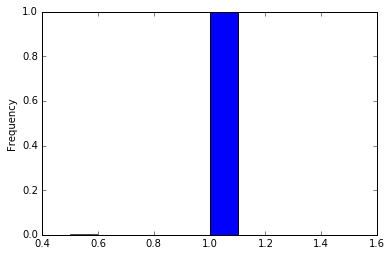

DIM1027
É mais comum no 2.0 período.


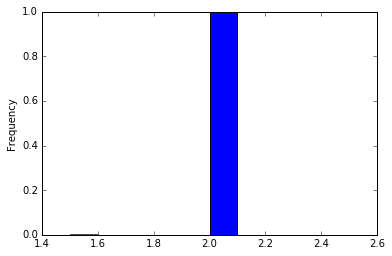

DKZ1576
É mais comum no 3.0 período.


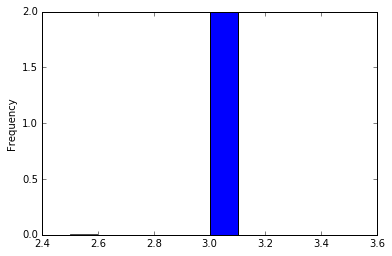

DLB1348
É mais comum no 5.0 período.


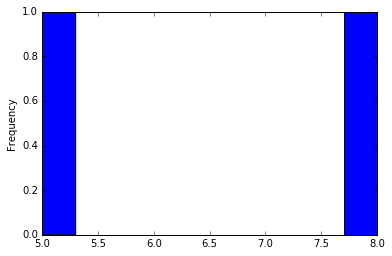

DLI1136
É mais comum no 10.0 período.


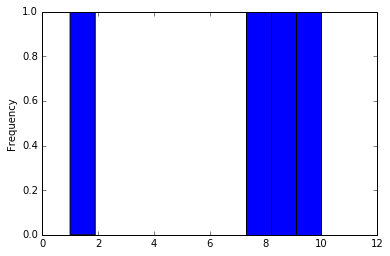

DMN1610
É mais comum no 3.0 período.


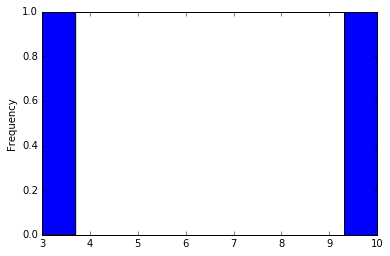

DOF1526
É mais comum no 6.0 período.


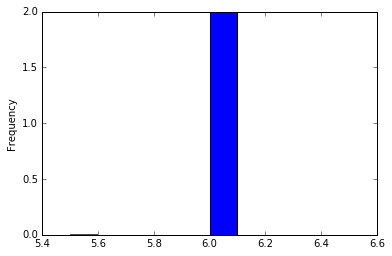

DOI1181
É mais comum no 4.0 período.


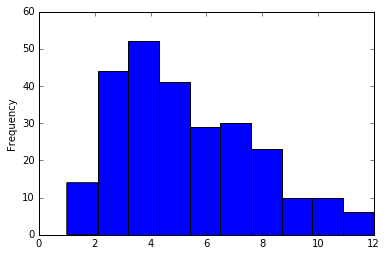

DPP1284
É mais comum no 1.0 período.


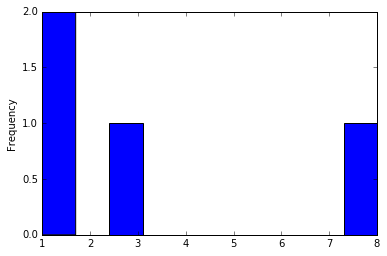

DPT1432
É mais comum no 1.0 período.


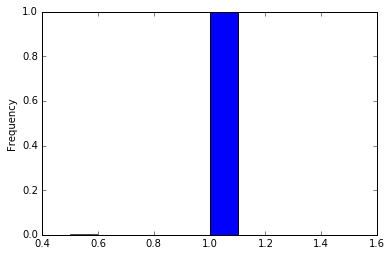

DQT1989
É mais comum no 1.0 período.


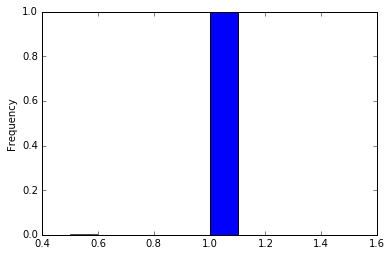

DSB1025
É mais comum no 7.0 período.


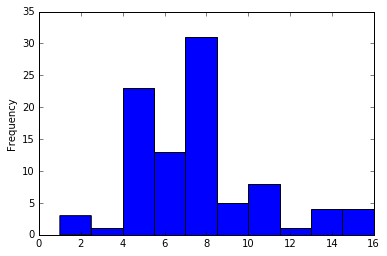

DSZ1232
É mais comum no 1.0 período.


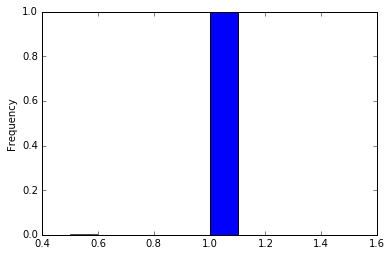

DUP1580
É mais comum no 10.0 período.


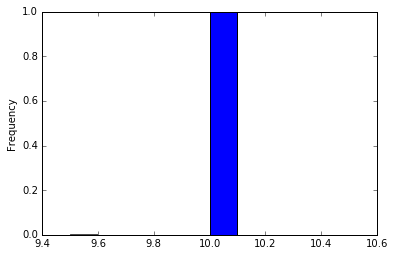

DUR1305
É mais comum no 3.0 período.


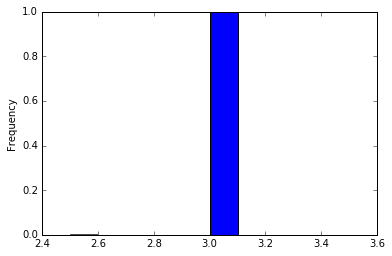

DVE1554
É mais comum no 10.0 período.


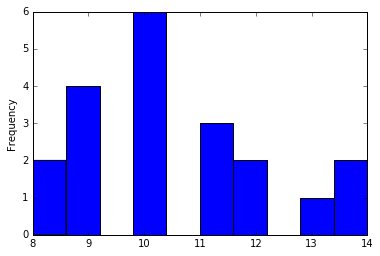

DWU1433
É mais comum no 1.0 período.


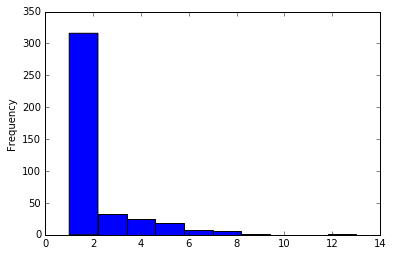

DYT1914
É mais comum no 4.0 período.


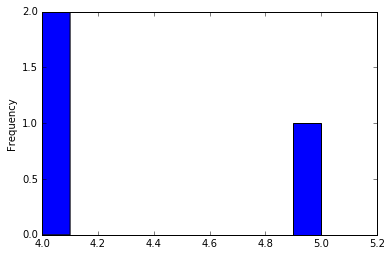

DZV1691
É mais comum no 4.0 período.


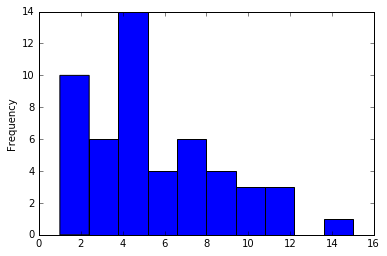

EBS1850
É mais comum no 2.0 período.


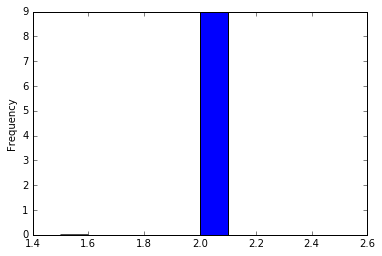

ECJ1336
É mais comum no 1.0 período.


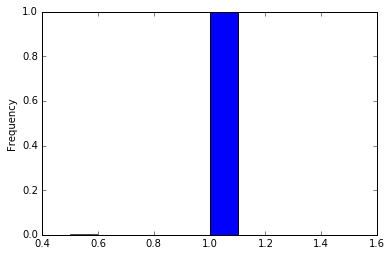

ECS1920
É mais comum no 3.0 período.


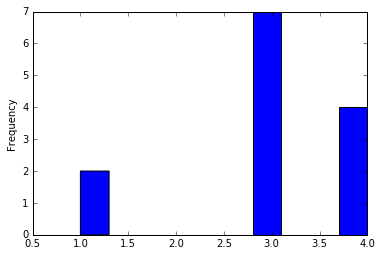

EEM1373
É mais comum no 1.0 período.


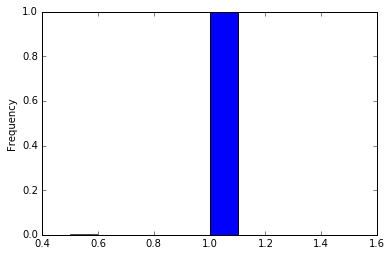

EEY1789
É mais comum no 3.0 período.


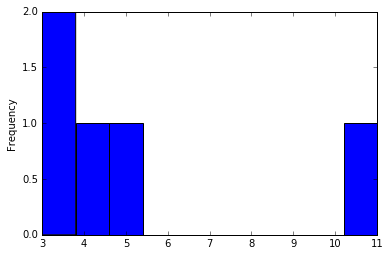

EFJ1215
É mais comum no 5.0 período.


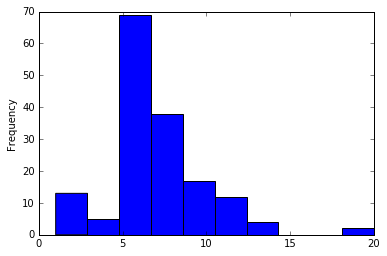

EFV1885
É mais comum no 1.0 período.


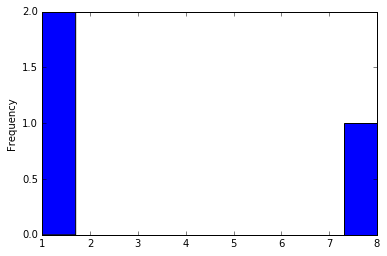

EGB1134
É mais comum no 6.0 período.


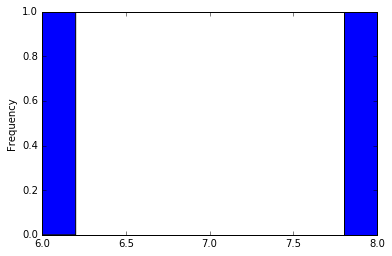

EGH1359
É mais comum no 1.0 período.


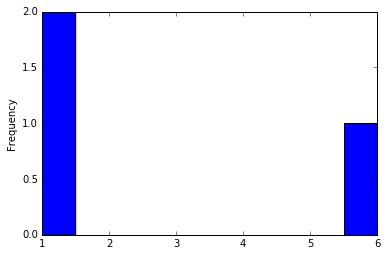

EIE1208
É mais comum no 9.0 período.


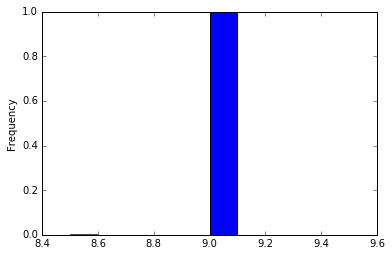

EIZ1844
É mais comum no 15.0 período.


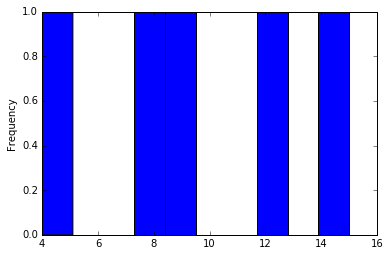

EKD1678
É mais comum no 3.0 período.


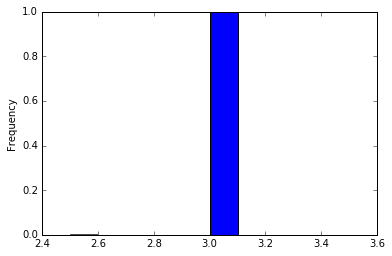

ELK1236
É mais comum no 4.0 período.


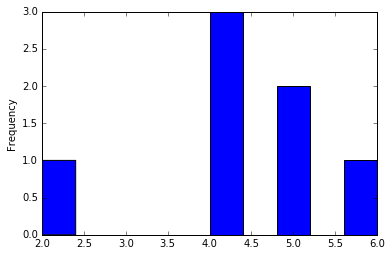

EMO1011
É mais comum no 3.0 período.


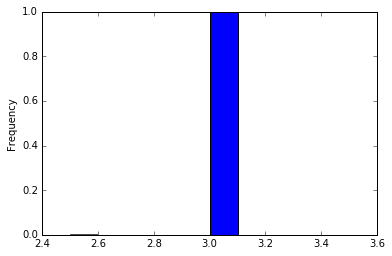

EPJ1765
É mais comum no 1.0 período.


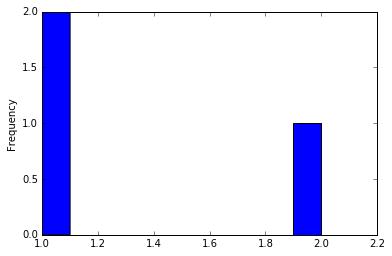

EPU1860
É mais comum no 1.0 período.


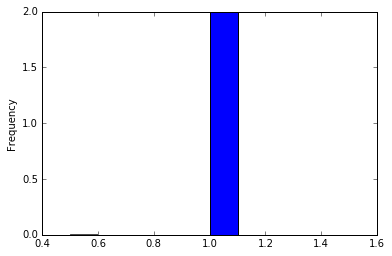

EQS1093
É mais comum no 8.0 período.


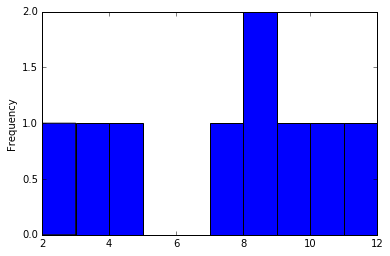

ERA1874
É mais comum no 2.0 período.


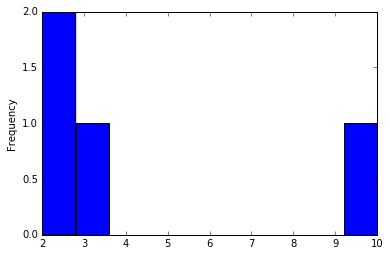

ERI1772
É mais comum no 7.0 período.


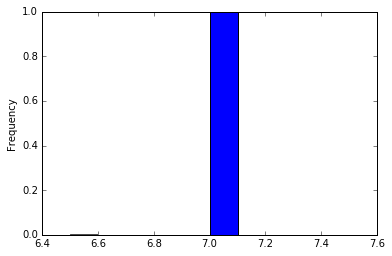

ESL1478
É mais comum no 4.0 período.


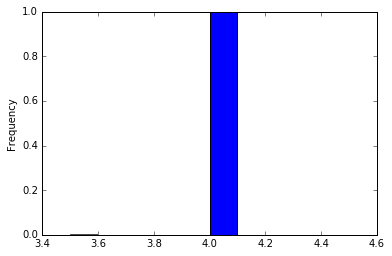

ETY1760
É mais comum no 2.0 período.


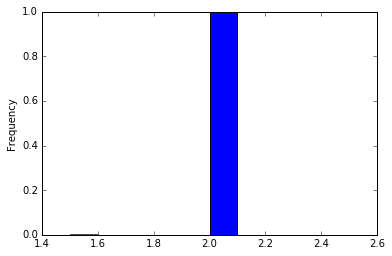

EUB1456
É mais comum no 14.0 período.


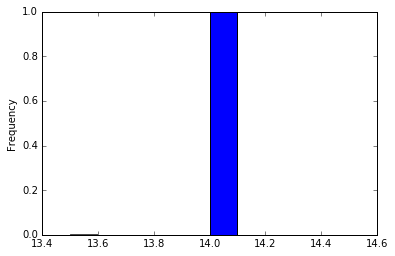

EVR1861
É mais comum no 7.0 período.


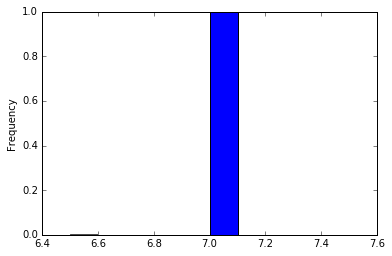

EWG1870
É mais comum no 13.0 período.


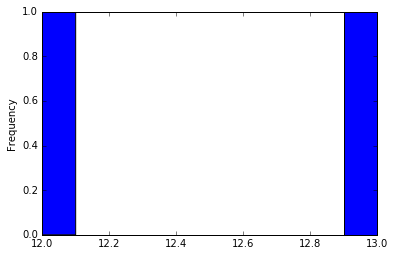

EYJ1805
É mais comum no 1.0 período.


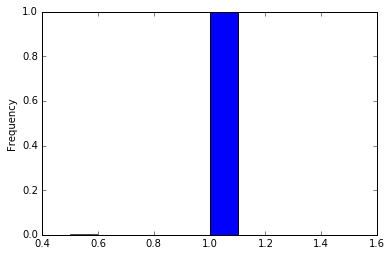

EZZ1006
É mais comum no 1.0 período.


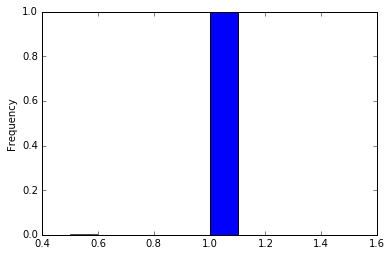

FAE1398
É mais comum no 3.0 período.


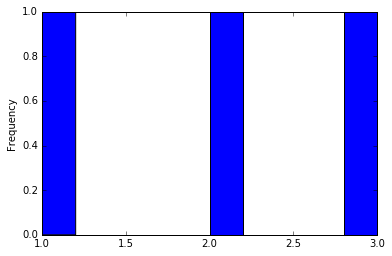

FCX1953
É mais comum no 6.0 período.


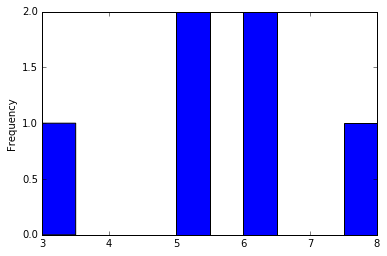

FEN1372
É mais comum no 1.0 período.


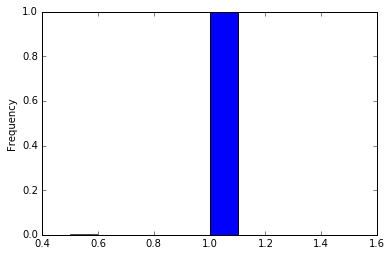

FGM1021
É mais comum no 6.0 período.


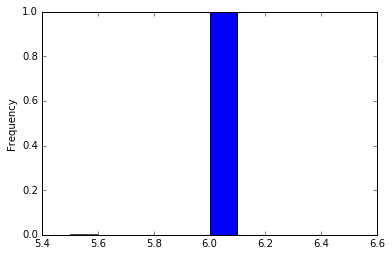

FGY1826
É mais comum no 11.0 período.


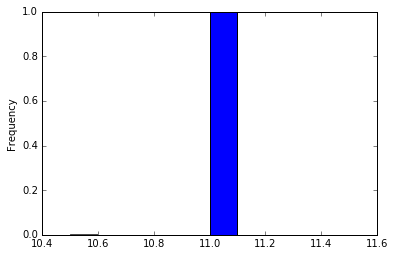

FHJ1845
É mais comum no 2.0 período.


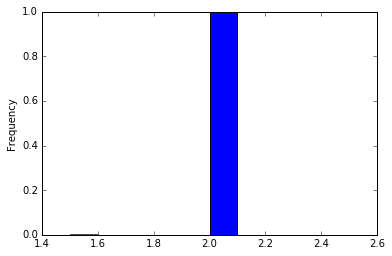

FIE1235
É mais comum no 2.0 período.


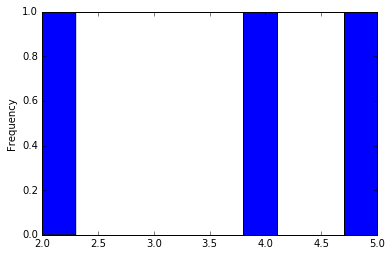

FJP1522
É mais comum no 7.0 período.


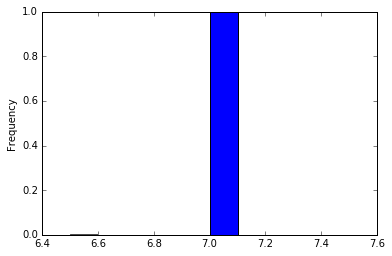

FLH1307
É mais comum no 9.0 período.


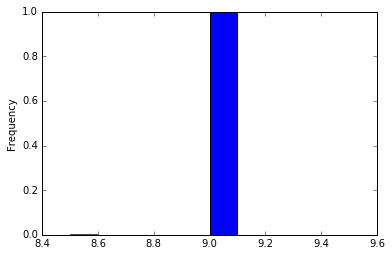

FLT1231
É mais comum no 2.0 período.


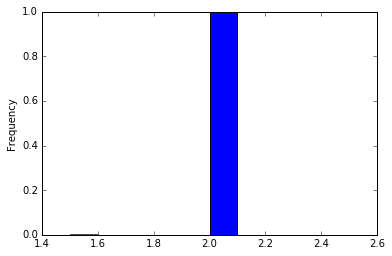

FLX1646
É mais comum no 4.0 período.


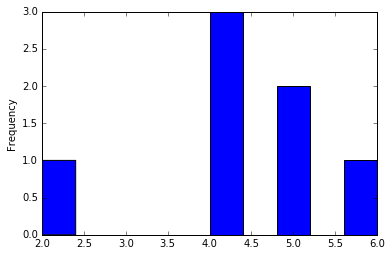

FMS1407
É mais comum no 1.0 período.


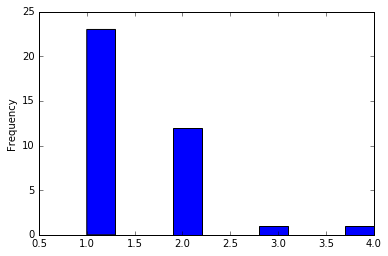

FOH1201
É mais comum no 1.0 período.


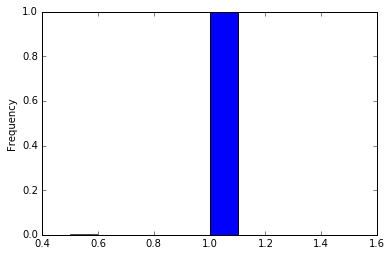

FOI1294
É mais comum no 1.0 período.


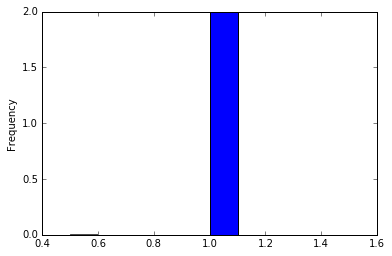

FOU1047
É mais comum no 1.0 período.


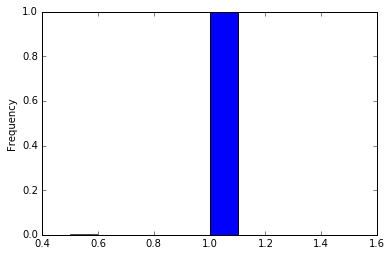

FPK1980
É mais comum no 2.0 período.


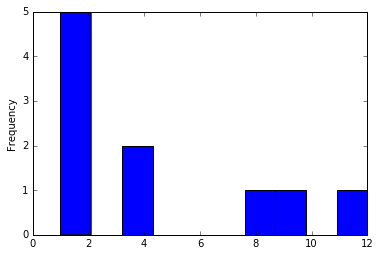

FQK1948
É mais comum no 5.0 período.


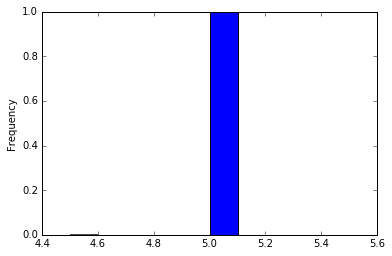

FRS1922
É mais comum no 1.0 período.


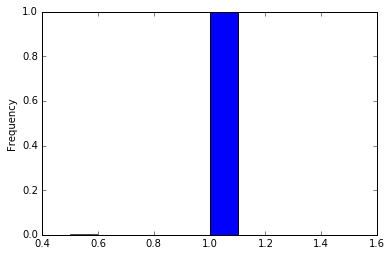

FRV1061
É mais comum no 9.0 período.


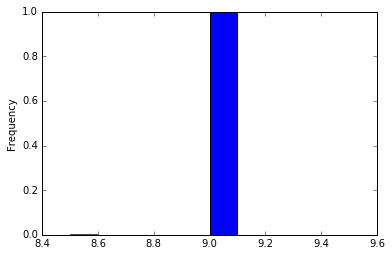

FRY1162
É mais comum no 6.0 período.


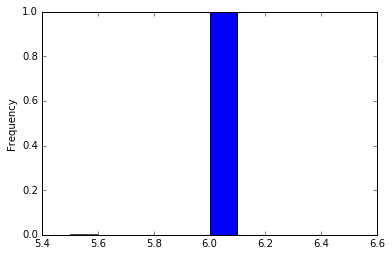

FTT1655
É mais comum no 6.0 período.


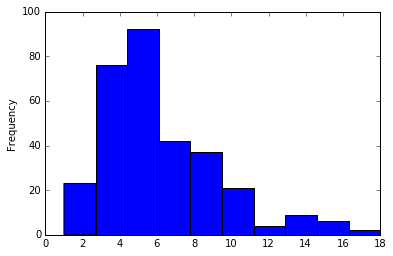

FTW1631
É mais comum no 8.0 período.


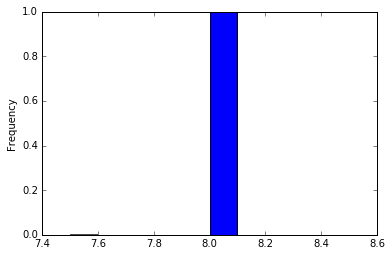

FUF1766
É mais comum no 3.0 período.


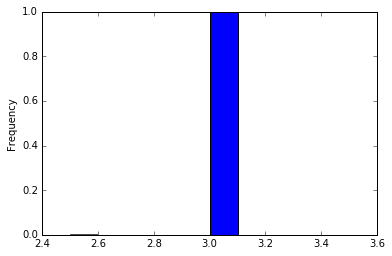

FWW1318
É mais comum no 3.0 período.


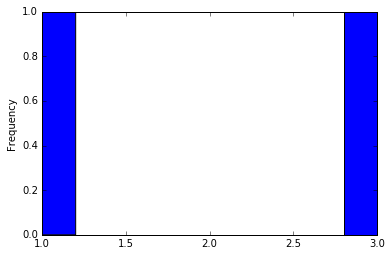

FXS1455
É mais comum no 7.0 período.


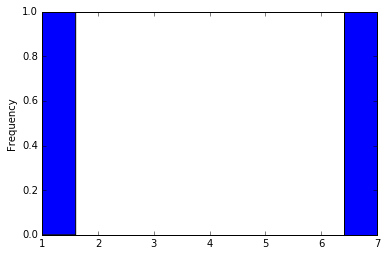

FYB1103
É mais comum no 2.0 período.


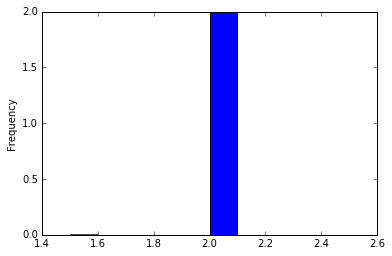

GBT1418
É mais comum no 3.0 período.


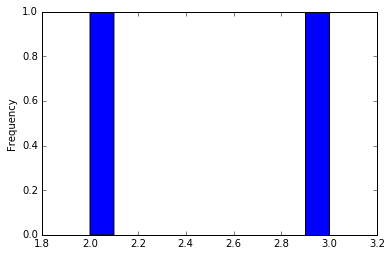

GCY1935
É mais comum no 1.0 período.


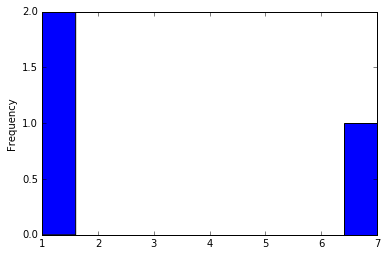

GCZ1049
É mais comum no 8.0 período.


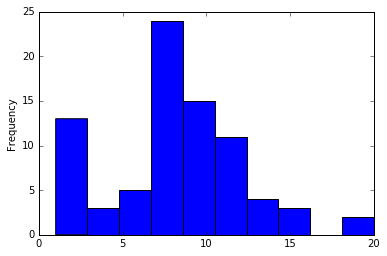

GDQ1501
É mais comum no 3.0 período.


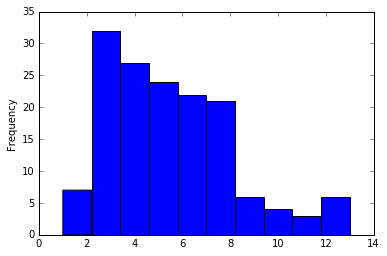

GDR1852
É mais comum no 2.0 período.


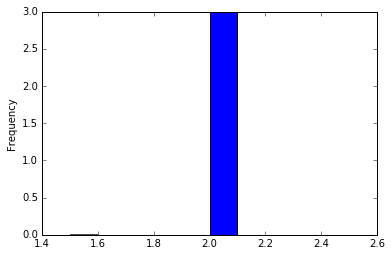

GFC1046
É mais comum no 2.0 período.


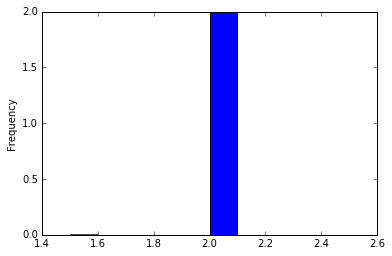

GLA1390
É mais comum no 5.0 período.


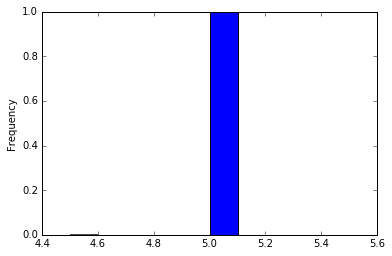

GLJ1776
É mais comum no 1.0 período.


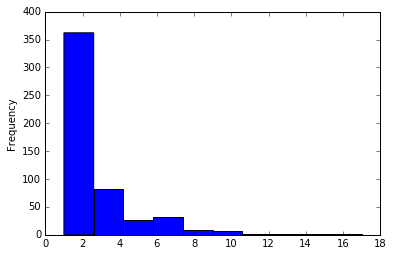

GLR1893
É mais comum no 12.0 período.


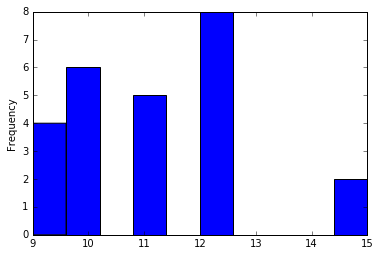

GMN1003
É mais comum no 3.0 período.


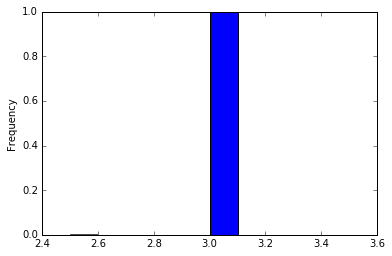

GNH1352
É mais comum no 1.0 período.


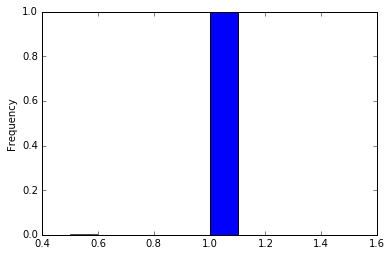

GNR1825
É mais comum no 1.0 período.


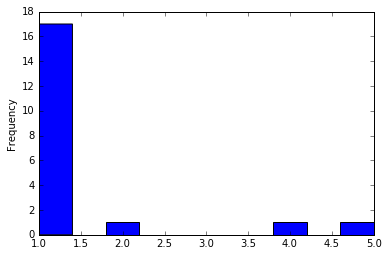

GNW1169
É mais comum no 7.0 período.


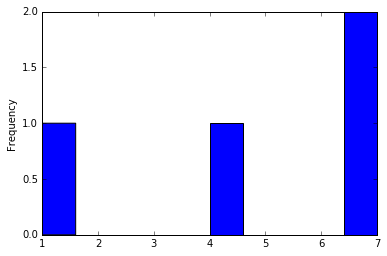

GOZ1785
É mais comum no 1.0 período.


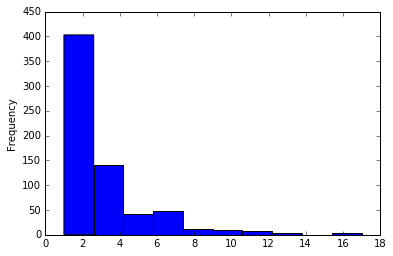

GQB1090
É mais comum no 2.0 período.


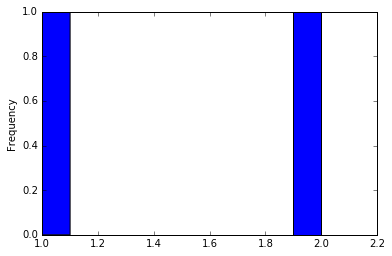

GQO1311
É mais comum no 6.0 período.


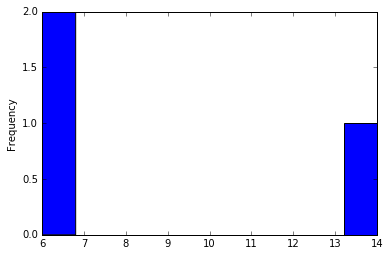

GSN1973
É mais comum no 2.0 período.


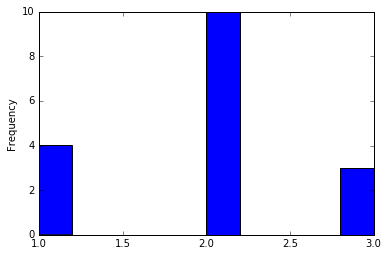

GUO1361
É mais comum no 1.0 período.


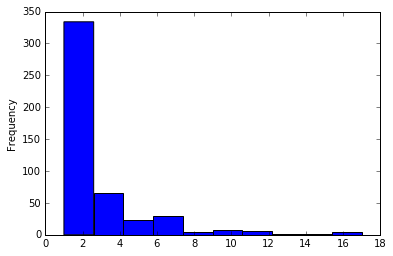

GVF1189
É mais comum no 10.0 período.


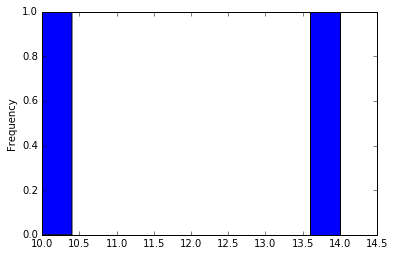

GWN1997
É mais comum no 7.0 período.


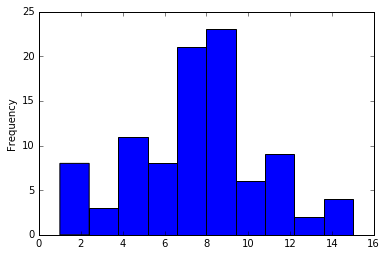

GXA1656
É mais comum no 2.0 período.


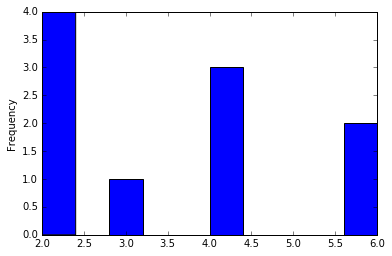

GXC1758
É mais comum no 8.0 período.


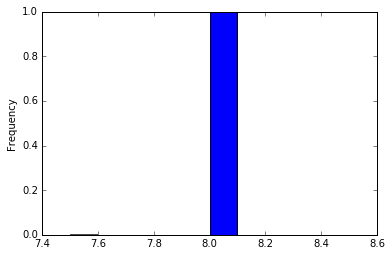

GXK1755
É mais comum no 2.0 período.


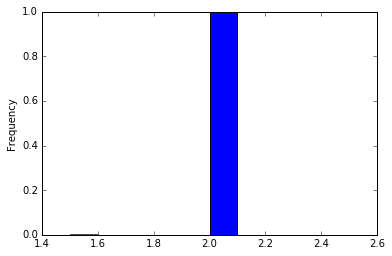

GYE1894
É mais comum no 1.0 período.


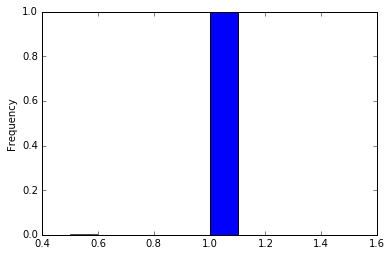

GYX1745
É mais comum no 6.0 período.


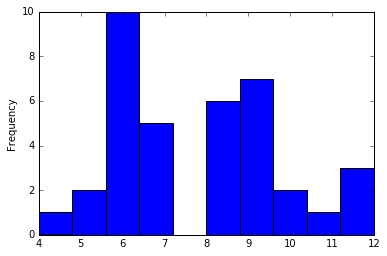

HAL1575
É mais comum no 6.0 período.


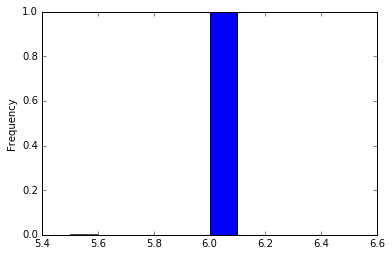

HBF1988
É mais comum no 1.0 período.


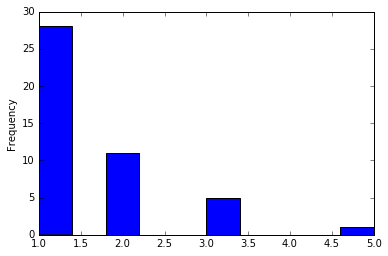

HBK1363
É mais comum no 1.0 período.


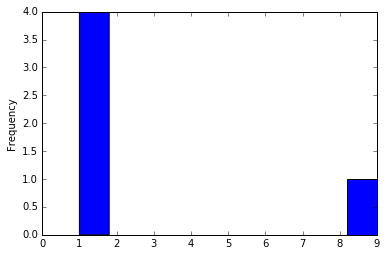

HCC1777
É mais comum no 1.0 período.


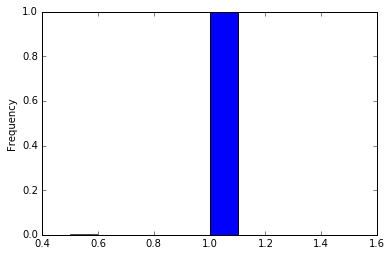

HCV1283
É mais comum no 4.0 período.


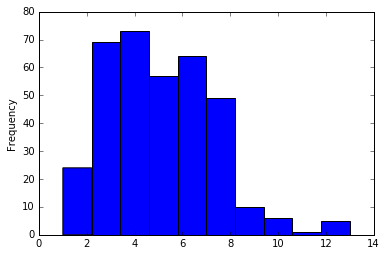

HDB1295
É mais comum no 2.0 período.


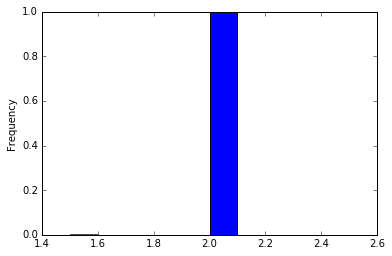

HDZ1240
É mais comum no 3.0 período.


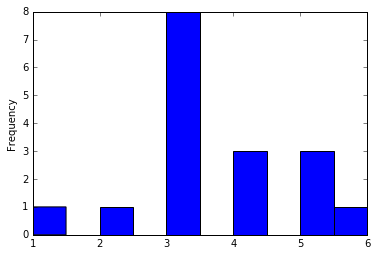

HEL1940
É mais comum no 2.0 período.


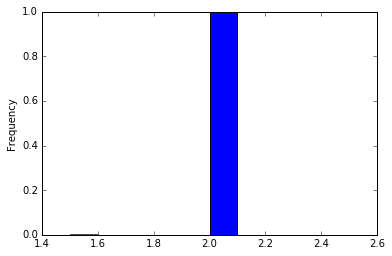

HGL1126
É mais comum no 9.0 período.


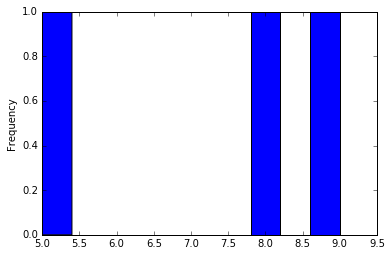

HJS1194
É mais comum no 1.0 período.


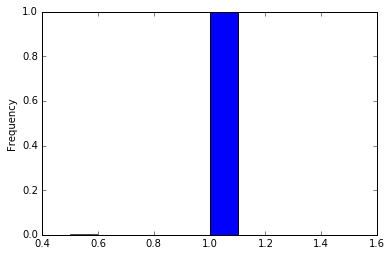

HJY1503
É mais comum no 3.0 período.


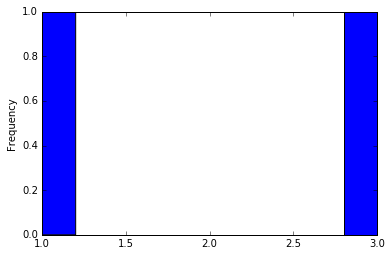

HNV1490
É mais comum no 10.0 período.


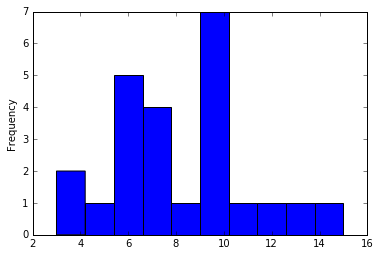

HNW1832
É mais comum no 3.0 período.


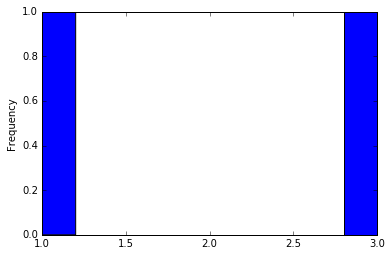

HOB1312
É mais comum no 1.0 período.


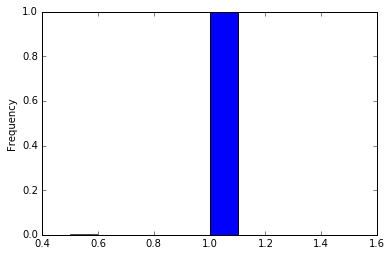

HOC1775
É mais comum no 5.0 período.


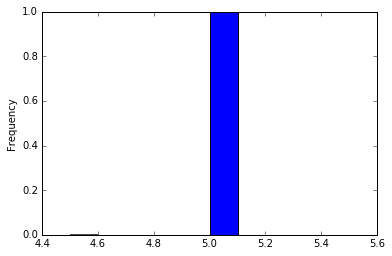

HOW1491
É mais comum no 3.0 período.


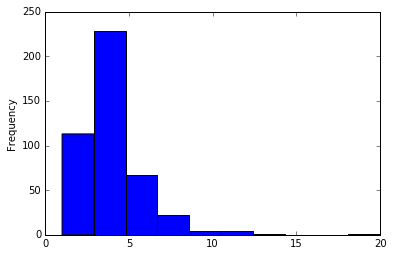

HQW1337
É mais comum no 4.0 período.


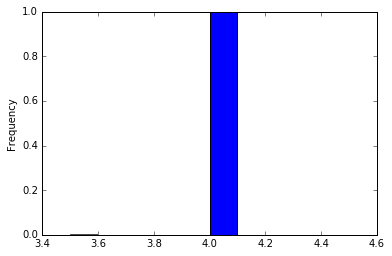

HRK1317
É mais comum no 3.0 período.


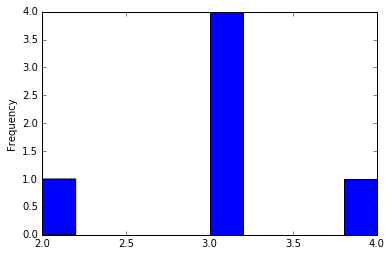

HRS1457
É mais comum no 4.0 período.


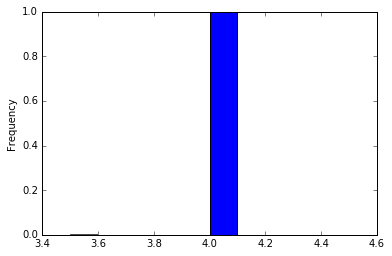

HTG1268
É mais comum no 11.0 período.


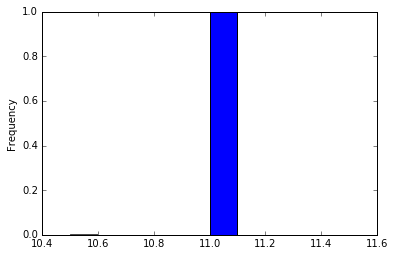

HTM1301
É mais comum no 1.0 período.


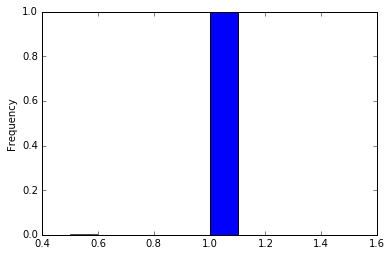

HTR1952
É mais comum no 2.0 período.


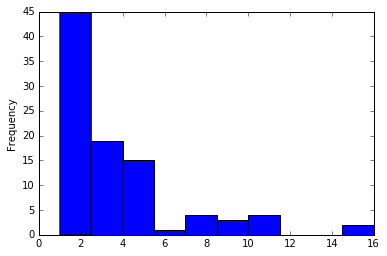

HUJ1476
É mais comum no 4.0 período.


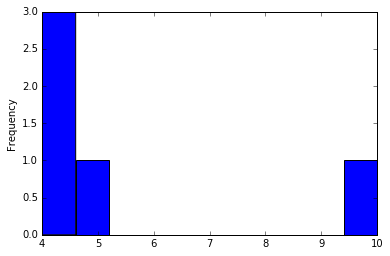

HUM1992
É mais comum no 2.0 período.


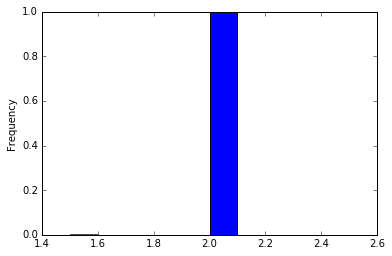

HVD1419
É mais comum no 1.0 período.


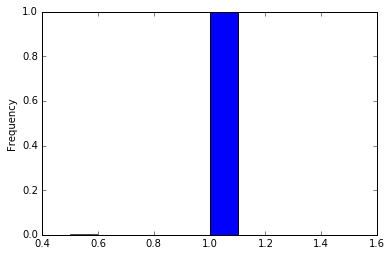

HWA1306
É mais comum no 1.0 período.


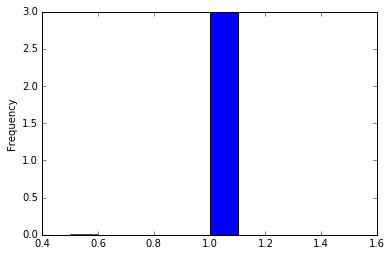

HWO1727
É mais comum no 3.0 período.


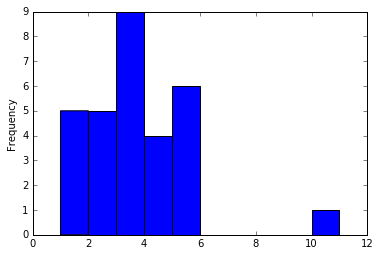

HXE1204
É mais comum no 2.0 período.


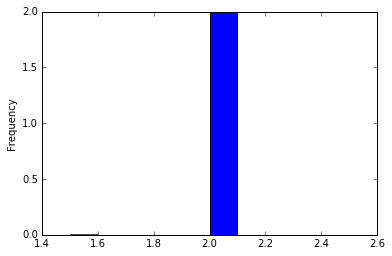

HXJ1807
É mais comum no 6.0 período.


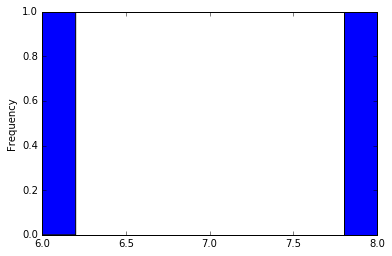

HXU1246
É mais comum no 1.0 período.


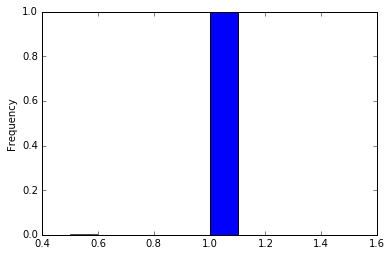

HXZ1743
É mais comum no 1.0 período.


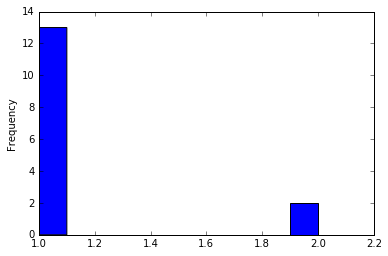

HYG1901
É mais comum no 3.0 período.


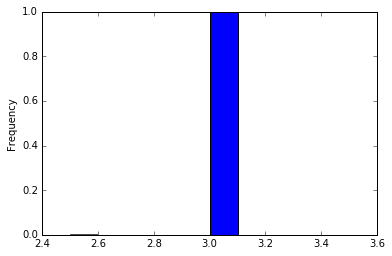

IAU1602
É mais comum no 15.0 período.


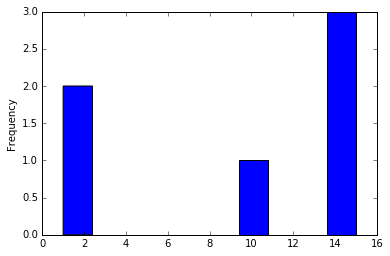

IBT1075
É mais comum no 7.0 período.


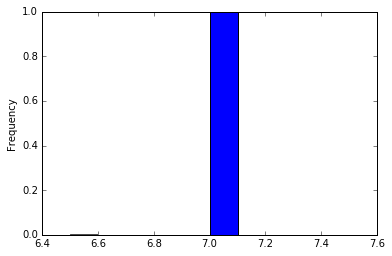

IDF1211
É mais comum no 8.0 período.


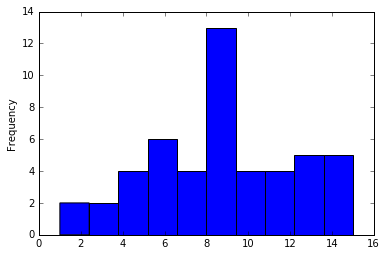

IDS1732
É mais comum no 1.0 período.


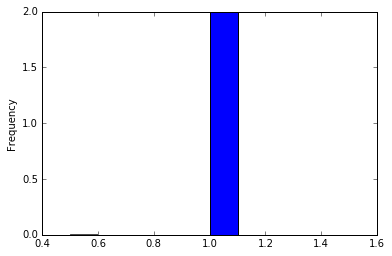

IEB1402
É mais comum no 2.0 período.


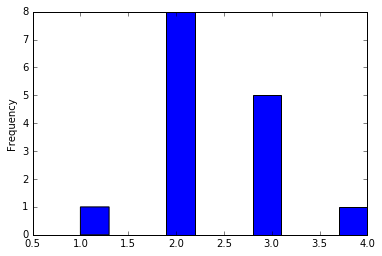

IEW1542
É mais comum no 3.0 período.


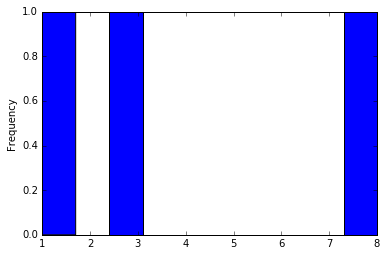

IGC1784
É mais comum no 10.0 período.


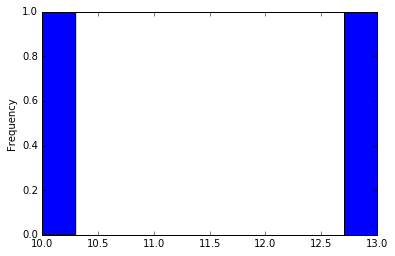

IJR1325
É mais comum no 1.0 período.


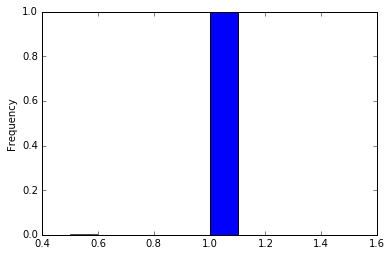

IJT1308
É mais comum no 1.0 período.


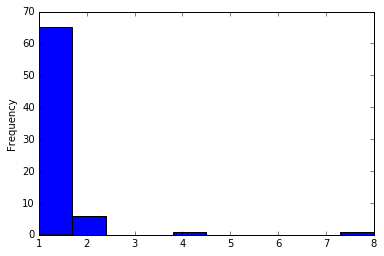

ILG1261
É mais comum no 1.0 período.


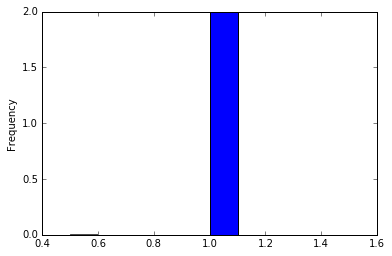

ILR1937
É mais comum no 2.0 período.


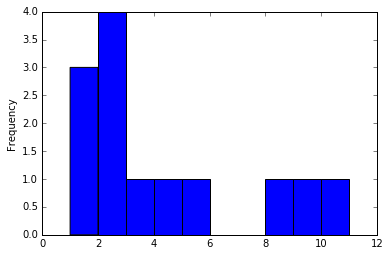

ILZ1146
É mais comum no 3.0 período.


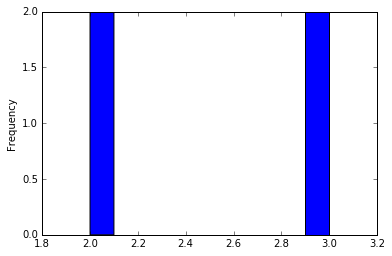

IMJ1495
É mais comum no 3.0 período.


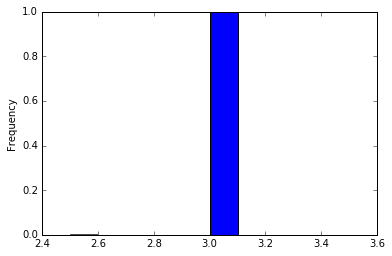

IMT1945
É mais comum no 8.0 período.


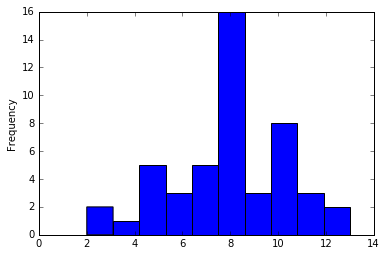

IPG1272
É mais comum no 3.0 período.


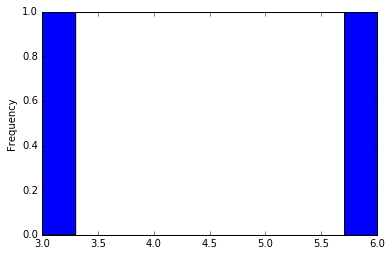

IQX1362
É mais comum no 1.0 período.


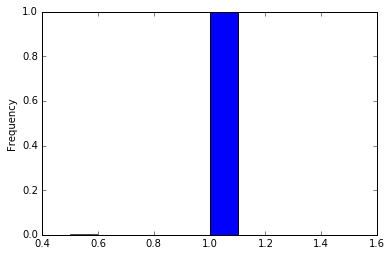

IRA1976
É mais comum no 1.0 período.


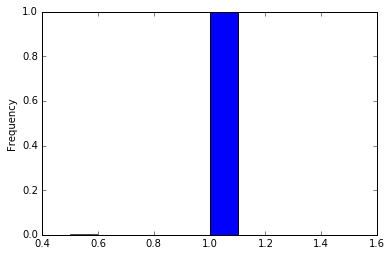

IRY1704
É mais comum no 11.0 período.


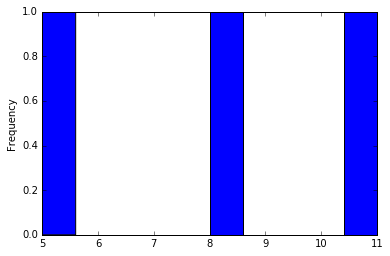

ISK1355
É mais comum no 1.0 período.


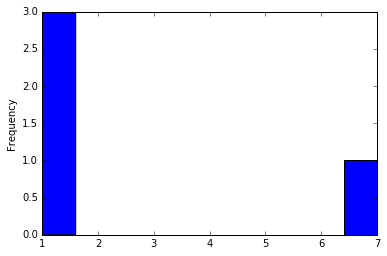

IVW1933
É mais comum no 9.0 período.


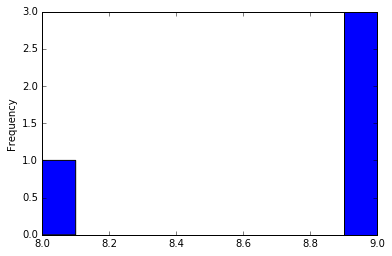

IWN1205
É mais comum no 1.0 período.


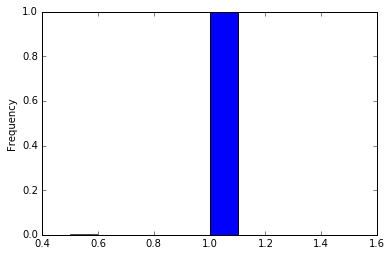

JAN1639
É mais comum no 6.0 período.


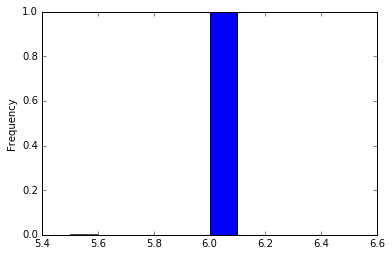

JDC1148
É mais comum no 6.0 período.


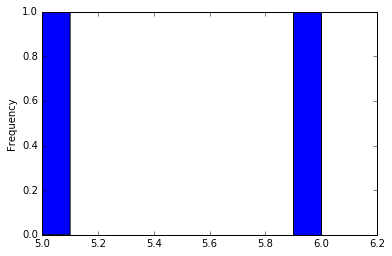

JER1962
É mais comum no 4.0 período.


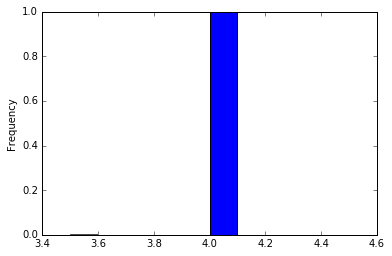

JFD1688
É mais comum no 9.0 período.


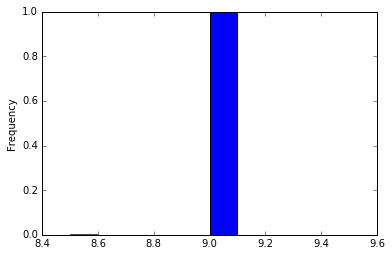

JFV1877
É mais comum no 1.0 período.


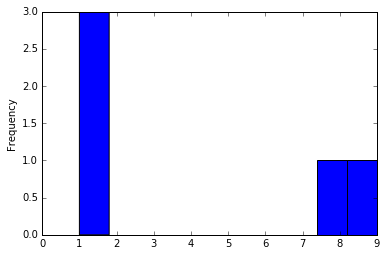

JHJ1252
É mais comum no 3.0 período.


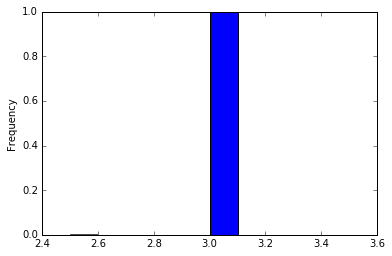

JIA1854
É mais comum no 12.0 período.


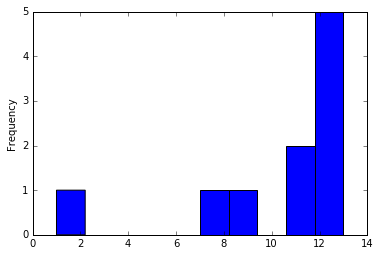

JIH1692
É mais comum no 3.0 período.


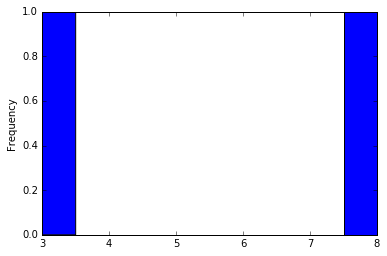

JIO1513
É mais comum no 2.0 período.


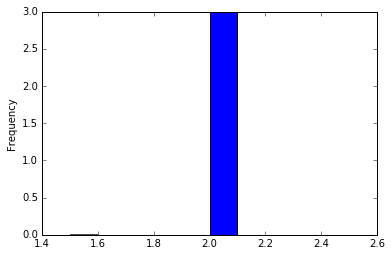

JJM1227
É mais comum no 6.0 período.


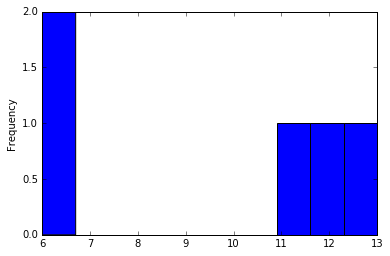

JKV1509
É mais comum no 1.0 período.


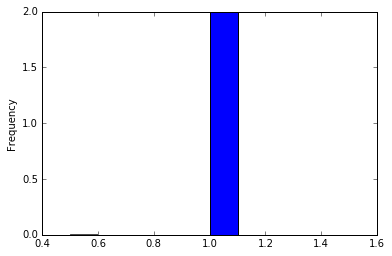

JOA1157
É mais comum no 1.0 período.


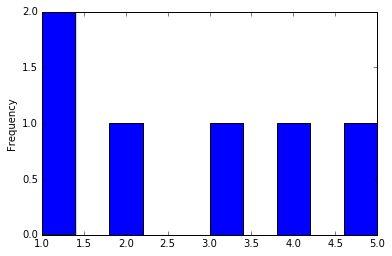

JPR1557
É mais comum no 10.0 período.


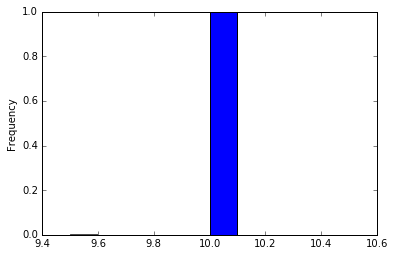

JPT1815
É mais comum no 7.0 período.


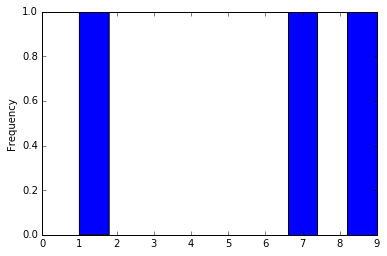

JRP1520
É mais comum no 1.0 período.


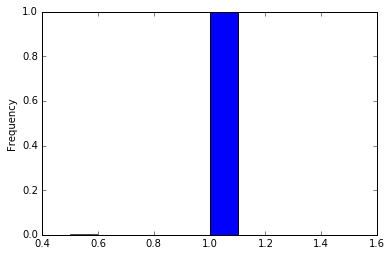

JSO1346
É mais comum no 1.0 período.


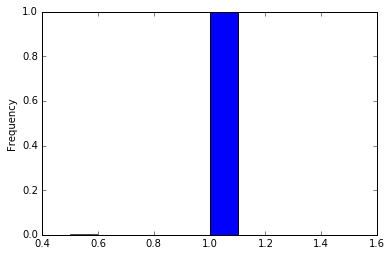

JUK1718
É mais comum no 1.0 período.


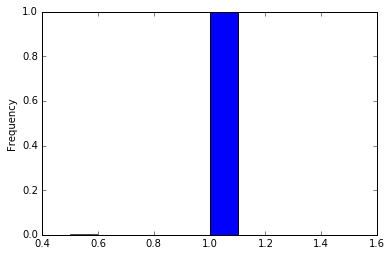

JUR1793
É mais comum no 3.0 período.


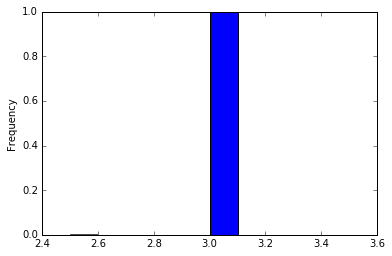

JVG1809
É mais comum no 10.0 período.


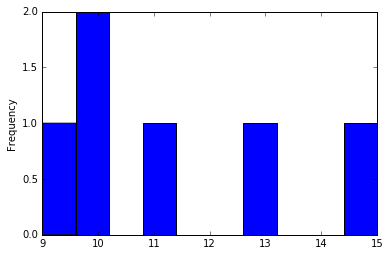

JVQ1074
É mais comum no 5.0 período.


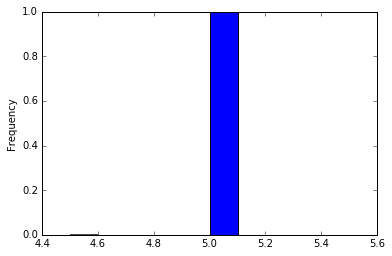

JVV1185
É mais comum no 1.0 período.


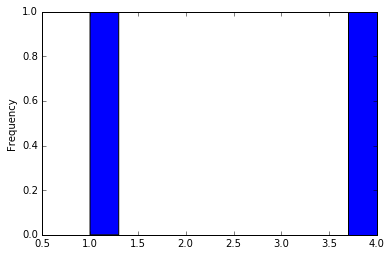

JYN1658
É mais comum no 1.0 período.


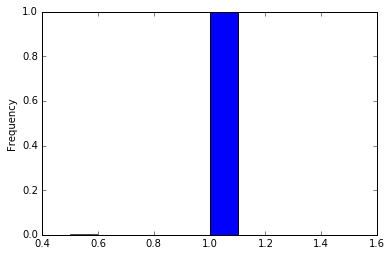

JZJ1364
É mais comum no 1.0 período.


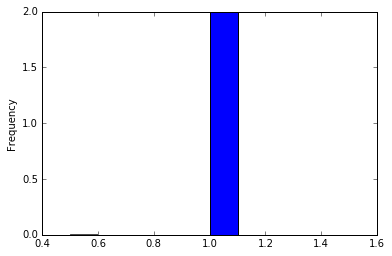

KAA1687
É mais comum no 3.0 período.


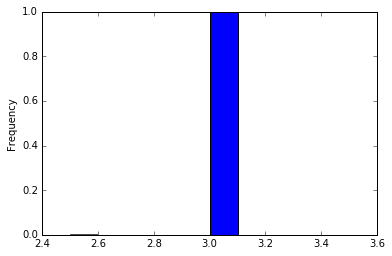

KAE1674
É mais comum no 7.0 período.


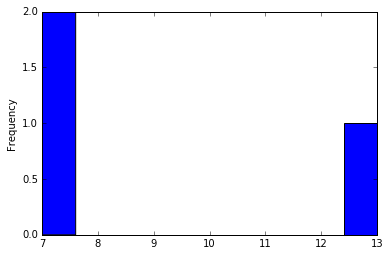

KAZ1196
É mais comum no 1.0 período.


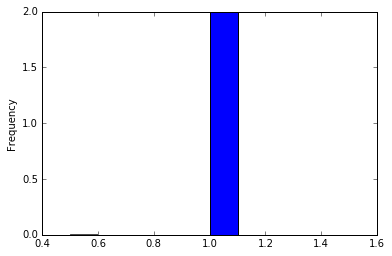

KBR1233
É mais comum no 3.0 período.


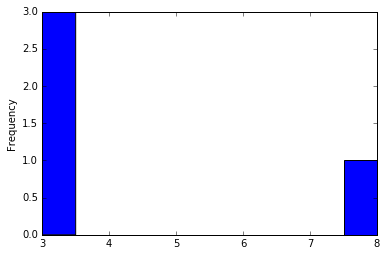

KBS1764
É mais comum no 1.0 período.


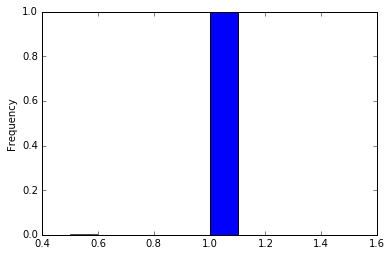

KCD1008
É mais comum no 1.0 período.


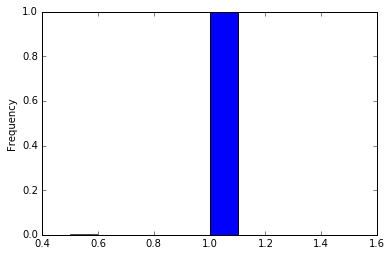

KCG1479
É mais comum no 1.0 período.


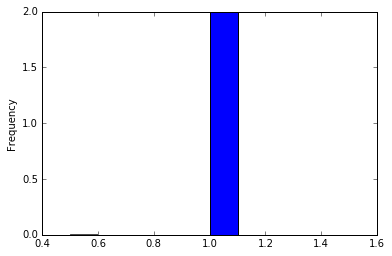

KCQ1862
É mais comum no 1.0 período.


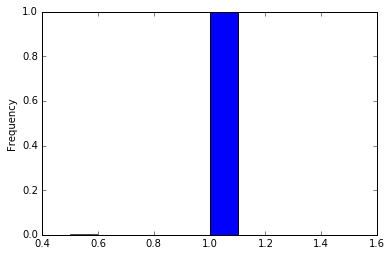

KFS1369
É mais comum no 1.0 período.


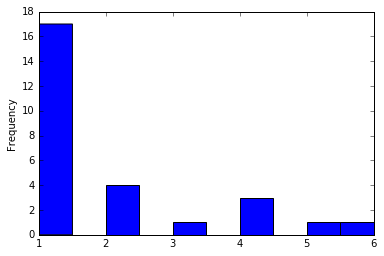

KGL1555
É mais comum no 5.0 período.


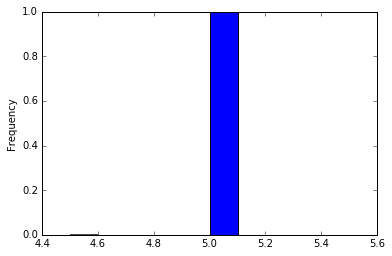

KIJ1698
É mais comum no 6.0 período.


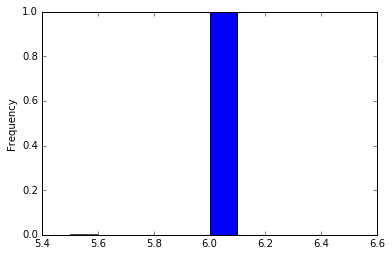

KIU1613
É mais comum no 1.0 período.


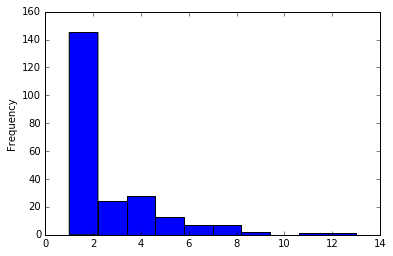

KJJ1984
É mais comum no 3.0 período.


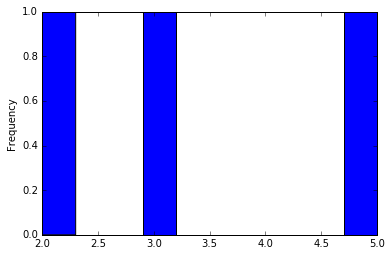

KLA1604
É mais comum no 10.0 período.


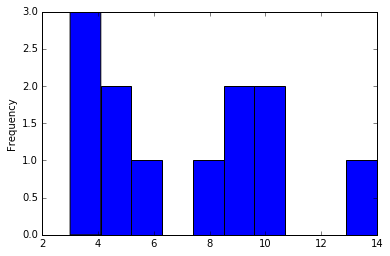

KNI1391
É mais comum no 1.0 período.


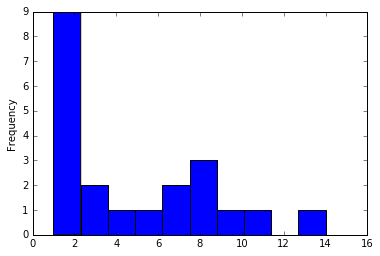

KOG1172
É mais comum no 7.0 período.


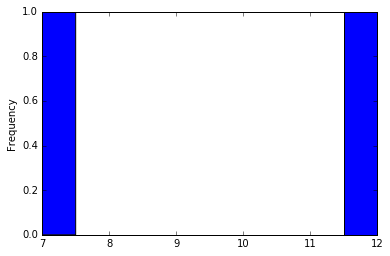

KQQ1804
É mais comum no 8.0 período.


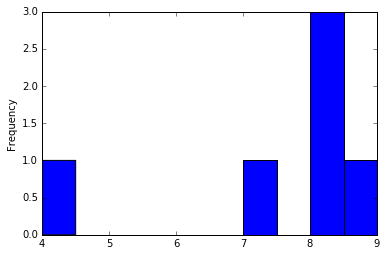

KQR1812
É mais comum no 14.0 período.


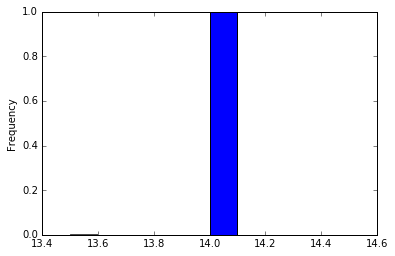

KSE1671
É mais comum no 2.0 período.


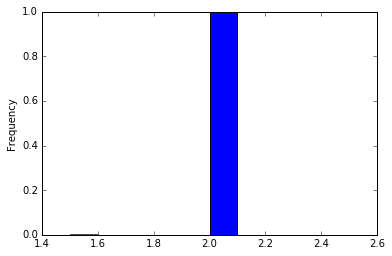

KSK1537
É mais comum no 1.0 período.


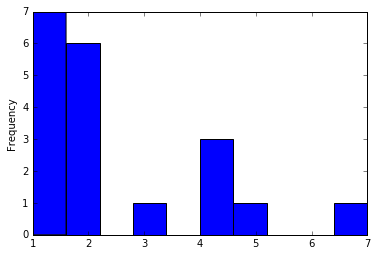

KSP1463
É mais comum no 2.0 período.


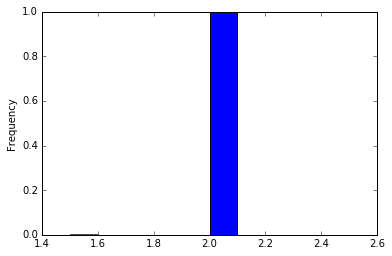

KVR1477
É mais comum no 1.0 período.


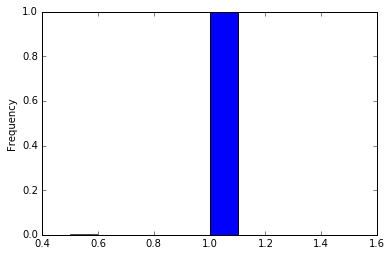

KXS1879
É mais comum no 14.0 período.


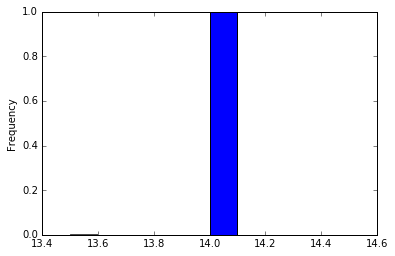

KYE1040
É mais comum no 8.0 período.


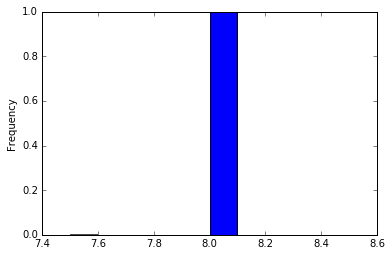

KZQ1974
É mais comum no 6.0 período.


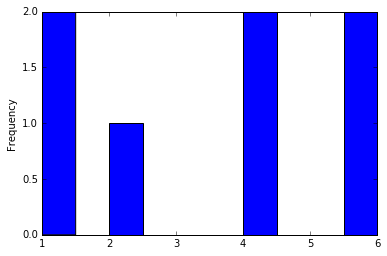

LAP1450
É mais comum no 1.0 período.


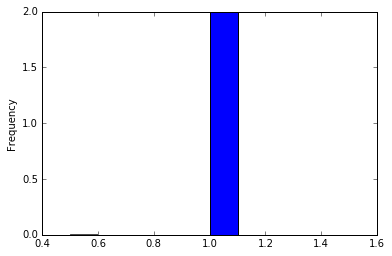

LBC1445
É mais comum no 5.0 período.


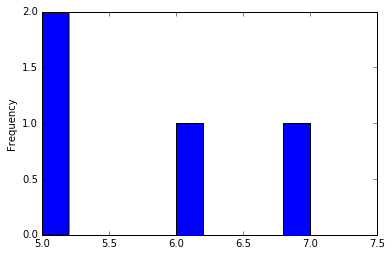

LBG1213
É mais comum no 3.0 período.


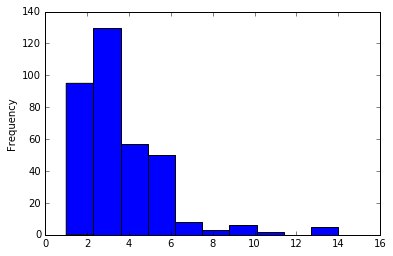

LCG1141
É mais comum no 2.0 período.


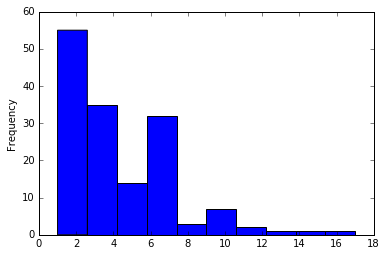

LCX1999
É mais comum no 7.0 período.


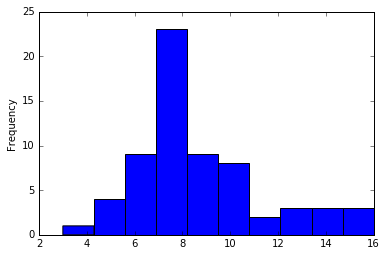

LES1454
É mais comum no 9.0 período.


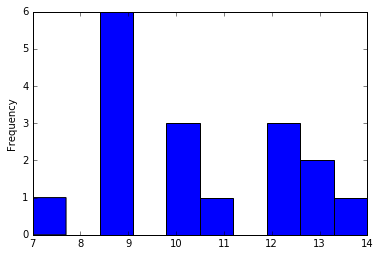

LFO1913
É mais comum no 1.0 período.


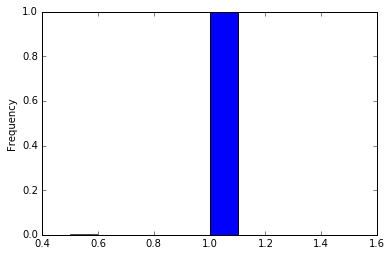

LGU1415
É mais comum no 6.0 período.


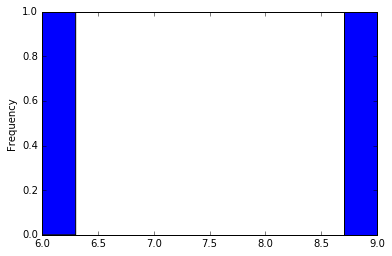

LHL1394
É mais comum no 1.0 período.


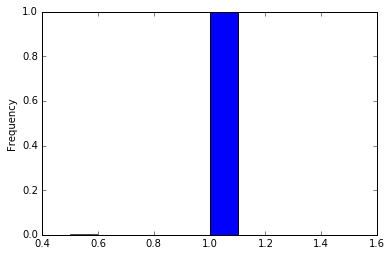

LHO1978
É mais comum no 4.0 período.


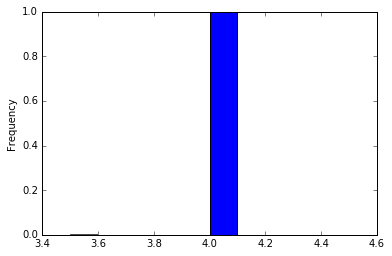

LIB1882
É mais comum no 8.0 período.


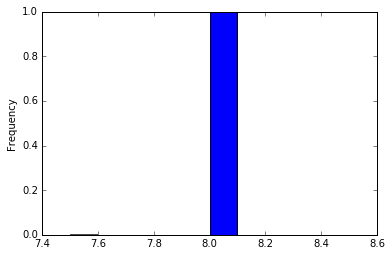

LIC1819
É mais comum no 1.0 período.


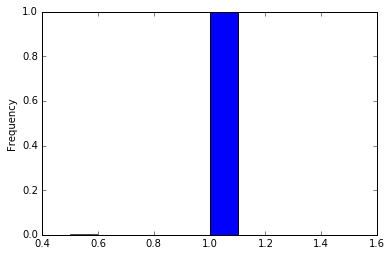

LJI1875
É mais comum no 1.0 período.


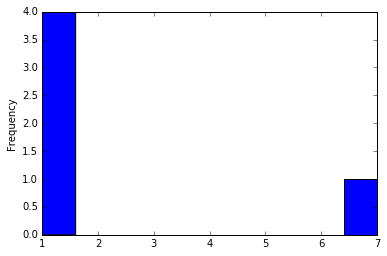

LJU1802
É mais comum no 6.0 período.


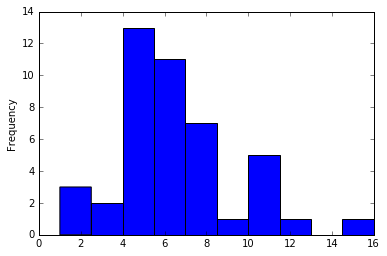

LKR1066
É mais comum no 4.0 período.


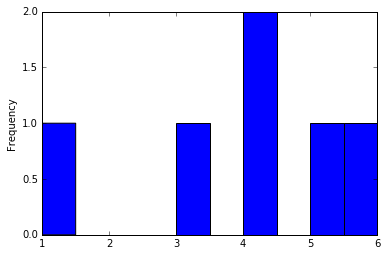

LKZ1904
É mais comum no 9.0 período.


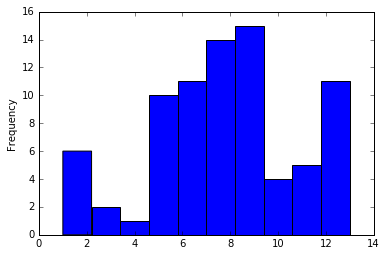

LLX1619
É mais comum no 2.0 período.


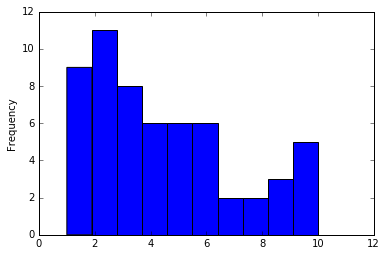

LMF1735
É mais comum no 1.0 período.


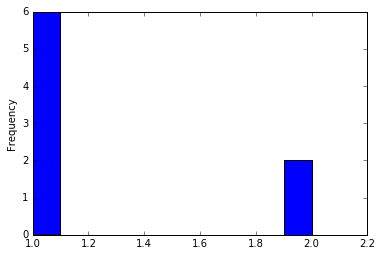

LMU1326
É mais comum no 8.0 período.


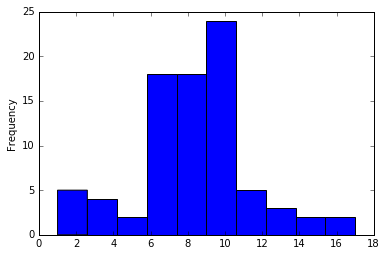

LNH1996
É mais comum no 5.0 período.


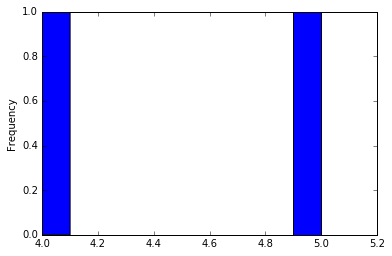

LNY1641
É mais comum no 11.0 período.


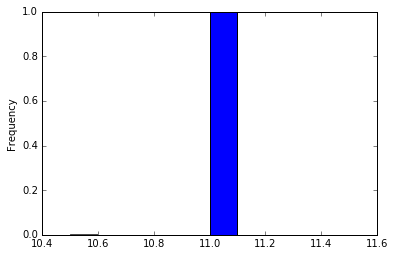

LOJ1076
É mais comum no 7.0 período.


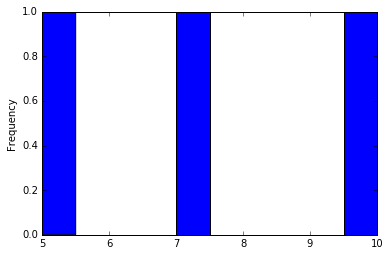

LOU1757
É mais comum no 7.0 período.


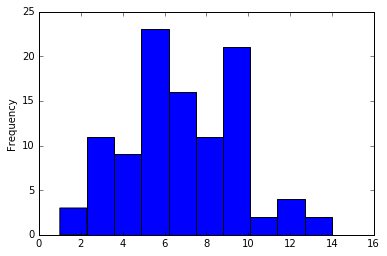

LPI1563
É mais comum no 1.0 período.


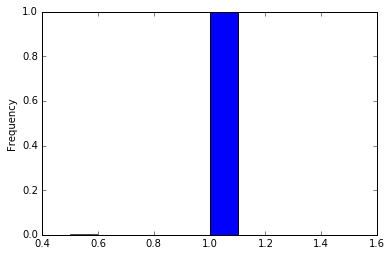

LPL1177
É mais comum no 1.0 período.


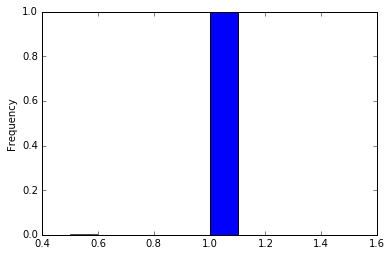

LPZ1460
É mais comum no 10.0 período.


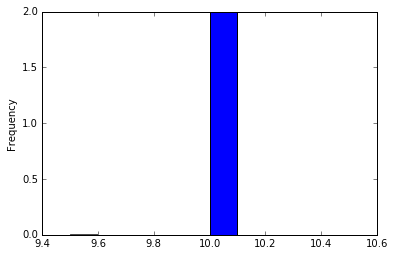

LQQ1121
É mais comum no 1.0 período.


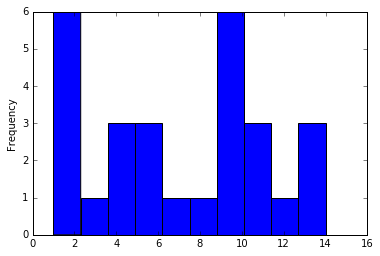

LQZ1944
É mais comum no 1.0 período.


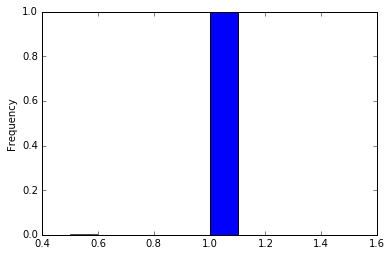

LRW1637
É mais comum no 3.0 período.


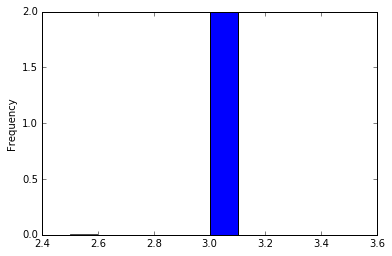

LSG1137
É mais comum no 12.0 período.


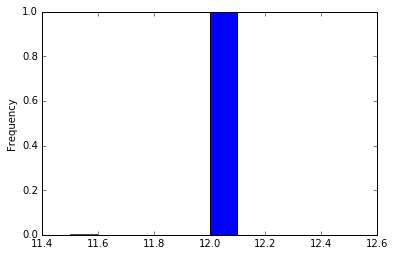

LUF1736
É mais comum no 3.0 período.


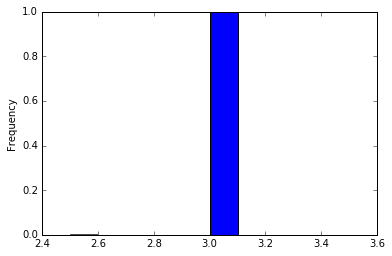

LUL1820
É mais comum no 1.0 período.


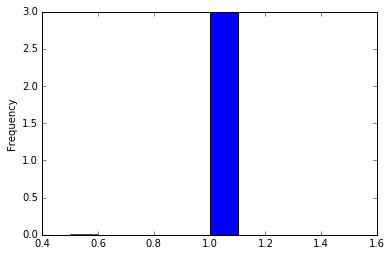

LUT1566
É mais comum no 1.0 período.


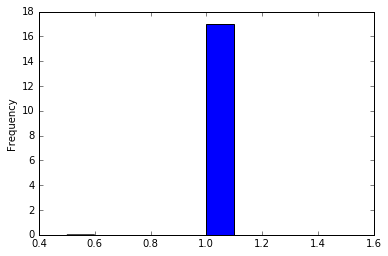

LUY1664
É mais comum no 1.0 período.


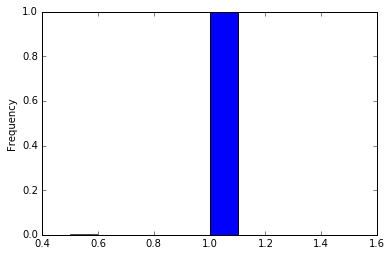

LVE1222
É mais comum no 7.0 período.


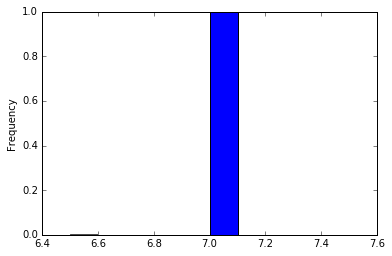

LYV1644
É mais comum no 1.0 período.


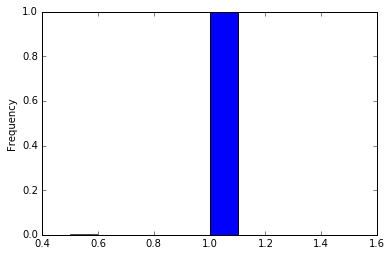

LZC1281
É mais comum no 1.0 período.


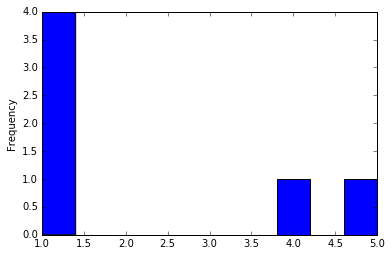

LZR1817
É mais comum no 1.0 período.


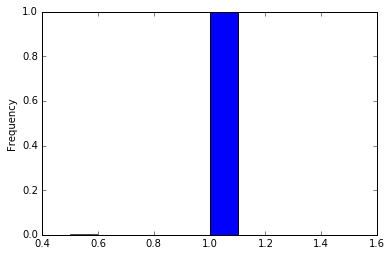

LZZ1030
É mais comum no 10.0 período.


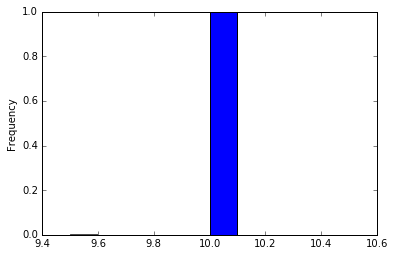

MAB1535
É mais comum no 2.0 período.


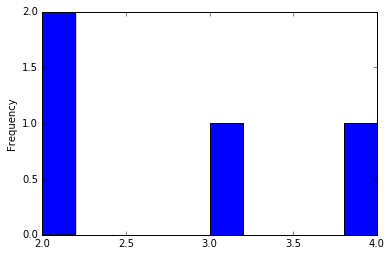

MAG1866
É mais comum no 2.0 período.


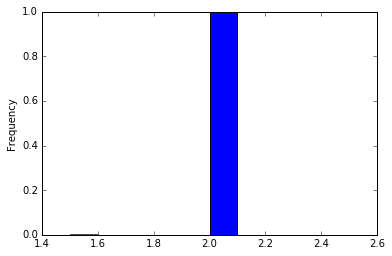

MAV1592
É mais comum no 1.0 período.


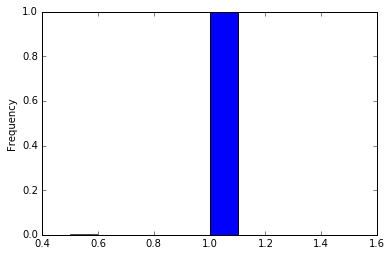

MBS1200
É mais comum no 10.0 período.


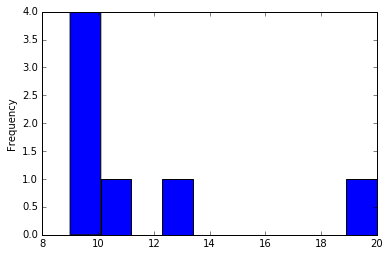

MDJ1269
É mais comum no 9.0 período.


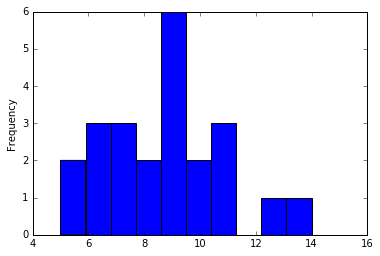

MDO1865
É mais comum no 6.0 período.


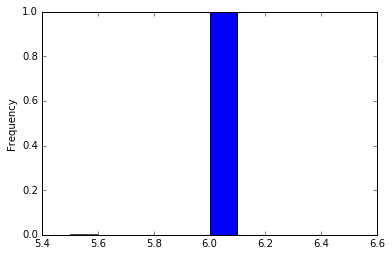

MFA1197
É mais comum no 1.0 período.


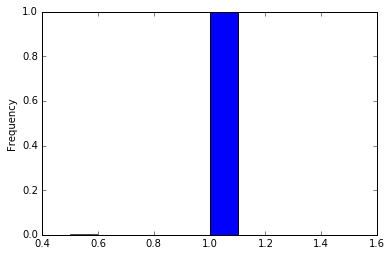

MFC1276
É mais comum no 6.0 período.


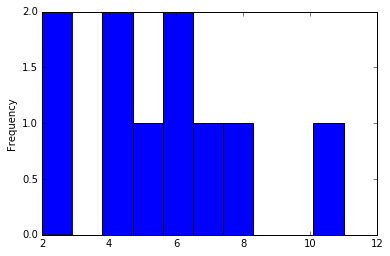

MFL1149
É mais comum no 3.0 período.


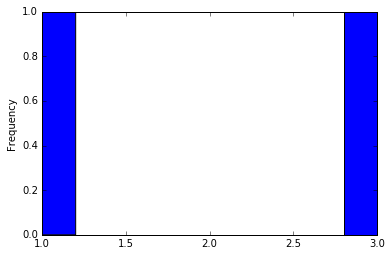

MII1287
É mais comum no 8.0 período.


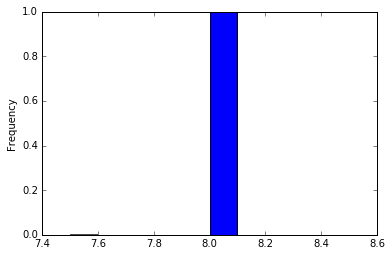

MKK1957
É mais comum no 1.0 período.


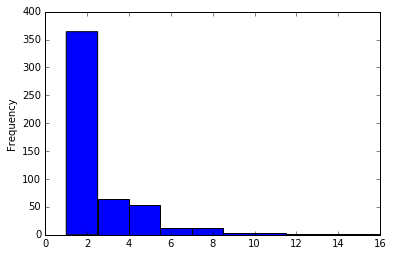

MKM1334
É mais comum no 1.0 período.


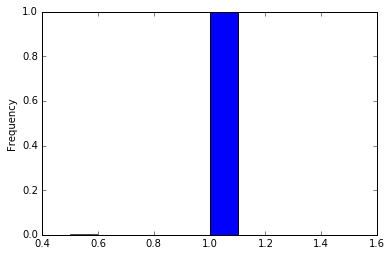

MOB1082
É mais comum no 5.0 período.


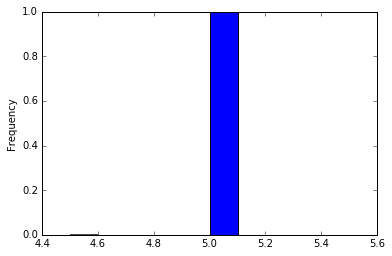

MOQ1414
É mais comum no 9.0 período.


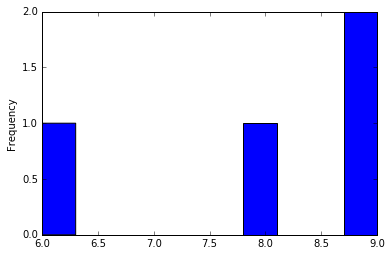

MOW1857
É mais comum no 1.0 período.


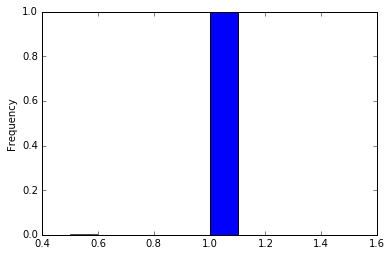

MPX1395
É mais comum no 2.0 período.


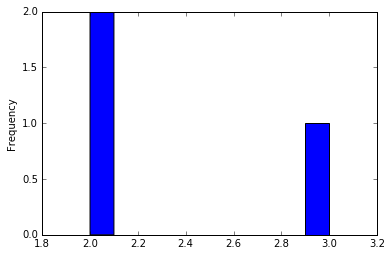

MQB1858
É mais comum no 2.0 período.


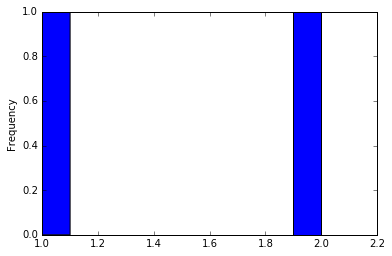

MQC1245
É mais comum no 3.0 período.


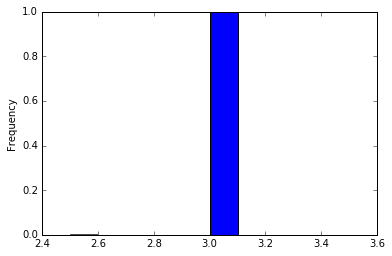

MQR1768
É mais comum no 1.0 período.


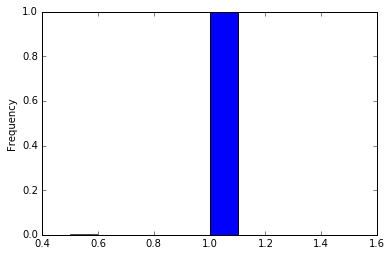

MSL1918
É mais comum no 2.0 período.


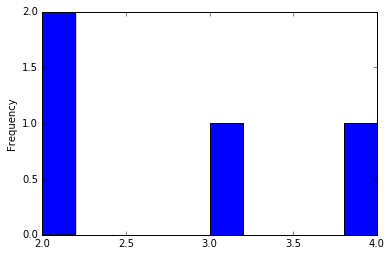

MUN1530
É mais comum no 8.0 período.


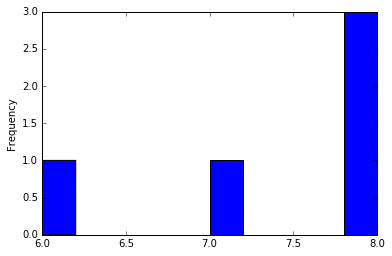

MWH1377
É mais comum no 2.0 período.


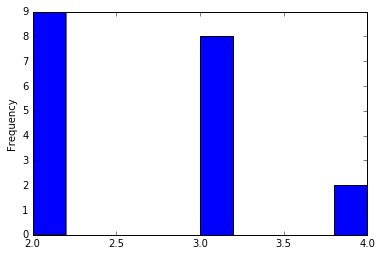

MWK1022
É mais comum no 2.0 período.


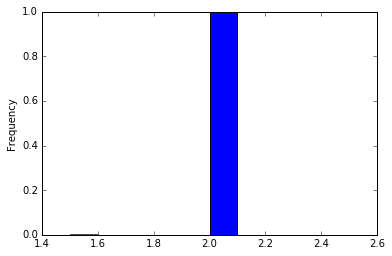

MYH1078
É mais comum no 1.0 período.


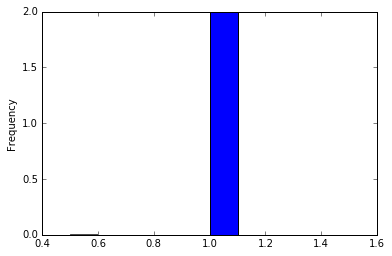

NAF1586
É mais comum no 7.0 período.


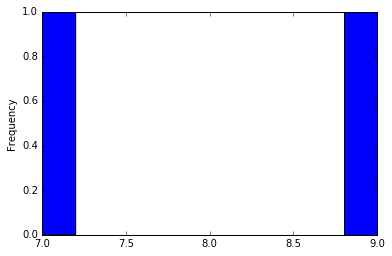

NAI1303
É mais comum no 7.0 período.


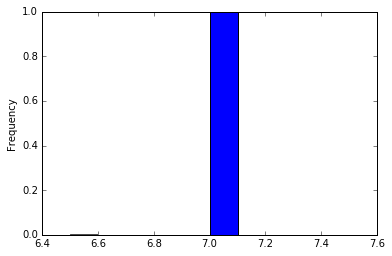

NAT1546
É mais comum no 3.0 período.


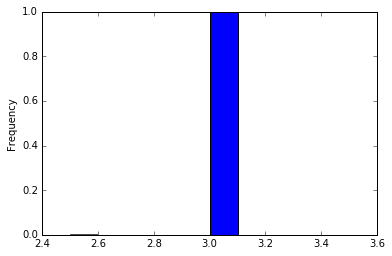

NBA1697
É mais comum no 2.0 período.


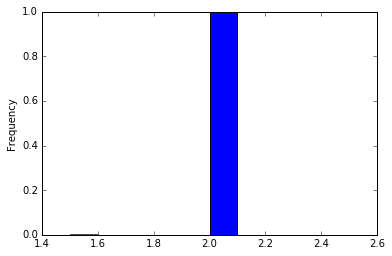

NDO1207
É mais comum no 1.0 período.


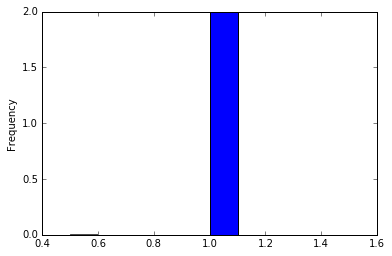

NEL1634
É mais comum no 1.0 período.


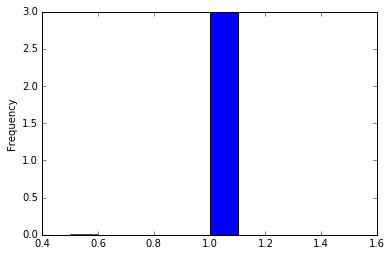

NEU1574
É mais comum no 10.0 período.


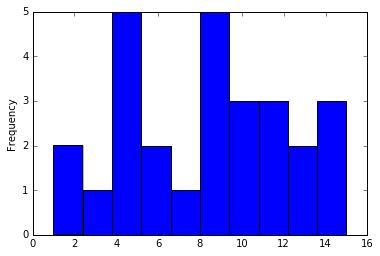

NGM1519
É mais comum no 4.0 período.


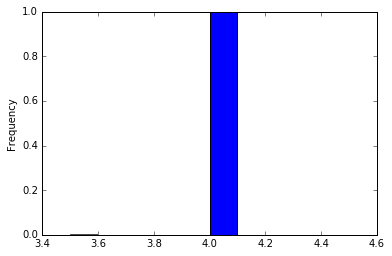

NHV1035
É mais comum no 1.0 período.


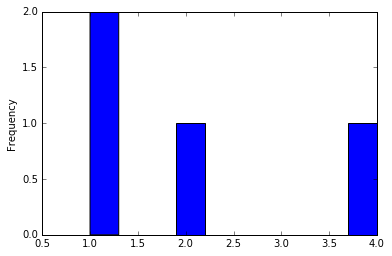

NJD1895
É mais comum no 6.0 período.


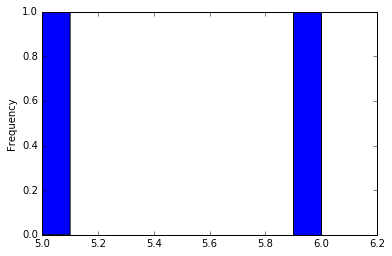

NKK1243
É mais comum no 7.0 período.


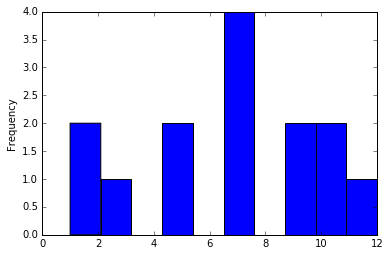

NKN1461
É mais comum no 8.0 período.


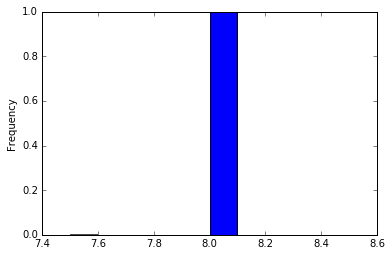

NLG1168
É mais comum no 1.0 período.


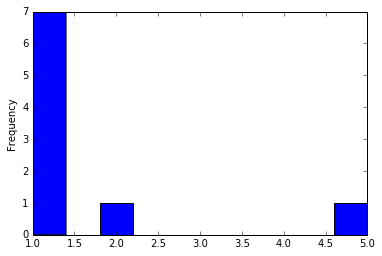

NLN1638
É mais comum no 5.0 período.


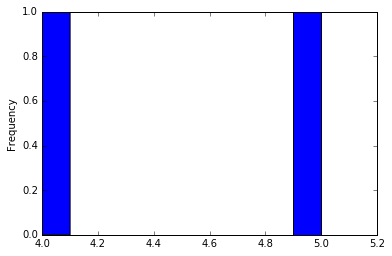

NNE1938
É mais comum no 6.0 período.


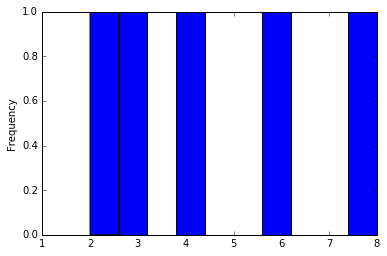

NNK1908
É mais comum no 7.0 período.


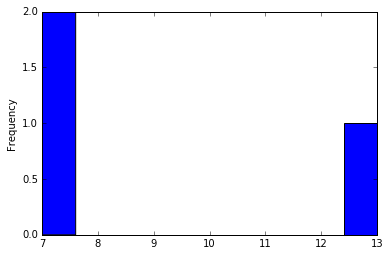

NNO1640
É mais comum no 2.0 período.


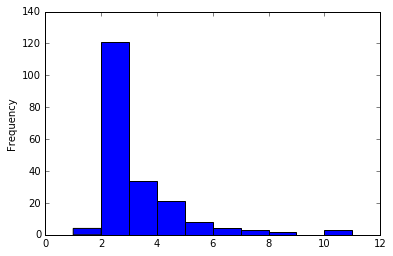

NNX1779
É mais comum no 1.0 período.


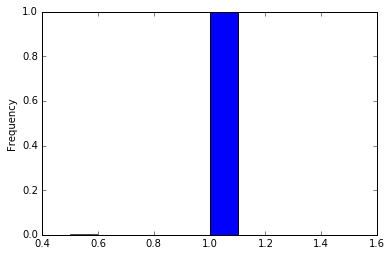

NOS1910
É mais comum no 11.0 período.


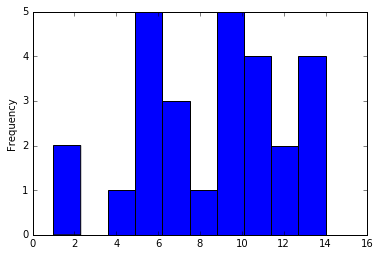

NPP1979
É mais comum no 3.0 período.


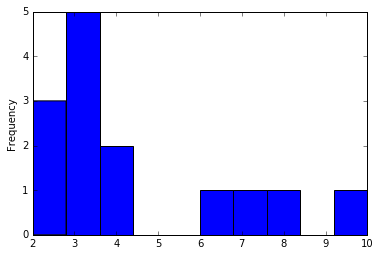

NTT1528
É mais comum no 1.0 período.


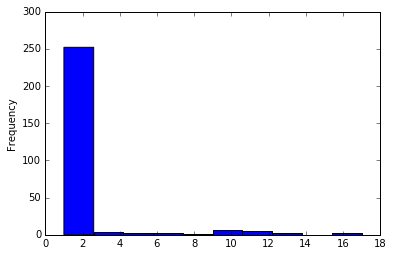

NUB1747
É mais comum no 10.0 período.


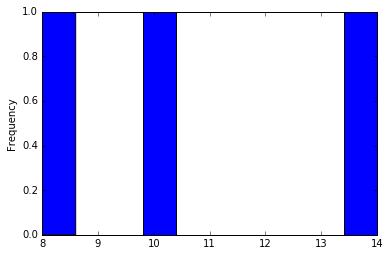

NVT1666
É mais comum no 9.0 período.


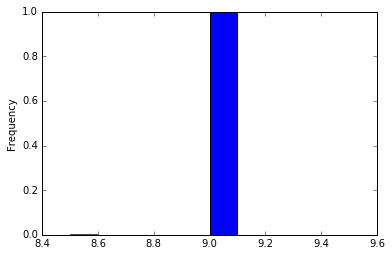

NWV1024
É mais comum no 2.0 período.


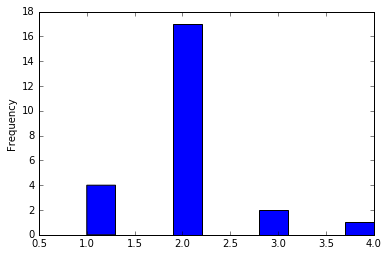

NXL1995
É mais comum no 8.0 período.


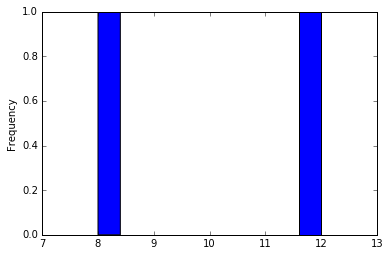

NXY1218
É mais comum no 6.0 período.


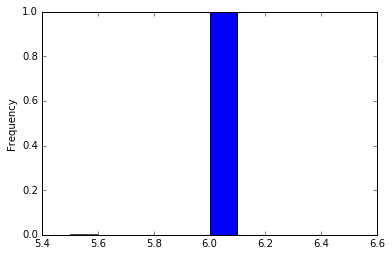

NYF1749
É mais comum no 1.0 período.


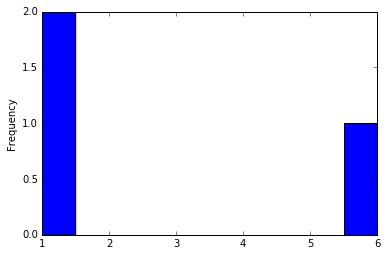

NZD1329
É mais comum no 1.0 período.


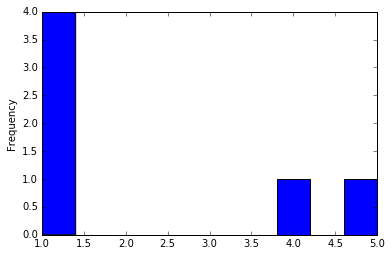

OBB1413
É mais comum no 5.0 período.


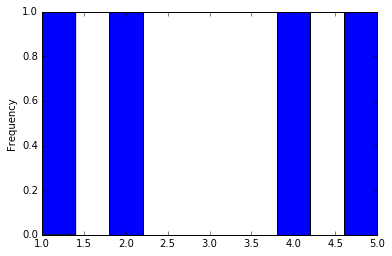

OBD1487
É mais comum no 3.0 período.


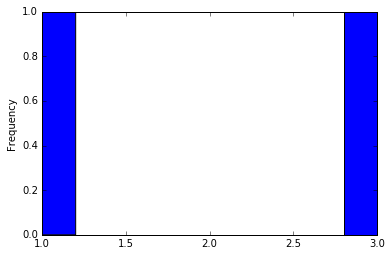

OBK1818
É mais comum no 3.0 período.


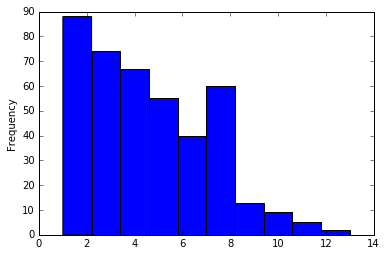

OBS1959
É mais comum no 1.0 período.


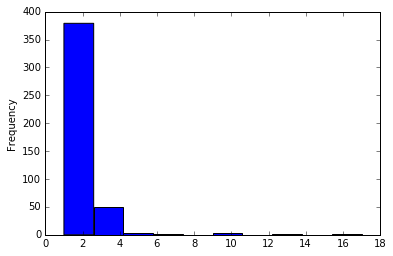

ODX1244
É mais comum no 3.0 período.


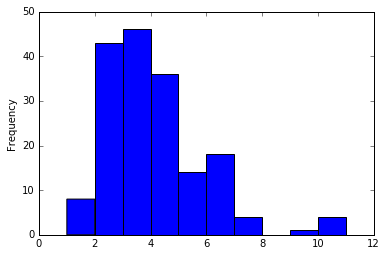

OGJ1002
É mais comum no 6.0 período.


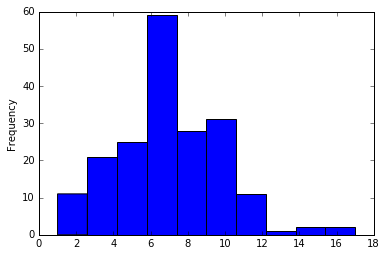

OIC1167
É mais comum no 2.0 período.


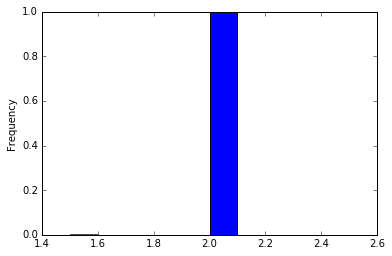

OIL1847
É mais comum no 4.0 período.


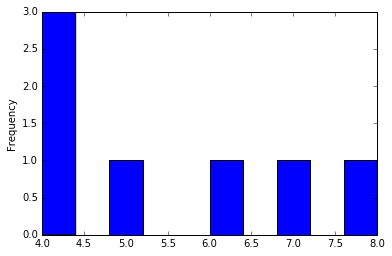

OIR1191
É mais comum no 4.0 período.


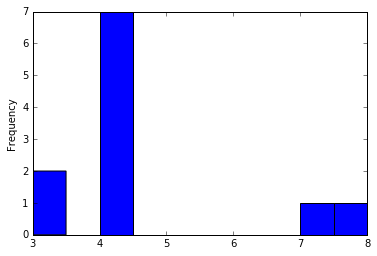

OIY1577
É mais comum no 9.0 período.


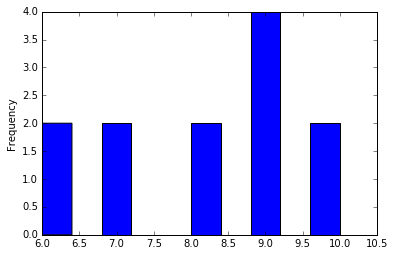

OJL1559
É mais comum no 3.0 período.


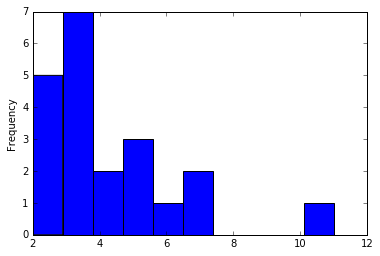

OJV1458
É mais comum no 1.0 período.


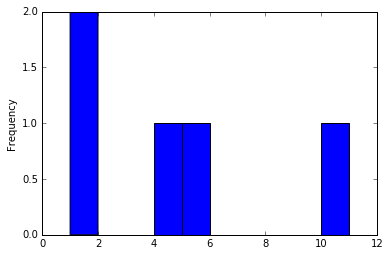

OKQ1453
É mais comum no 1.0 período.


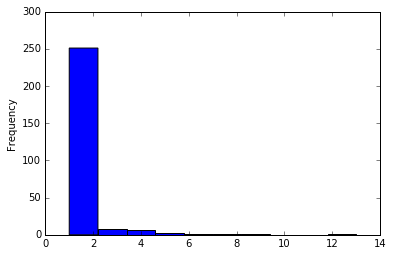

OLC1422
É mais comum no 8.0 período.


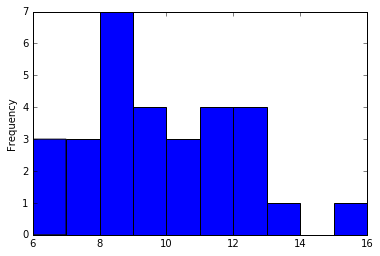

ONX1089
É mais comum no 3.0 período.


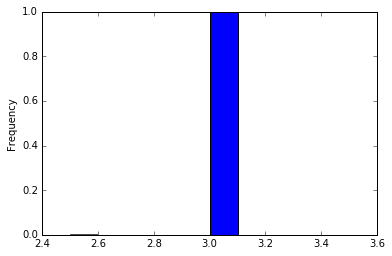

OOR1975
É mais comum no 6.0 período.


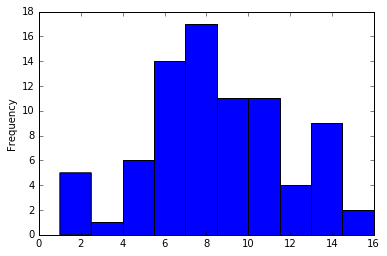

OOZ1112
É mais comum no 1.0 período.


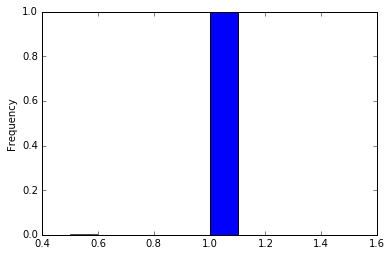

OPG1830
É mais comum no 1.0 período.


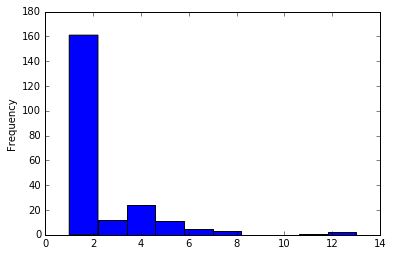

OQO1824
É mais comum no 3.0 período.


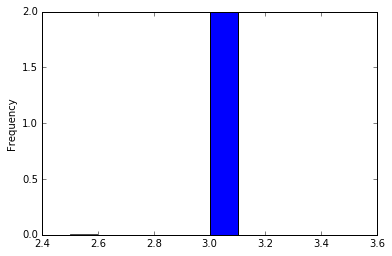

OSC1214
É mais comum no 2.0 período.


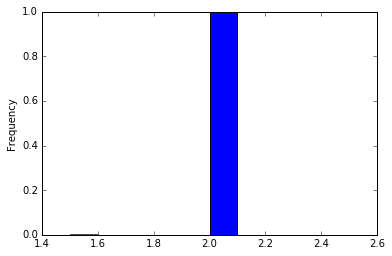

OSZ1393
É mais comum no 5.0 período.


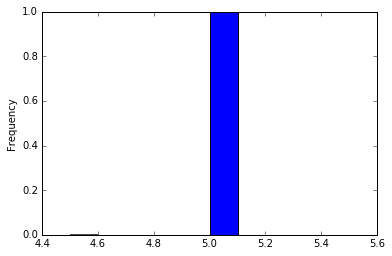

OTJ1733
É mais comum no 1.0 período.


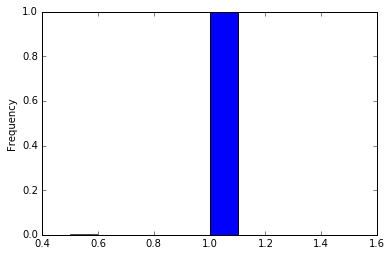

OUT1489
É mais comum no 9.0 período.


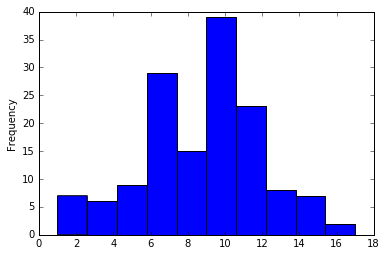

OVR1256
É mais comum no 10.0 período.


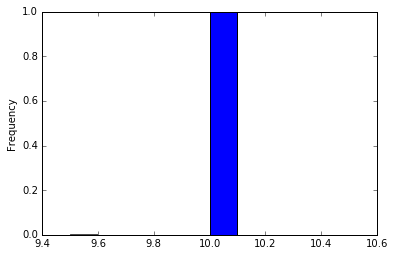

OWG1887
É mais comum no 11.0 período.


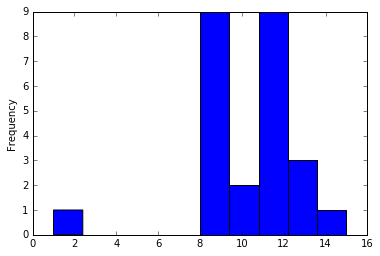

OWM1192
É mais comum no 1.0 período.


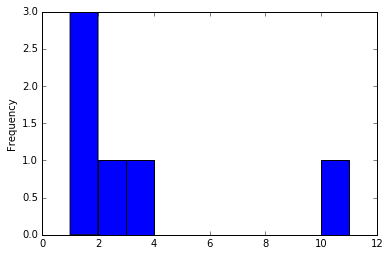

OWS1045
É mais comum no 1.0 período.


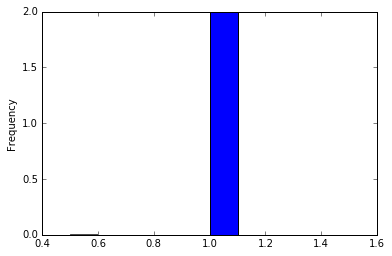

OYT1041
É mais comum no 3.0 período.


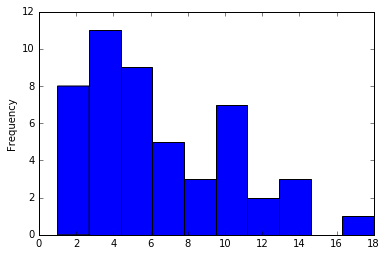

OZN1182
É mais comum no 5.0 período.


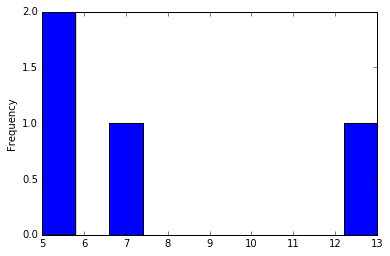

PAT1594
É mais comum no 1.0 período.


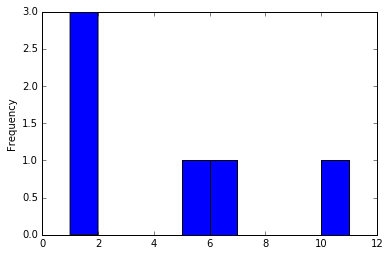

PAU1716
É mais comum no 2.0 período.


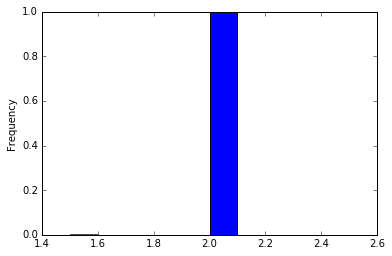

PBJ1031
É mais comum no 1.0 período.


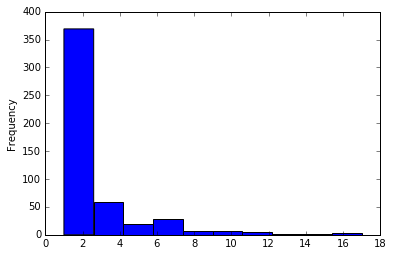

PDP1596
É mais comum no 1.0 período.


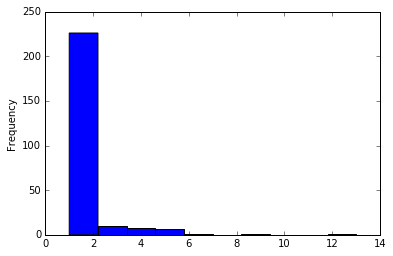

PDX1840
É mais comum no 2.0 período.


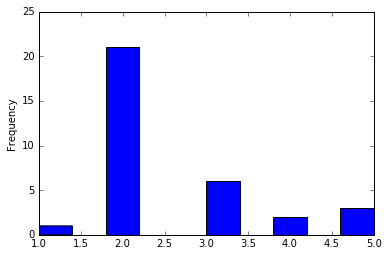

PDZ1926
É mais comum no 1.0 período.


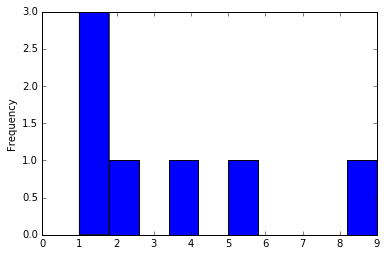

PEC1795
É mais comum no 2.0 período.


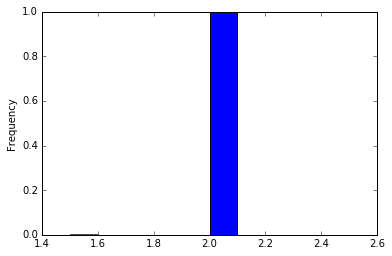

PFB1675
É mais comum no 8.0 período.


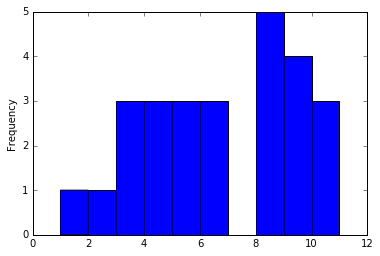

PGM1838
É mais comum no 9.0 período.


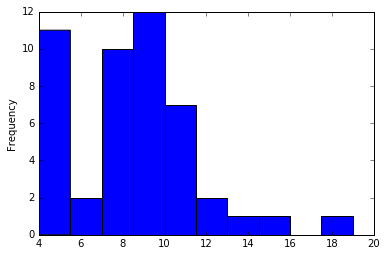

PGS1160
É mais comum no 3.0 período.


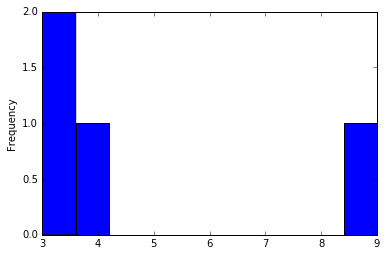

PKS1273
É mais comum no 10.0 período.


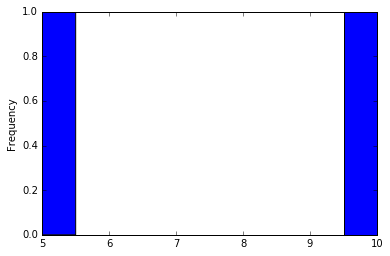

PKU1799
É mais comum no 10.0 período.


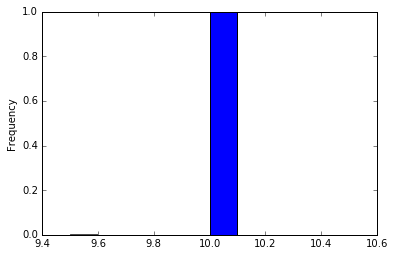

PLO1823
É mais comum no 3.0 período.


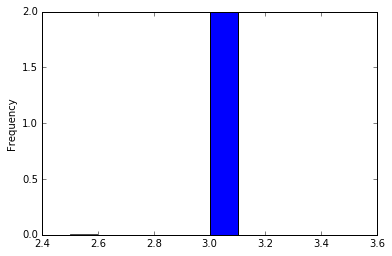

PLS1209
É mais comum no 3.0 período.


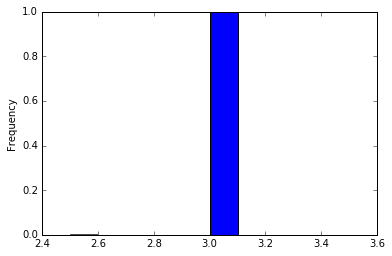

PLV1615
É mais comum no 6.0 período.


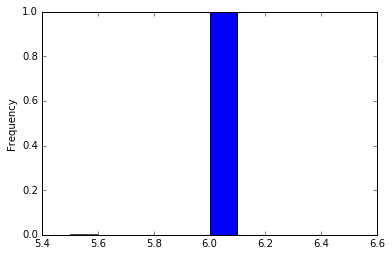

PMW1536
É mais comum no 7.0 período.


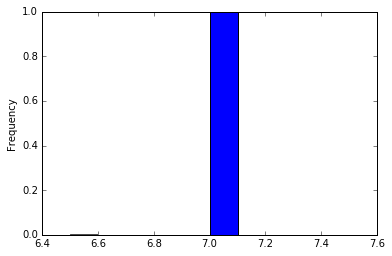

PMZ1257
É mais comum no 1.0 período.


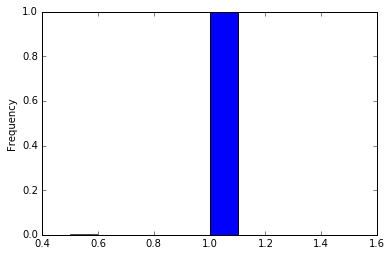

PNI1143
É mais comum no 6.0 período.


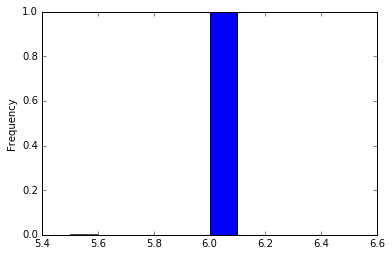

PPW1971
É mais comum no 1.0 período.


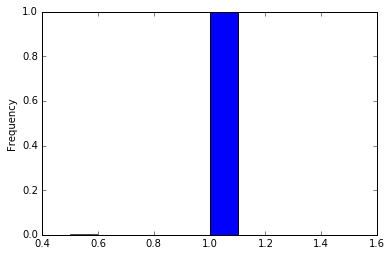

PRA1665
É mais comum no 6.0 período.


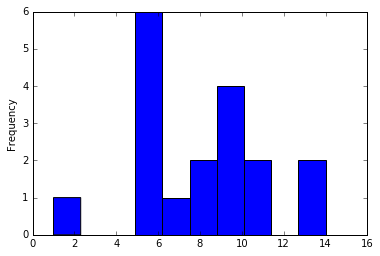

PSW1036
É mais comum no 10.0 período.


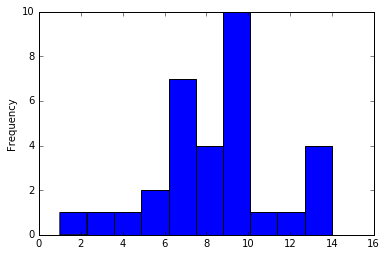

PTL1270
É mais comum no 1.0 período.


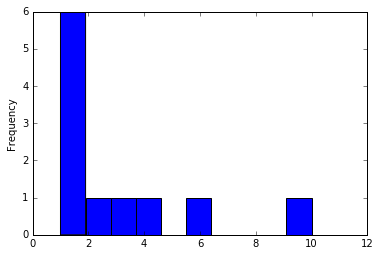

PUC1929
É mais comum no 1.0 período.


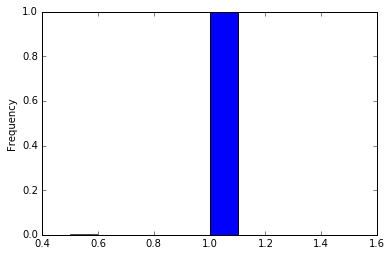

PUG1292
É mais comum no 1.0 período.


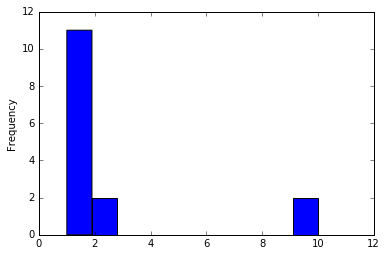

PYL1867
É mais comum no 12.0 período.


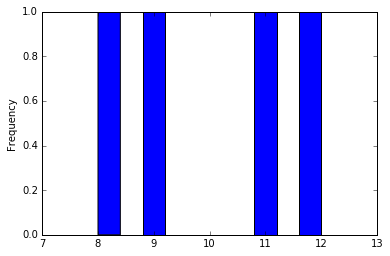

PZL1376
É mais comum no 1.0 período.


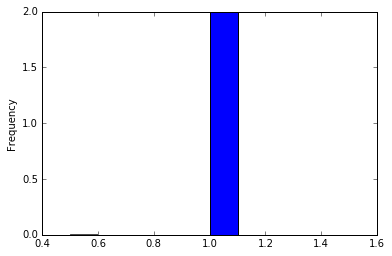

QBK1122
É mais comum no 3.0 período.


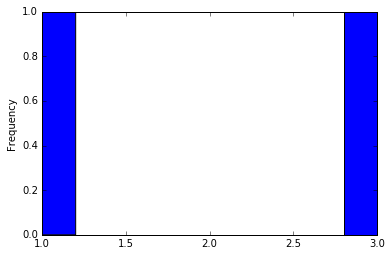

QBY1274
É mais comum no 5.0 período.


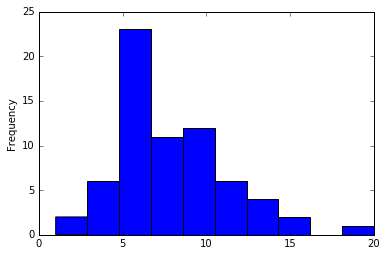

QCJ1161
É mais comum no 3.0 período.


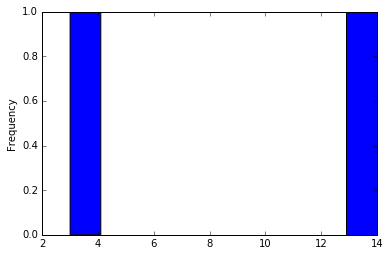

QED1485
É mais comum no 7.0 período.


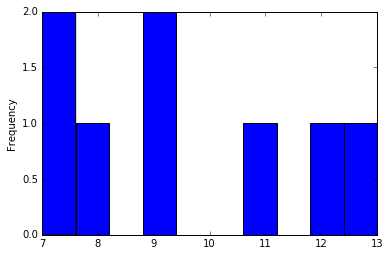

QEI1217
É mais comum no 12.0 período.


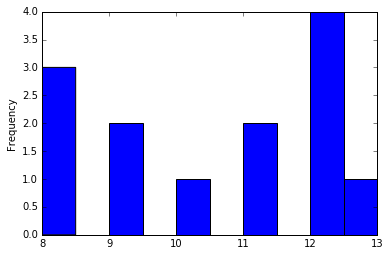

QFD1375
É mais comum no 3.0 período.


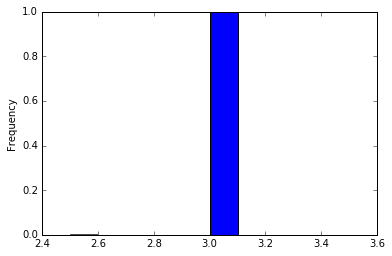

QFJ1836
É mais comum no 1.0 período.


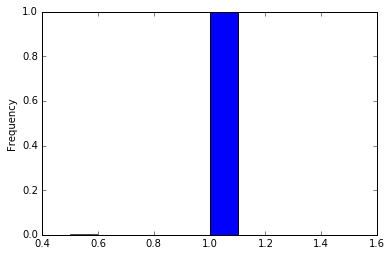

QFQ1703
É mais comum no 8.0 período.


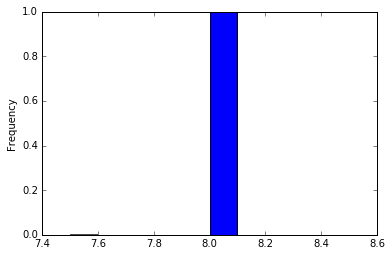

QGQ1106
É mais comum no 9.0 período.


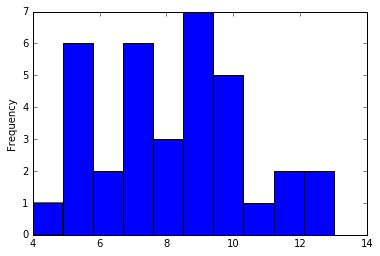

QIS1835
É mais comum no 7.0 período.


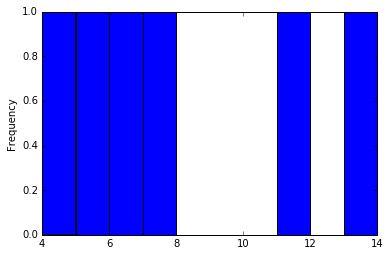

QJW1368
É mais comum no 1.0 período.


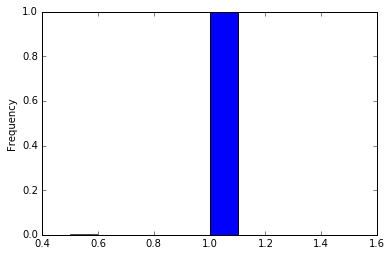

QKR1437
É mais comum no 8.0 período.


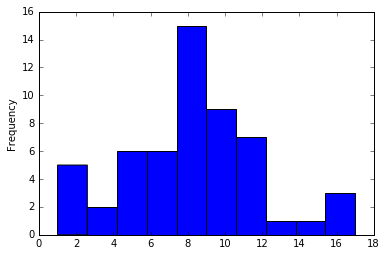

QNG1889
É mais comum no 8.0 período.


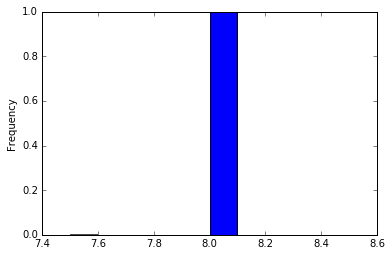

QNI1752
É mais comum no 2.0 período.


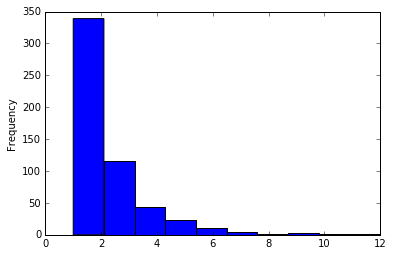

QPZ1285
É mais comum no 8.0 período.


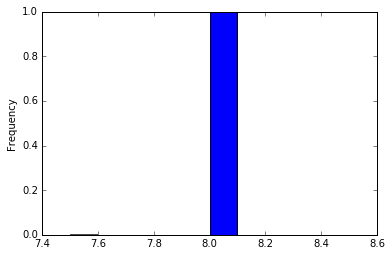

QQB1190
É mais comum no 8.0 período.


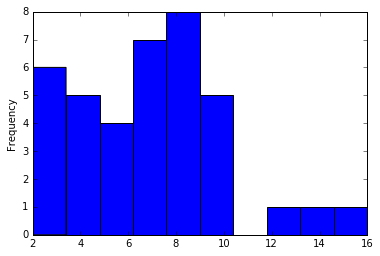

QRJ1943
É mais comum no 10.0 período.


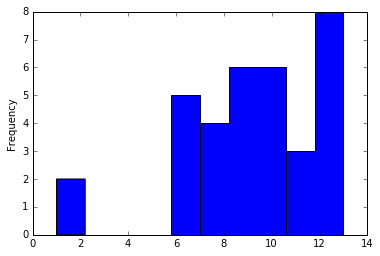

QSJ1299
É mais comum no 3.0 período.


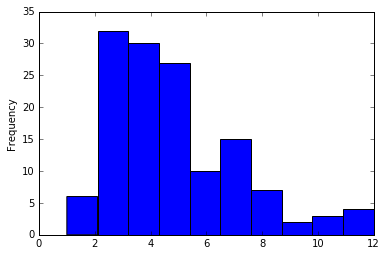

QSQ1863
É mais comum no 3.0 período.


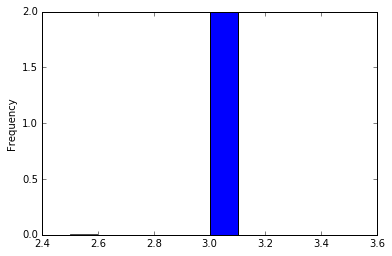

QSY1434
É mais comum no 2.0 período.


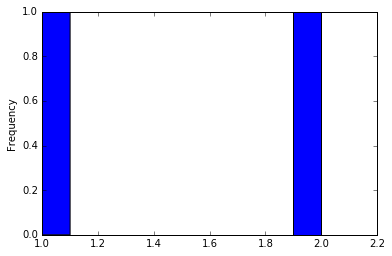

QTC1625
É mais comum no 1.0 período.


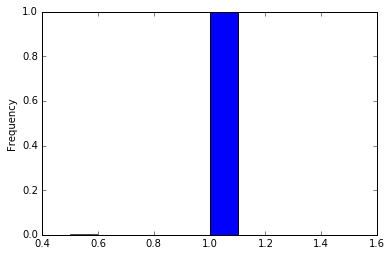

QTR1759
É mais comum no 12.0 período.


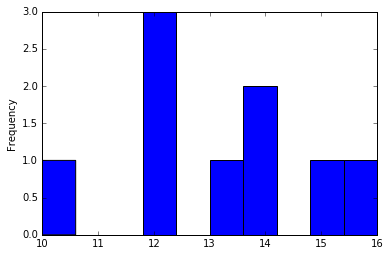

QUJ1994
É mais comum no 3.0 período.


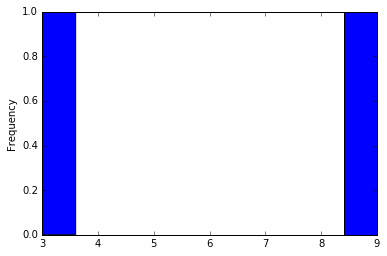

QUT1986
É mais comum no 7.0 período.


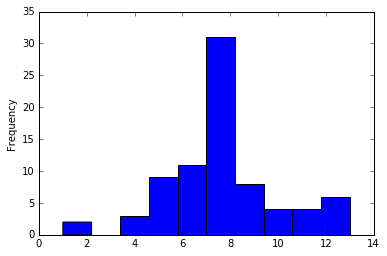

QVN1693
É mais comum no 2.0 período.


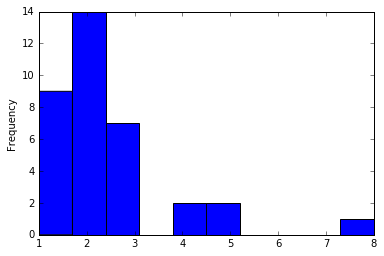

QWA1060
É mais comum no 4.0 período.


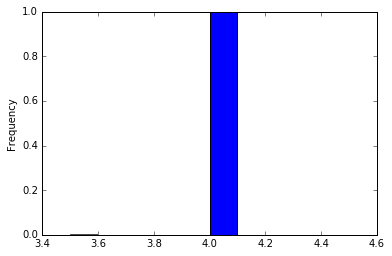

QXX1723
É mais comum no 5.0 período.


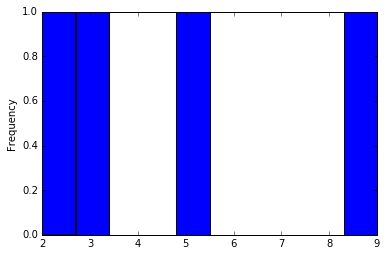

QYI1062
É mais comum no 8.0 período.


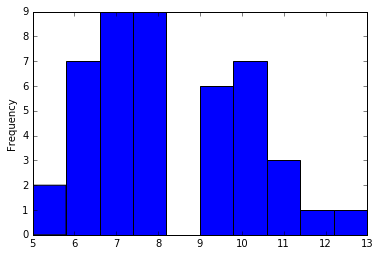

QZH1682
É mais comum no 7.0 período.


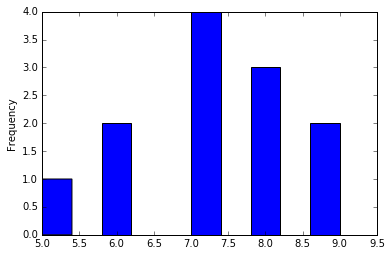

RBK1667
É mais comum no 5.0 período.


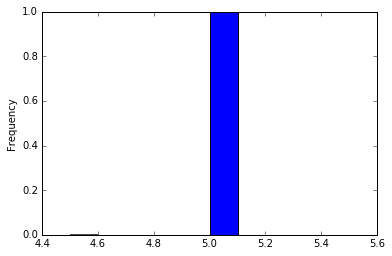

RBS1052
É mais comum no 10.0 período.


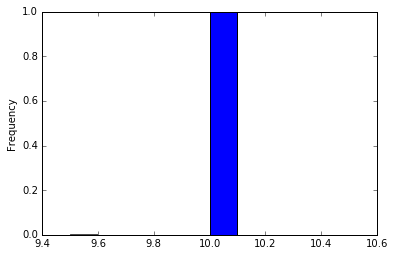

RDM1396
É mais comum no 1.0 período.


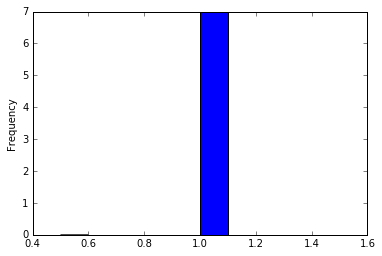

REB1582
É mais comum no 7.0 período.


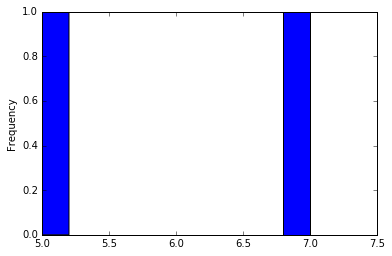

RHY1360
É mais comum no 10.0 período.


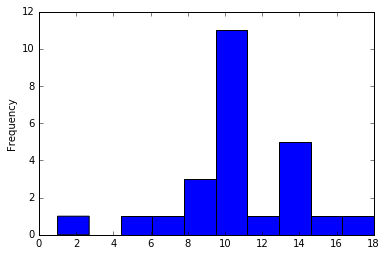

RJD1628
É mais comum no 1.0 período.


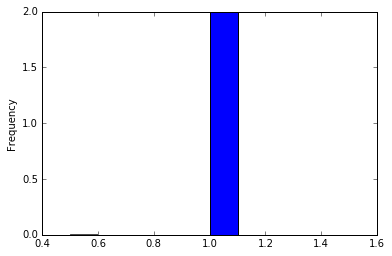

RJK1939
É mais comum no 3.0 período.


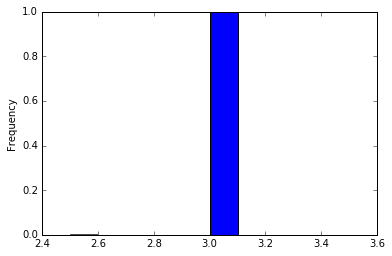

RLE1584
É mais comum no 3.0 período.


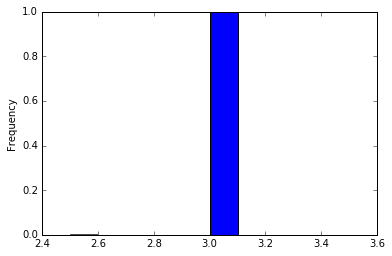

RLK1651
É mais comum no 10.0 período.


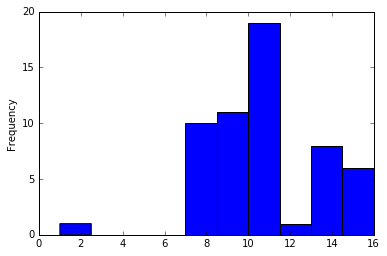

RLR1915
É mais comum no 2.0 período.


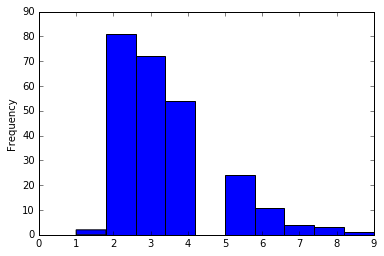

RLT1868
É mais comum no 5.0 período.


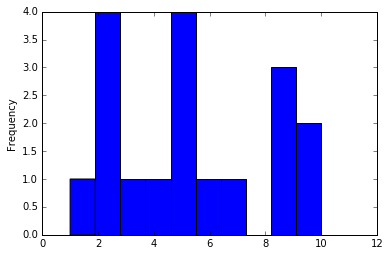

RMQ1679
É mais comum no 1.0 período.


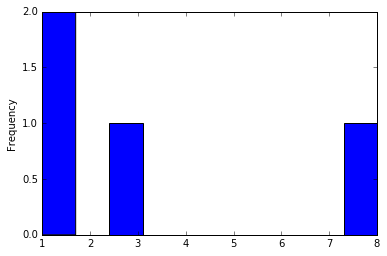

ROP1560
É mais comum no 3.0 período.


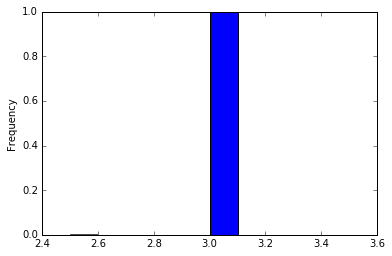

RQL1603
É mais comum no 11.0 período.


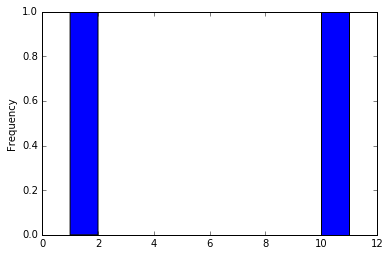

RRW1367
É mais comum no 1.0 período.


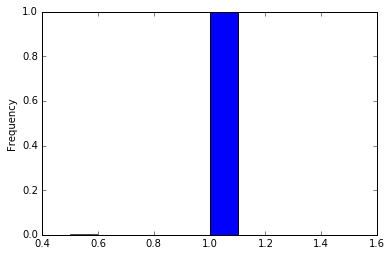

RTM1608
É mais comum no 7.0 período.


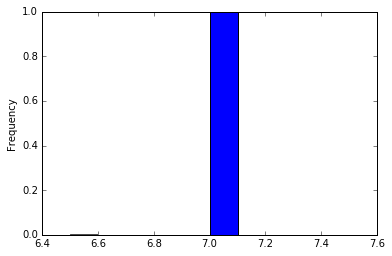

RTW1504
É mais comum no 3.0 período.


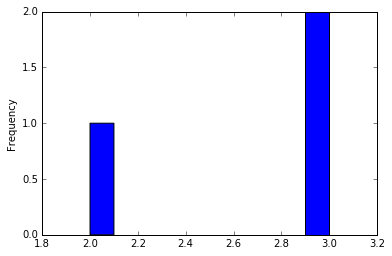

RUI1813
É mais comum no 3.0 período.


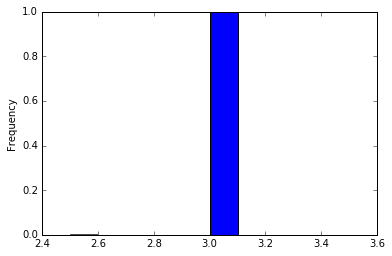

RUV1013
É mais comum no 3.0 período.


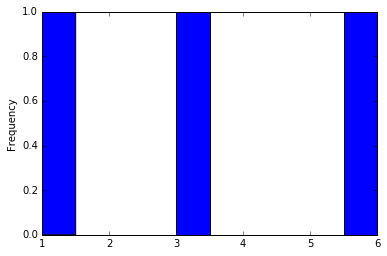

RUX1384
É mais comum no 2.0 período.


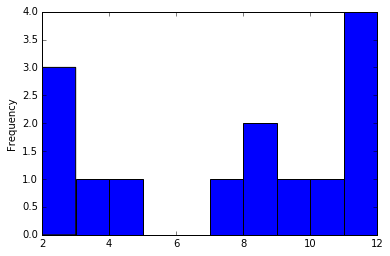

RVI1591
É mais comum no 7.0 período.


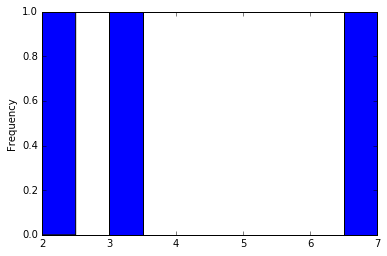

RXL1676
É mais comum no 4.0 período.


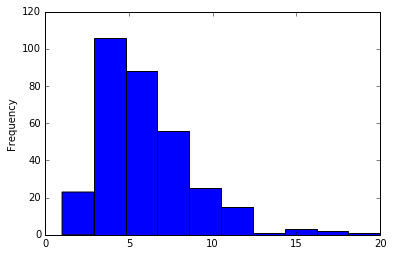

RXS1930
É mais comum no 2.0 período.


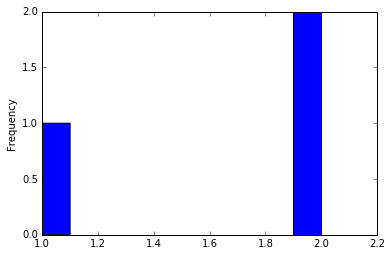

RYC1956
É mais comum no 7.0 período.


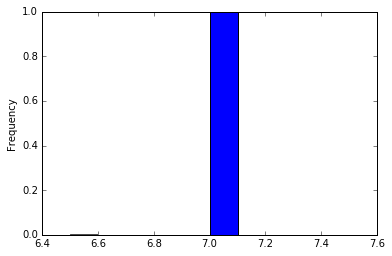

RZP1730
É mais comum no 9.0 período.


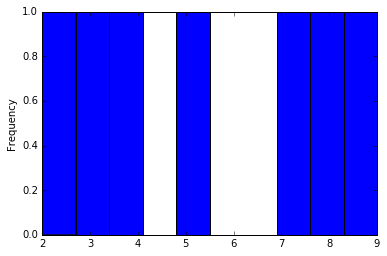

RZQ1378
É mais comum no 9.0 período.


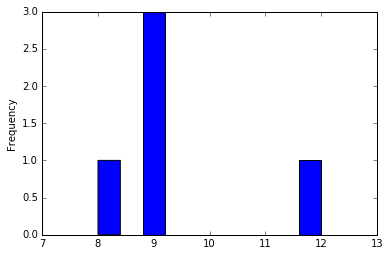

RZT1923
É mais comum no 5.0 período.


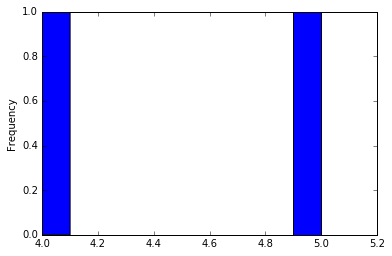

SDS1297
É mais comum no 9.0 período.


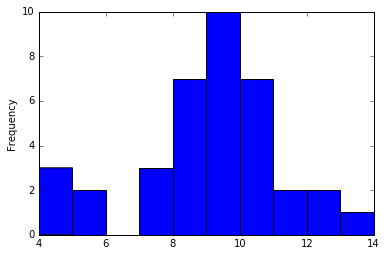

SFB1891
É mais comum no 2.0 período.


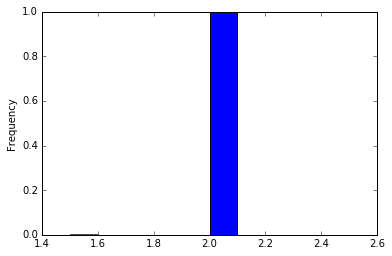

SFR1848
É mais comum no 1.0 período.


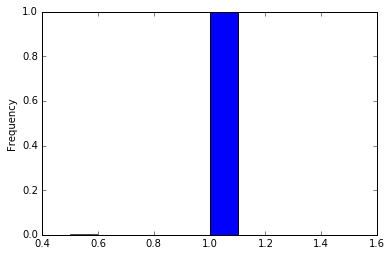

SFX1543
É mais comum no 4.0 período.


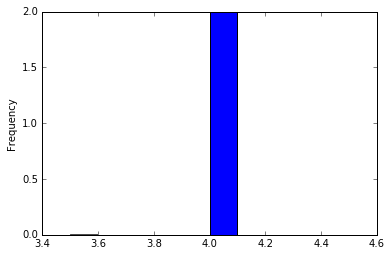

SHX1607
É mais comum no 9.0 período.


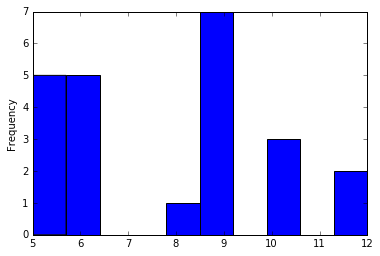

SHY1539
É mais comum no 11.0 período.


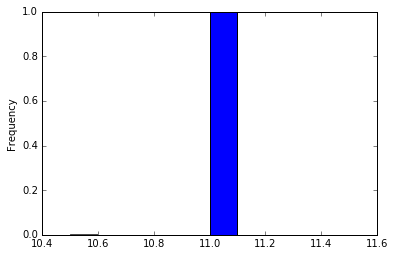

SIP1097
É mais comum no 5.0 período.


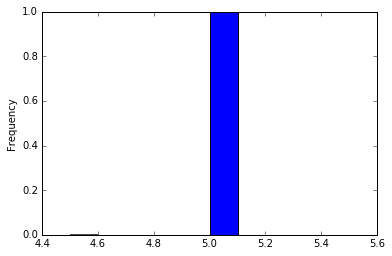

SJK1085
É mais comum no 3.0 período.


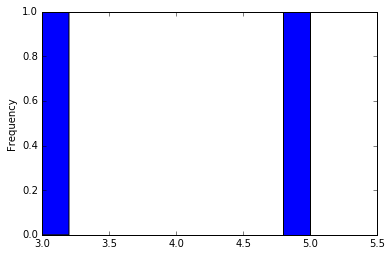

SKF1853
É mais comum no 3.0 período.


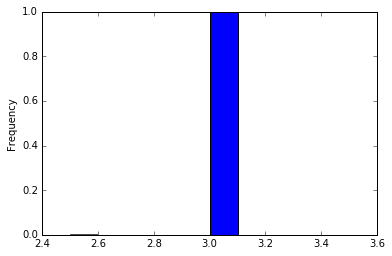

SKL1073
É mais comum no 10.0 período.


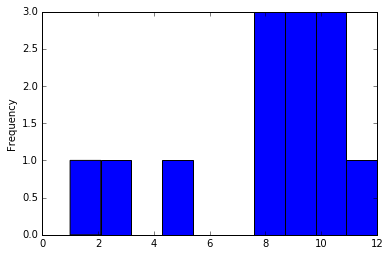

SML1900
É mais comum no 10.0 período.


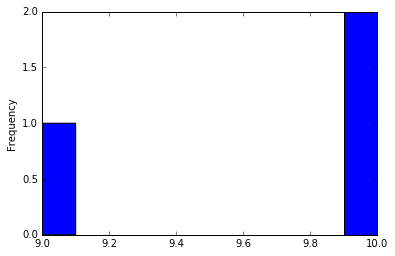

SNA1707
É mais comum no 1.0 período.


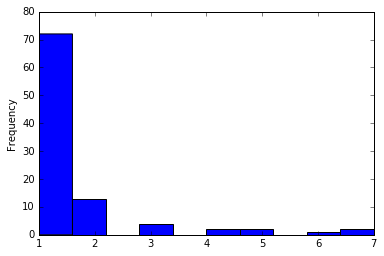

SNB1389
É mais comum no 6.0 período.


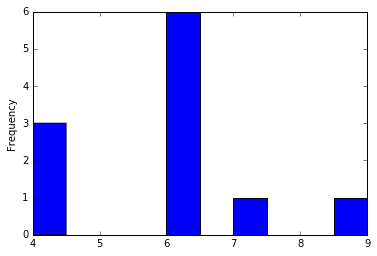

SND1572
É mais comum no 2.0 período.


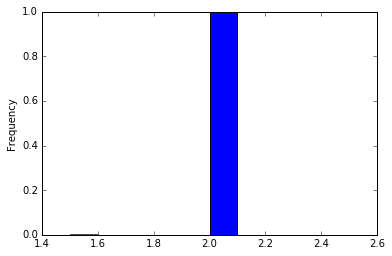

SPN1102
É mais comum no 14.0 período.


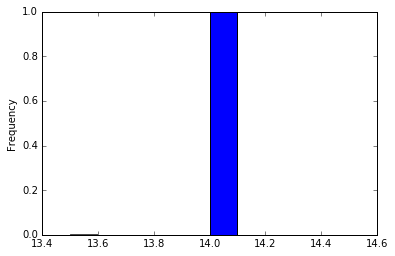

SPS1565
É mais comum no 6.0 período.


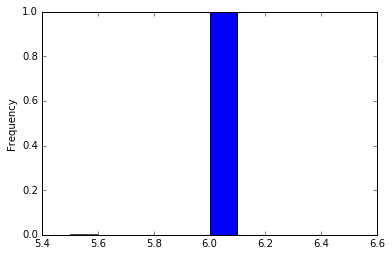

SQG1773
É mais comum no 1.0 período.


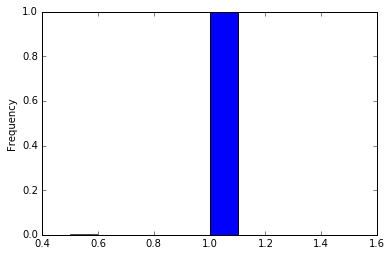

SQW1549
É mais comum no 1.0 período.


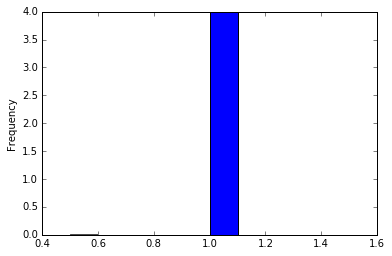

STV1048
É mais comum no 2.0 período.


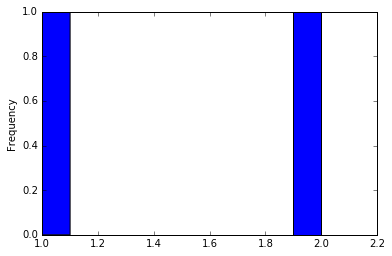

TBA1383
É mais comum no 4.0 período.


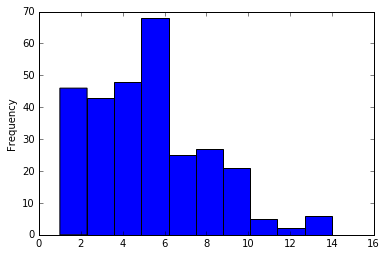

TBC1529
É mais comum no 11.0 período.


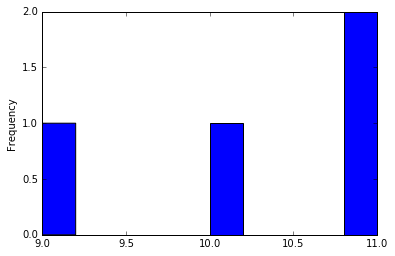

TBF1481
É mais comum no 7.0 período.


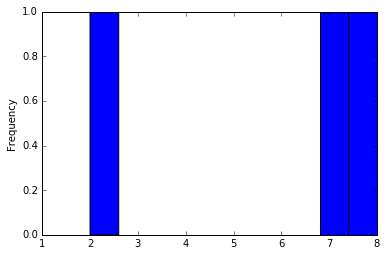

TBN1198
É mais comum no 7.0 período.


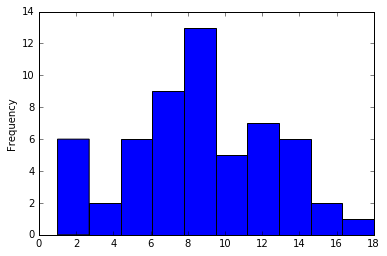

TBP1888
É mais comum no 3.0 período.


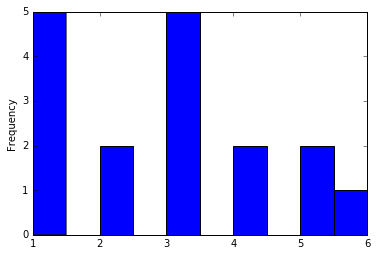

TBT1498
É mais comum no 5.0 período.


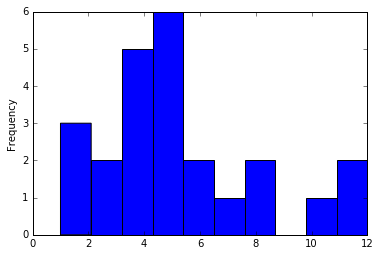

TFL1187
É mais comum no 8.0 período.


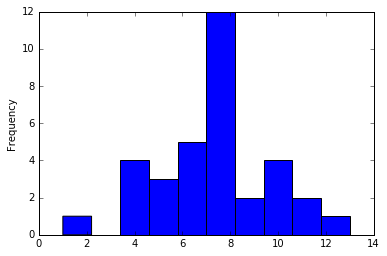

TGG1649
É mais comum no 6.0 período.


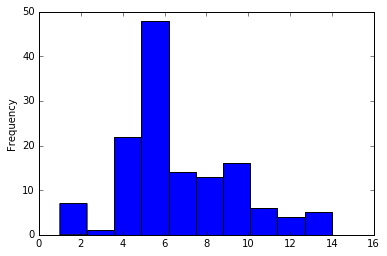

THD1282
É mais comum no 10.0 período.


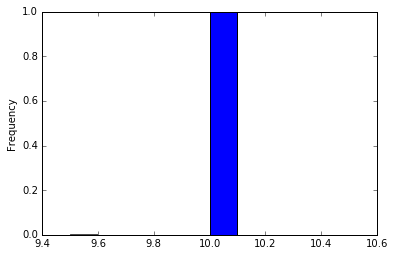

THJ1404
É mais comum no 3.0 período.


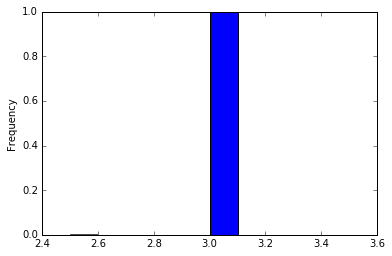

THS1722
É mais comum no 4.0 período.


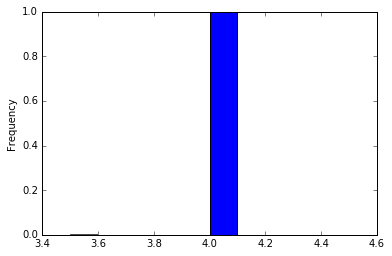

TIO1009
É mais comum no 1.0 período.


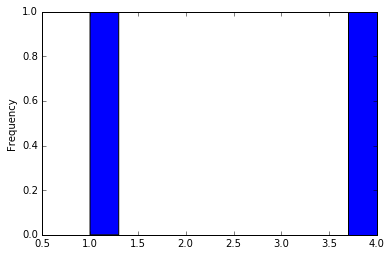

TOG1719
É mais comum no 11.0 período.


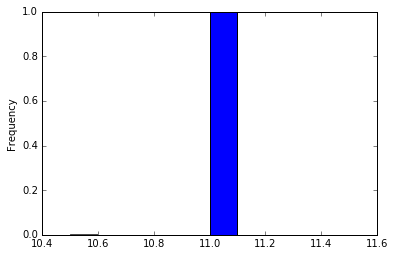

TOX1429
É mais comum no 10.0 período.


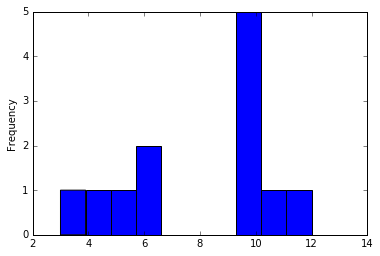

TSG1648
É mais comum no 9.0 período.


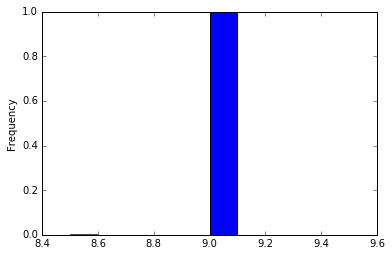

TTE1357
É mais comum no 1.0 período.


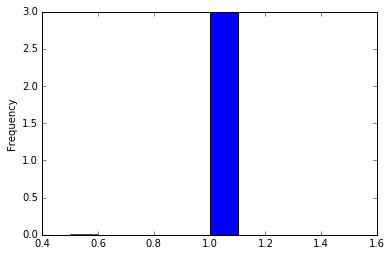

TTQ1828
É mais comum no 2.0 período.


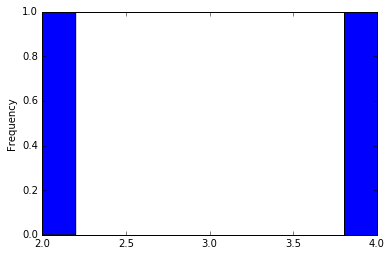

TXI1223
É mais comum no 15.0 período.


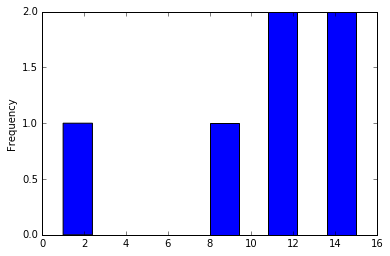

TYH1379
É mais comum no 14.0 período.


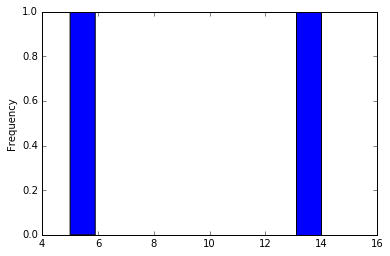

TYV1343
É mais comum no 1.0 período.


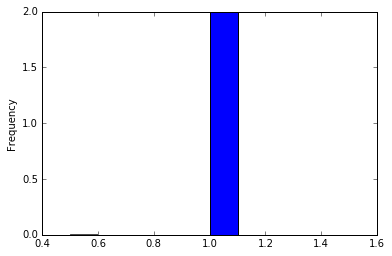

TZF1949
É mais comum no 3.0 período.


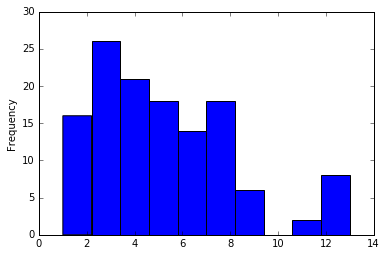

TZJ1993
É mais comum no 9.0 período.


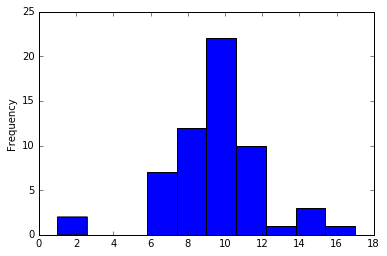

TZN1767
É mais comum no 5.0 período.


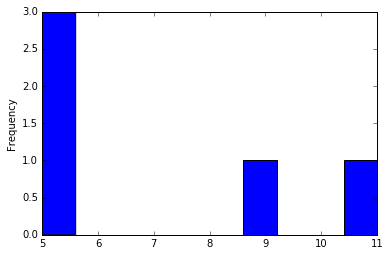

UAM1180
É mais comum no 2.0 período.


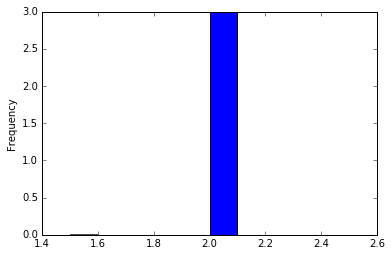

UAO1140
É mais comum no 11.0 período.


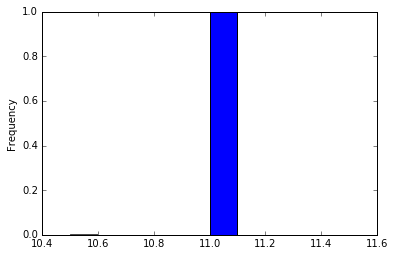

UBL1486
É mais comum no 3.0 período.


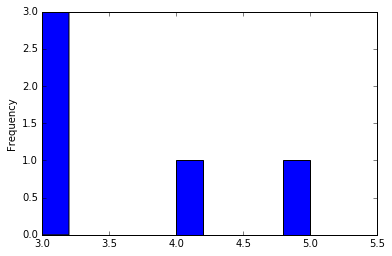

UCY1117
É mais comum no 7.0 período.


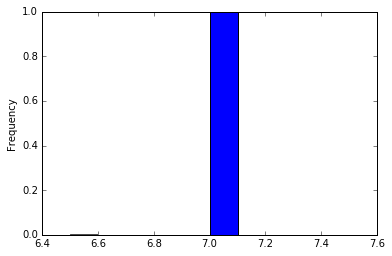

UDA1386
É mais comum no 7.0 período.


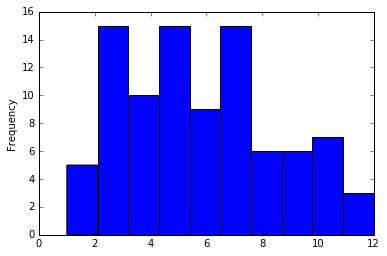

UEX1632
É mais comum no 10.0 período.


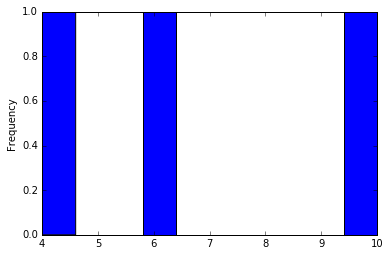

UFQ1165
É mais comum no 11.0 período.


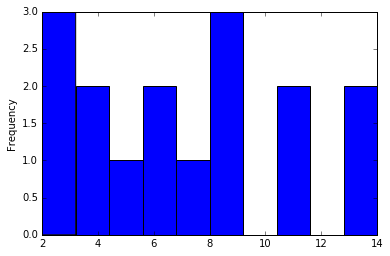

UFS1238
É mais comum no 3.0 período.


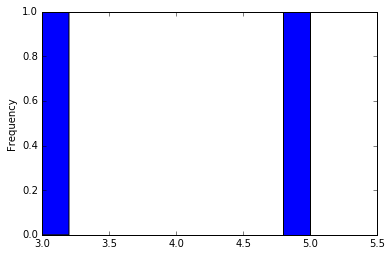

UGJ1258
É mais comum no 3.0 período.


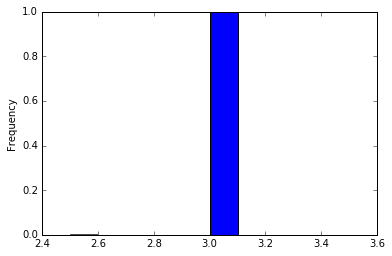

UGT1762
É mais comum no 1.0 período.


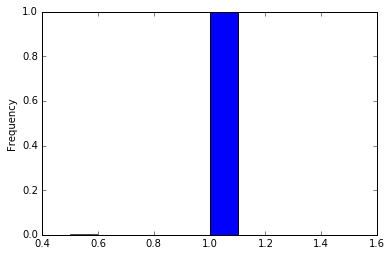

UHQ1508
É mais comum no 1.0 período.


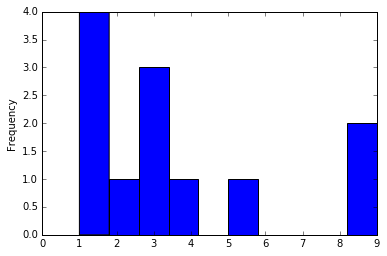

UKZ1310
É mais comum no 2.0 período.


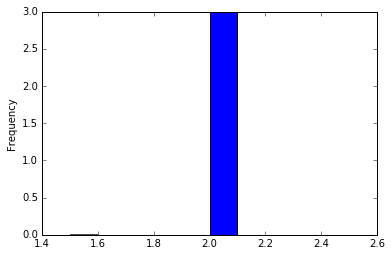

ULC1903
É mais comum no 5.0 período.


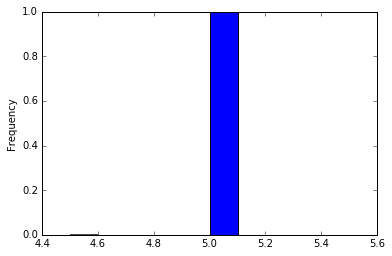

ULY1174
É mais comum no 9.0 período.


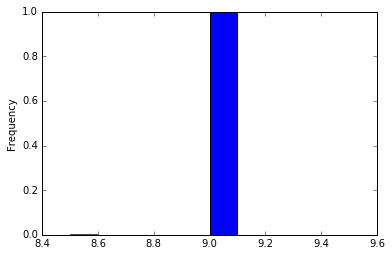

UML1790
É mais comum no 6.0 período.


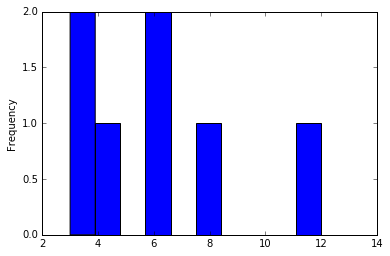

UPY1275
É mais comum no 1.0 período.


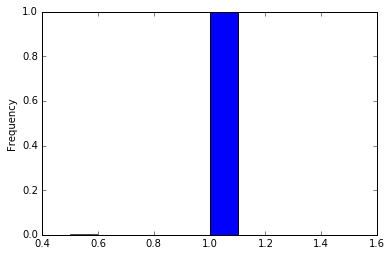

UQJ1907
É mais comum no 1.0 período.


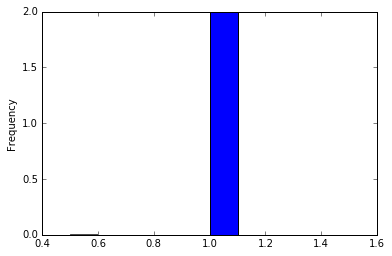

URC1120
É mais comum no 5.0 período.


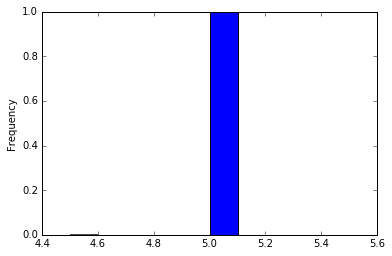

UTE1668
É mais comum no 5.0 período.


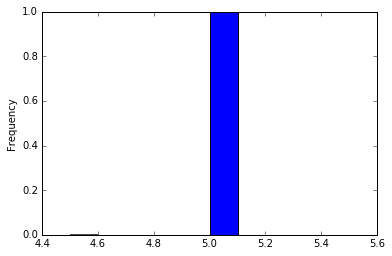

UTF1881
É mais comum no 9.0 período.


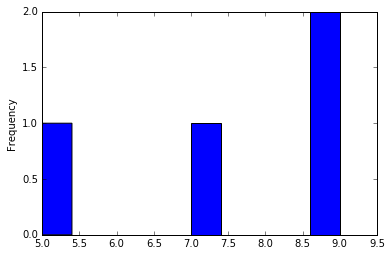

UTN1344
É mais comum no 8.0 período.


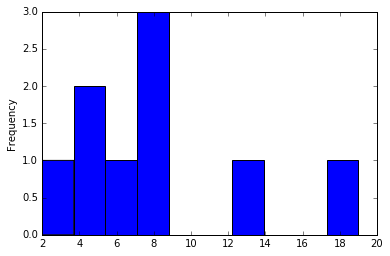

UWQ1125
É mais comum no 1.0 período.


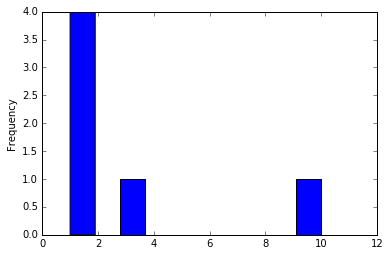

UXC1739
É mais comum no 1.0 período.


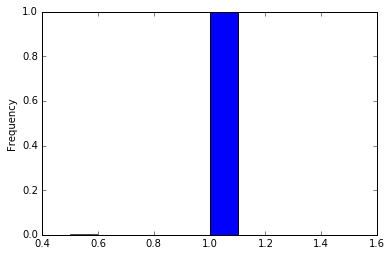

UZD1228
É mais comum no 1.0 período.


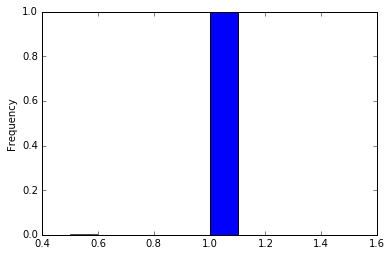

UZV1886
É mais comum no 5.0 período.


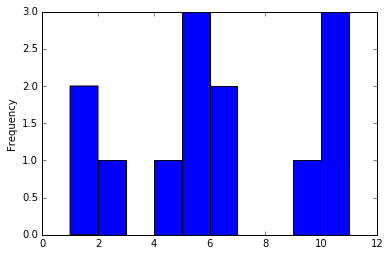

VAI1778
É mais comum no 1.0 período.


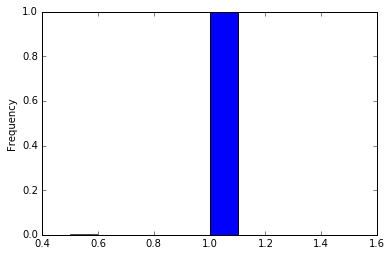

VAL1821
É mais comum no 1.0 período.


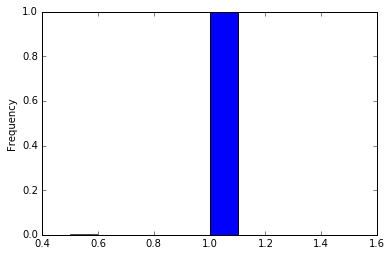

VBZ1499
É mais comum no 15.0 período.


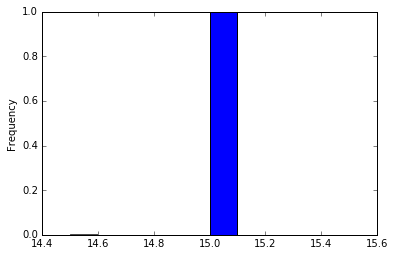

VDX1954
É mais comum no 3.0 período.


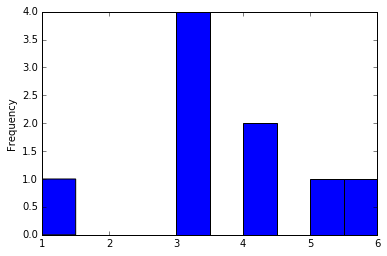

VEY1791
É mais comum no 4.0 período.


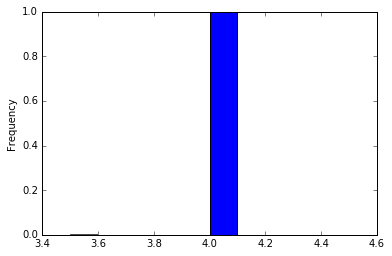

VFR1018
É mais comum no 1.0 período.


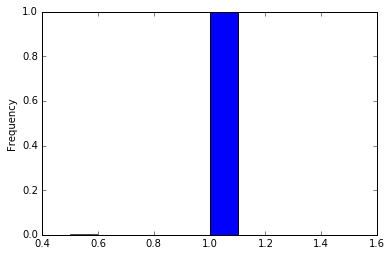

VGR1300
É mais comum no 4.0 período.


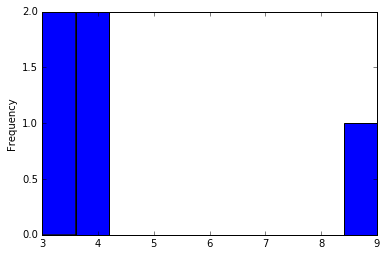

VGU1034
É mais comum no 1.0 período.


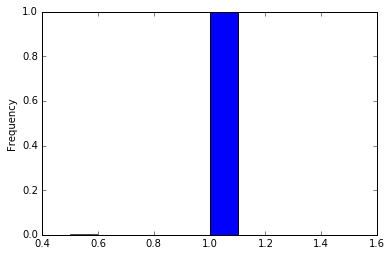

VIG1623
É mais comum no 2.0 período.


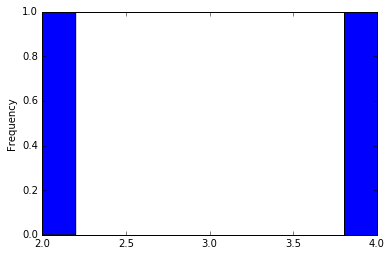

VJU1267
É mais comum no 5.0 período.


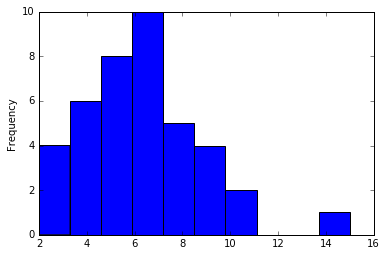

VKT1587
É mais comum no 1.0 período.


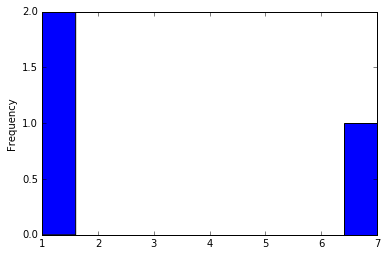

VLE1289
É mais comum no 1.0 período.


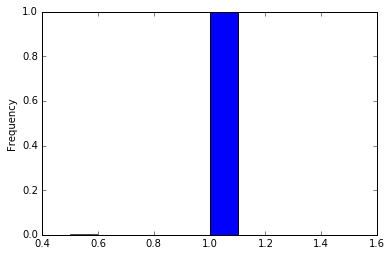

VMN1629
É mais comum no 2.0 período.


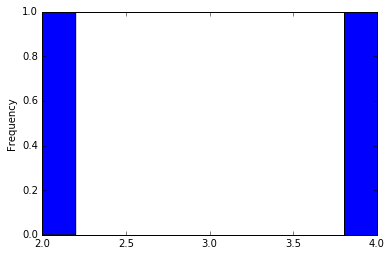

VOH1525
É mais comum no 4.0 período.


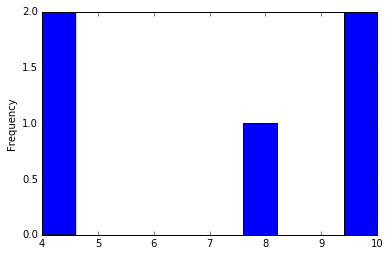

VPL1186
É mais comum no 1.0 período.


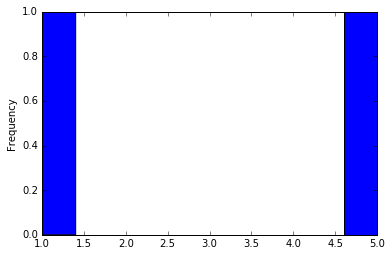

VQP1780
É mais comum no 11.0 período.


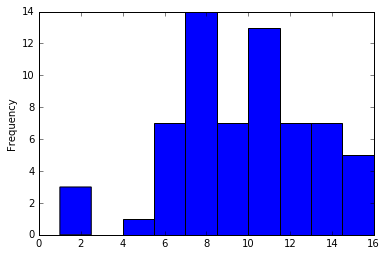

VRL1694
É mais comum no 1.0 período.


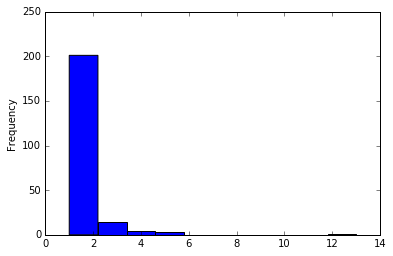

VRY1444
É mais comum no 3.0 período.


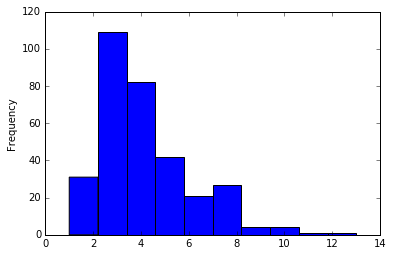

VSG1332
É mais comum no 6.0 período.


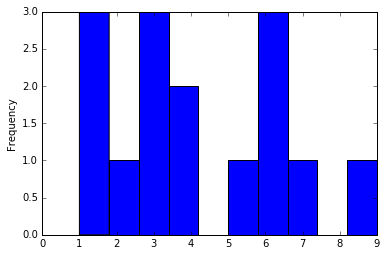

VTP1946
É mais comum no 1.0 período.


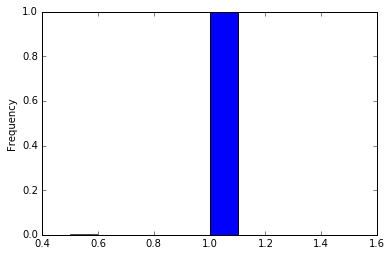

VUS1381
É mais comum no 4.0 período.


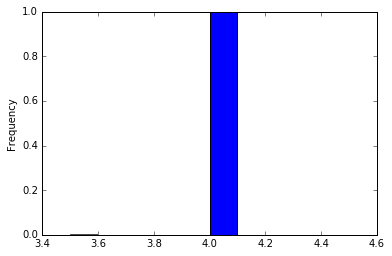

VXE1138
É mais comum no 10.0 período.


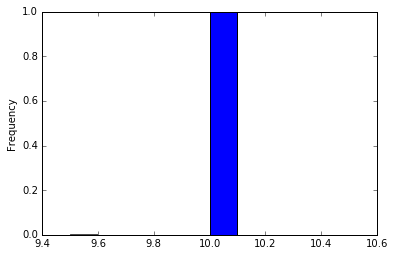

VZF1397
É mais comum no 6.0 período.


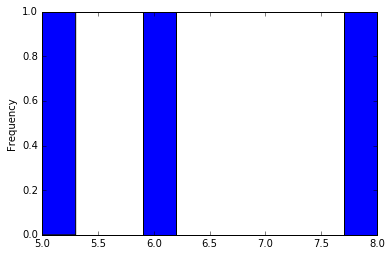

WAO1385
É mais comum no 2.0 período.


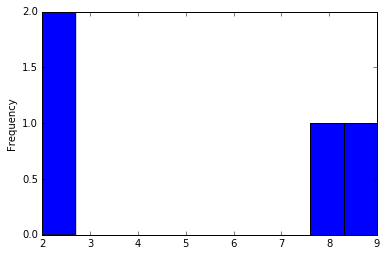

WBD1967
É mais comum no 6.0 período.


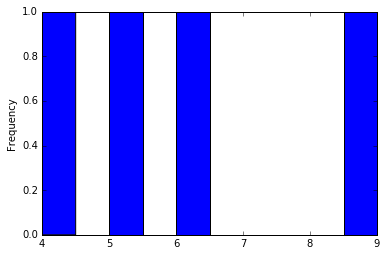

WCJ1507
É mais comum no 5.0 período.


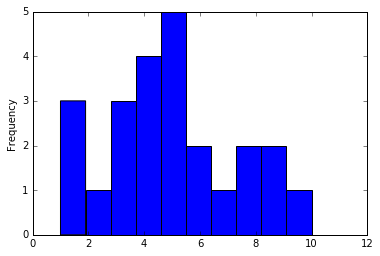

WDC1081
É mais comum no 10.0 período.


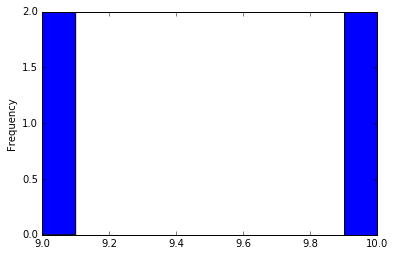

WES1408
É mais comum no 12.0 período.


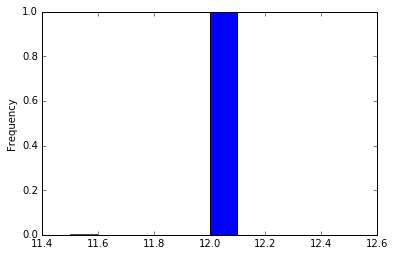

WFI1064
É mais comum no 2.0 período.


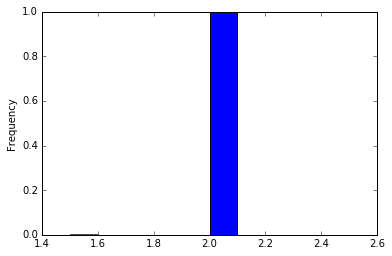

WGC1705
É mais comum no 10.0 período.


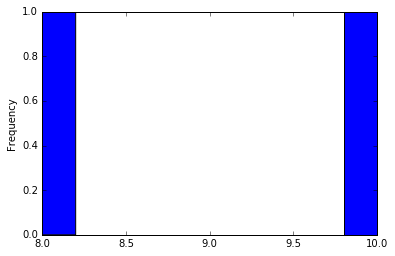

WGX1689
É mais comum no 1.0 período.


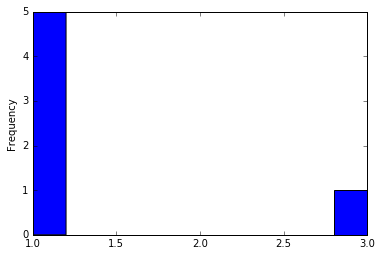

WHO1902
É mais comum no 11.0 período.


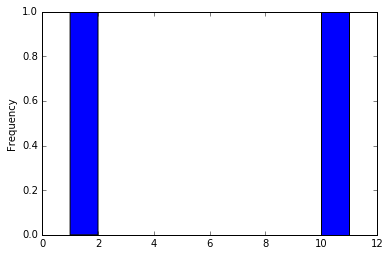

WHV1717
É mais comum no 9.0 período.


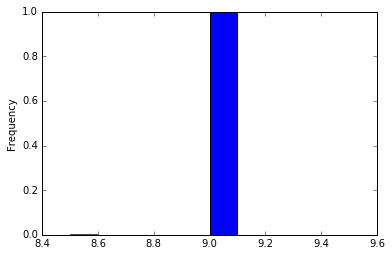

WIH1438
É mais comum no 1.0 período.


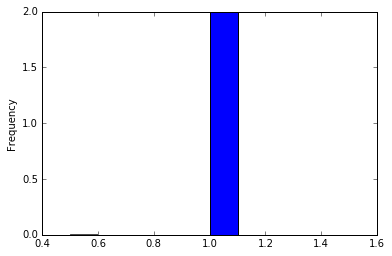

WJB1342
É mais comum no 2.0 período.


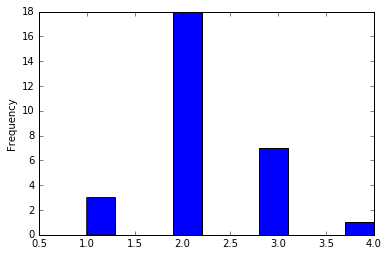

WKW1070
É mais comum no 1.0 período.


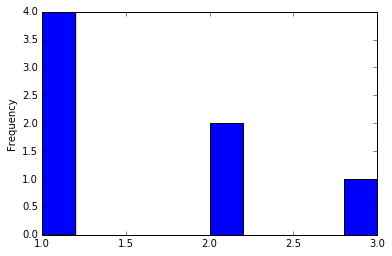

WLH1482
É mais comum no 1.0 período.


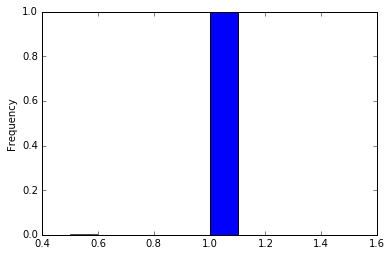

WLN1086
É mais comum no 2.0 período.


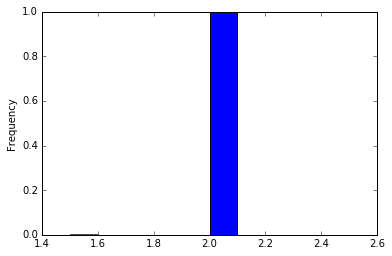

WLP1578
É mais comum no 1.0 período.


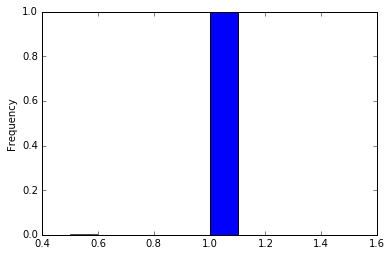

WNC1771
É mais comum no 8.0 período.


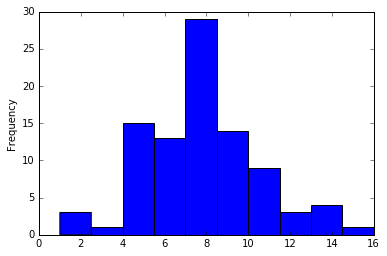

WPB1428
É mais comum no 10.0 período.


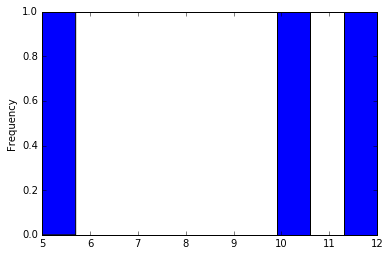

WRC1627
É mais comum no 1.0 período.


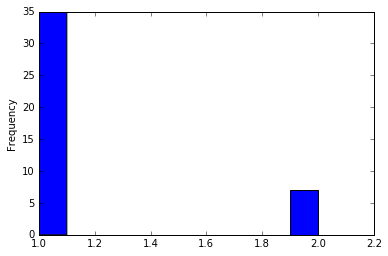

WRV1173
É mais comum no 2.0 período.


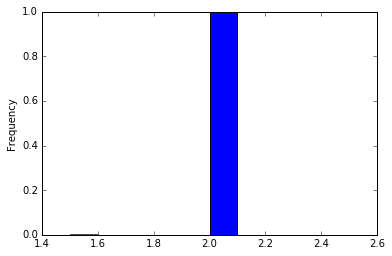

WSA1420
É mais comum no 5.0 período.


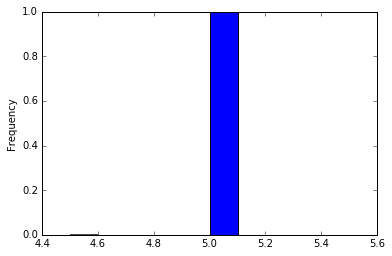

WSB1202
É mais comum no 1.0 período.


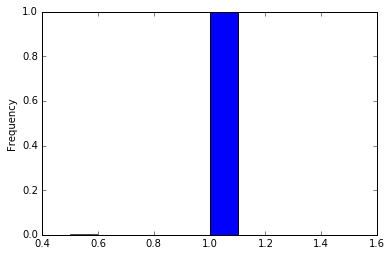

WST1188
É mais comum no 4.0 período.


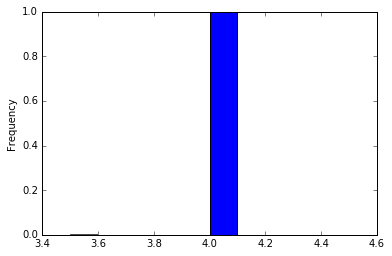

WTF1713
É mais comum no 4.0 período.


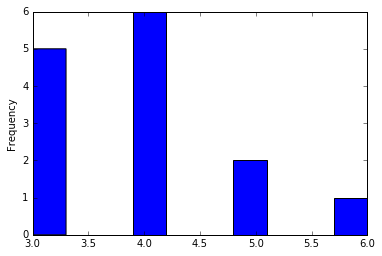

WVE1020
É mais comum no 5.0 período.


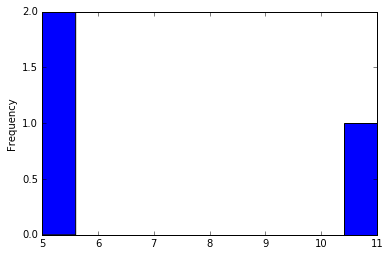

WVM1442
É mais comum no 2.0 período.


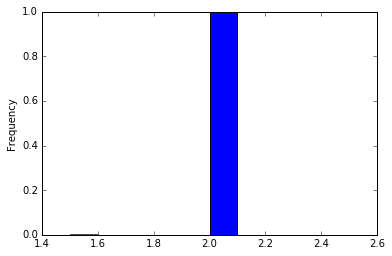

WVZ1249
É mais comum no 4.0 período.


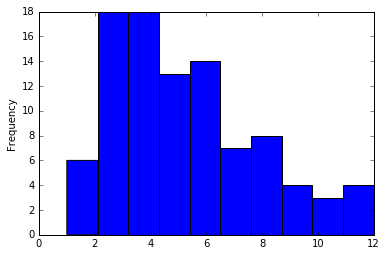

WWT1451
É mais comum no 1.0 período.


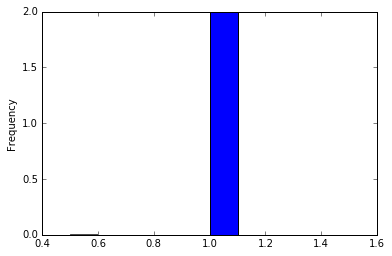

WWW1814
É mais comum no 1.0 período.


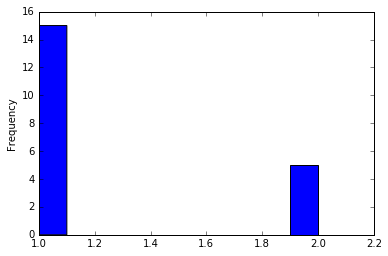

WXA1110
É mais comum no 1.0 período.


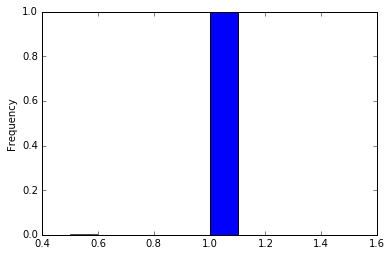

WXN1077
É mais comum no 3.0 período.


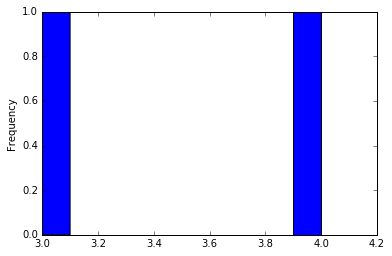

WXQ1133
É mais comum no 5.0 período.


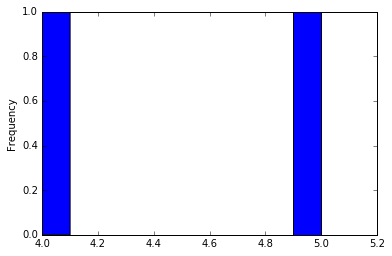

WXY1170
É mais comum no 1.0 período.


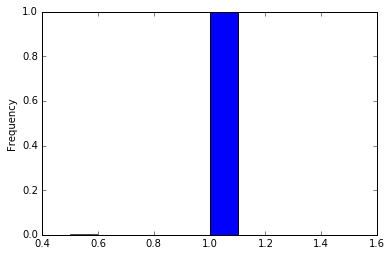

WYV1480
É mais comum no 3.0 período.


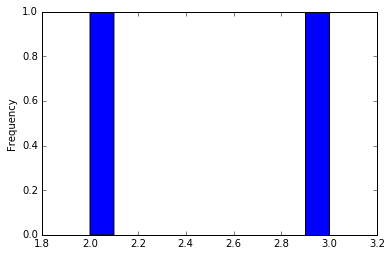

XDO1241
É mais comum no 1.0 período.


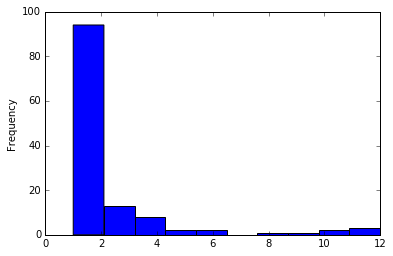

XFF1781
É mais comum no 1.0 período.


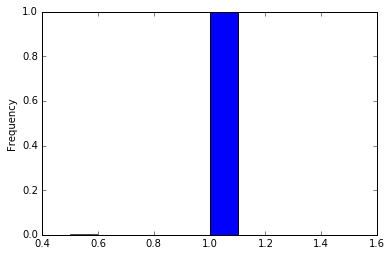

XFW1558
É mais comum no 3.0 período.


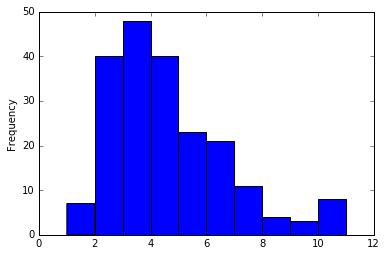

XFX1892
É mais comum no 5.0 período.


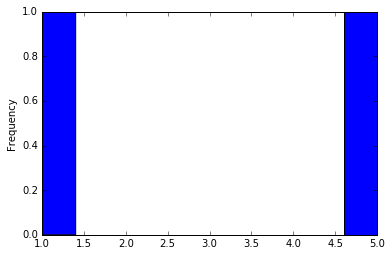

XGA1316
É mais comum no 6.0 período.


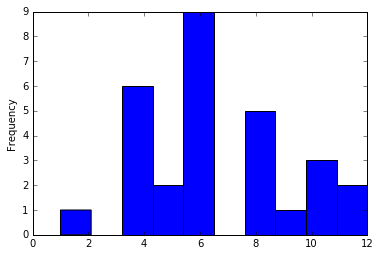

XGC1837
É mais comum no 2.0 período.


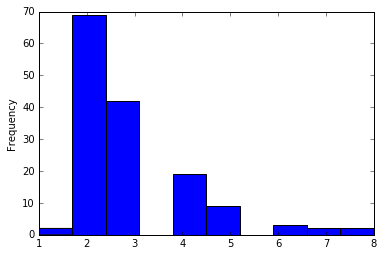

XHB1152
É mais comum no 3.0 período.


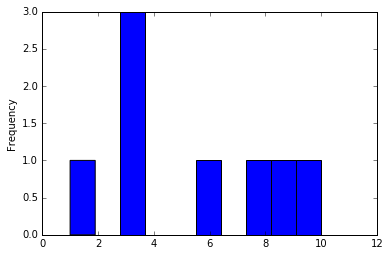

XHF1647
É mais comum no 6.0 período.


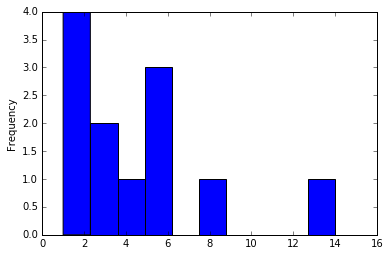

XHT1553
É mais comum no 7.0 período.


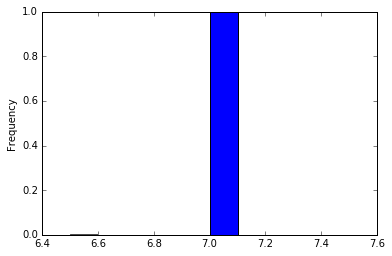

XHX1371
É mais comum no 10.0 período.


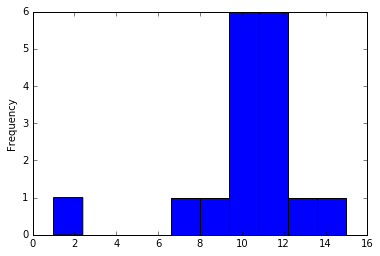

XJA1069
É mais comum no 1.0 período.


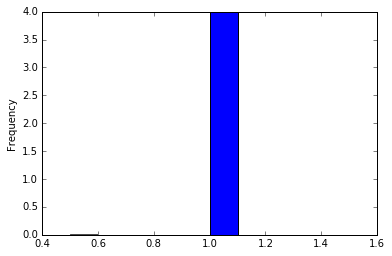

XJD1746
É mais comum no 11.0 período.


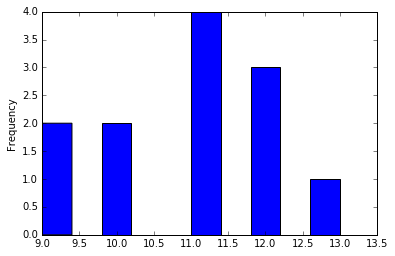

XJL1335
É mais comum no 1.0 período.


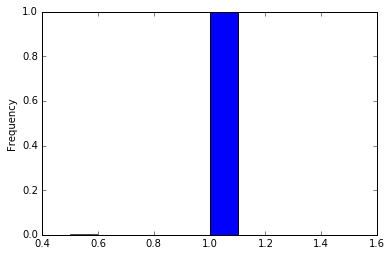

XJR1494
É mais comum no 5.0 período.


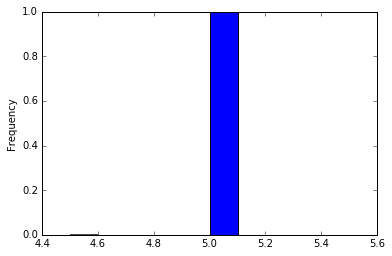

XLS1406
É mais comum no 10.0 período.


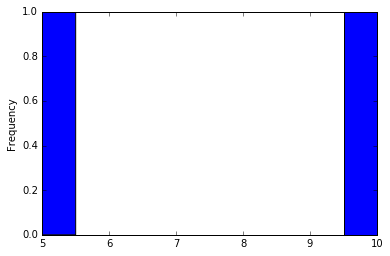

XLZ1721
É mais comum no 6.0 período.


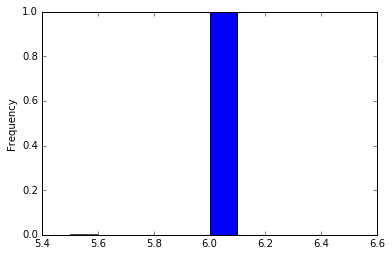

XMM1516
É mais comum no 1.0 período.


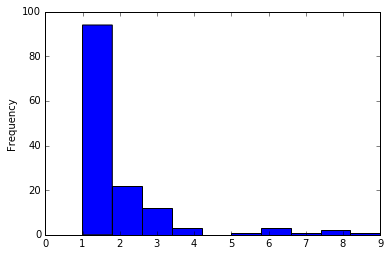

XNE1105
É mais comum no 1.0 período.


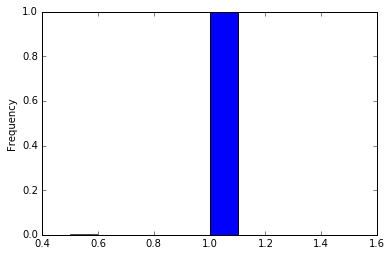

XNR1145
É mais comum no 1.0 período.


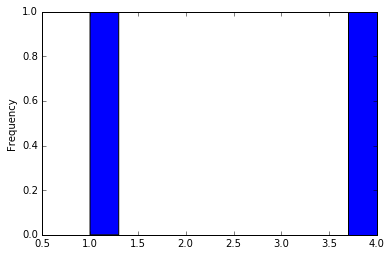

XNU1053
É mais comum no 3.0 período.


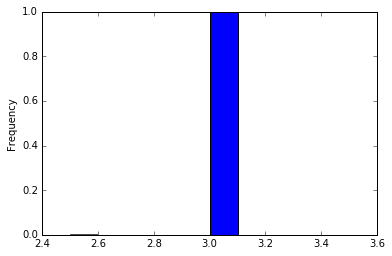

XOA1296
É mais comum no 8.0 período.


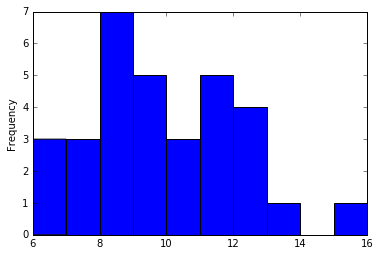

XRK1471
É mais comum no 10.0 período.


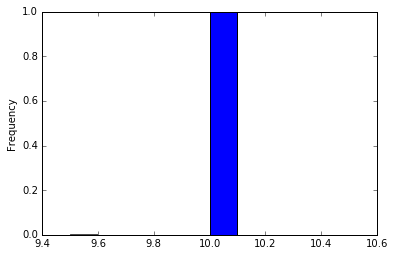

XTE1459
É mais comum no 8.0 período.


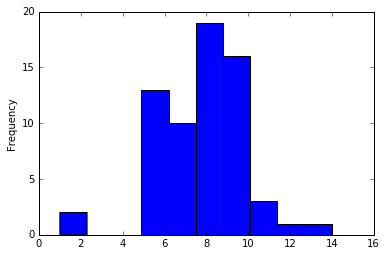

XUA1468
É mais comum no 13.0 período.


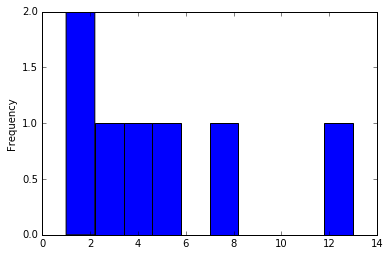

XUD1435
É mais comum no 5.0 período.


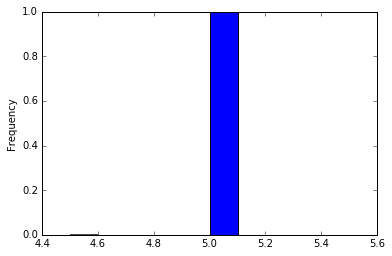

XVJ1544
É mais comum no 4.0 período.


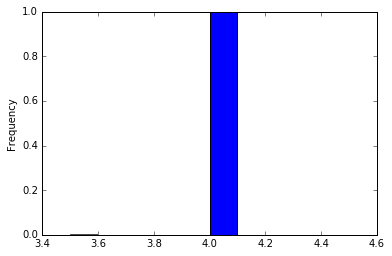

XWB1221
É mais comum no 10.0 período.


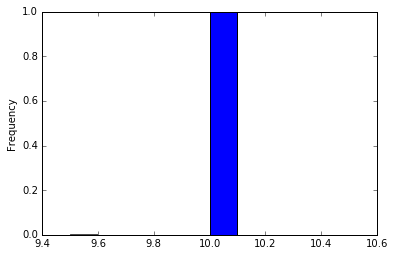

XWF1750
É mais comum no 1.0 período.


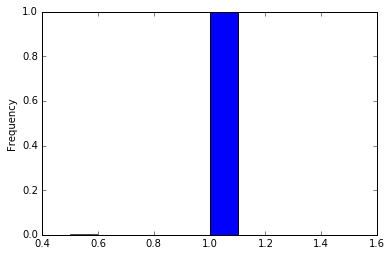

XXQ1884
É mais comum no 6.0 período.


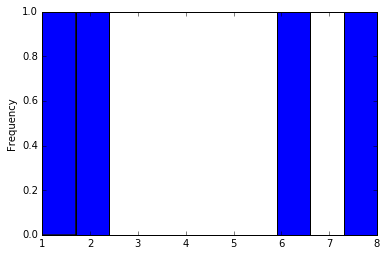

YAG1059
É mais comum no 2.0 período.


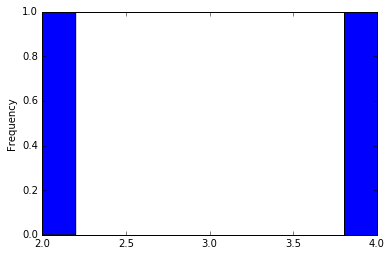

YBU1652
É mais comum no 3.0 período.


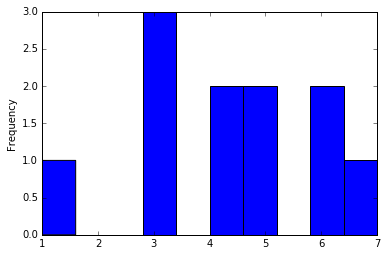

YCH1541
É mais comum no 1.0 período.


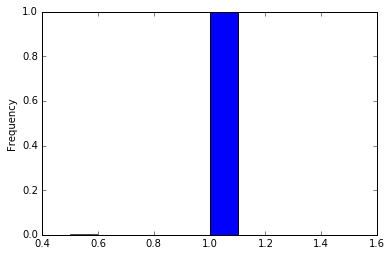

YCI1568
É mais comum no 1.0 período.


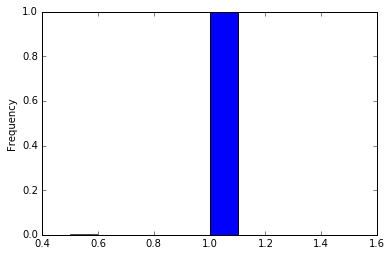

YCP1873
É mais comum no 1.0 período.


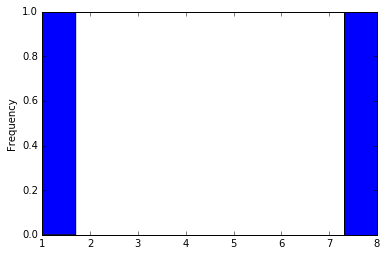

YDD1109
É mais comum no 2.0 período.


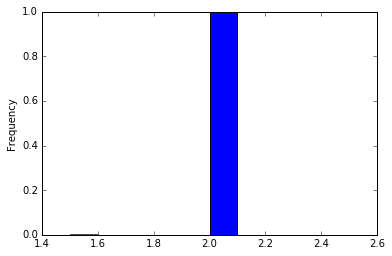

YDX1068
É mais comum no 1.0 período.


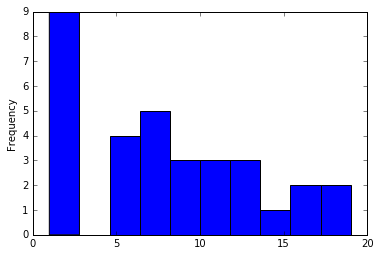

YFW1403
É mais comum no 11.0 período.


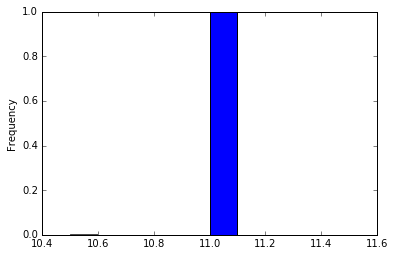

YFY1147
É mais comum no 3.0 período.


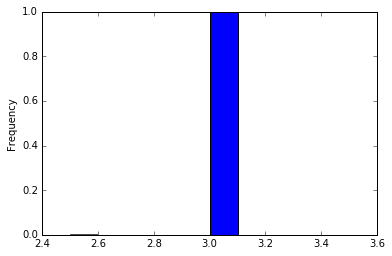

YGX1761
É mais comum no 4.0 período.


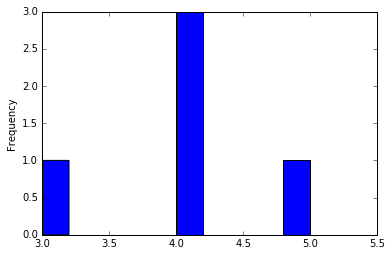

YHL1620
É mais comum no 1.0 período.


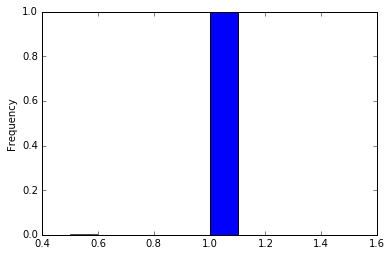

YIH1531
É mais comum no 2.0 período.


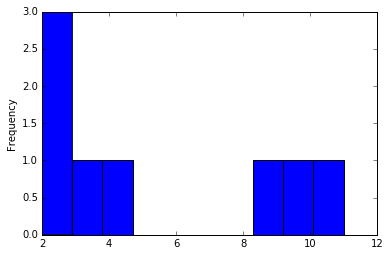

YIL1859
É mais comum no 2.0 período.


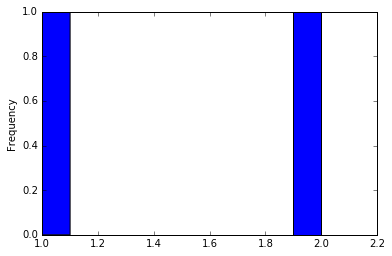

YIM1155
É mais comum no 9.0 período.


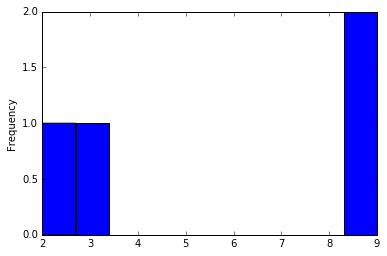

YIV1842
É mais comum no 1.0 período.


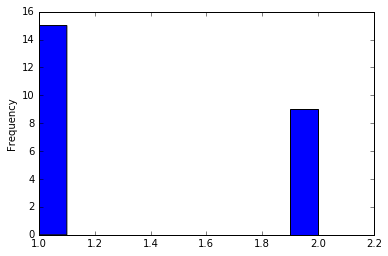

YJL1484
É mais comum no 2.0 período.


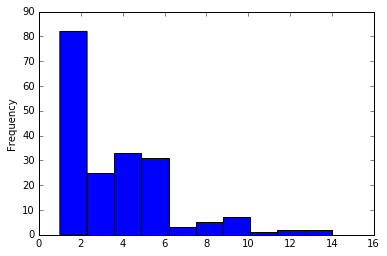

YLM1925
É mais comum no 1.0 período.


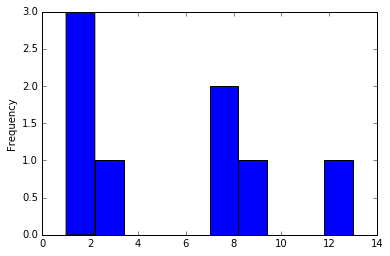

YLN1319
É mais comum no 4.0 período.


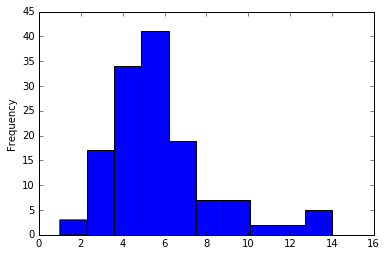

YMO1184
É mais comum no 2.0 período.


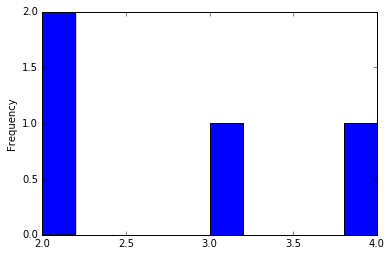

YNS1598
É mais comum no 1.0 período.


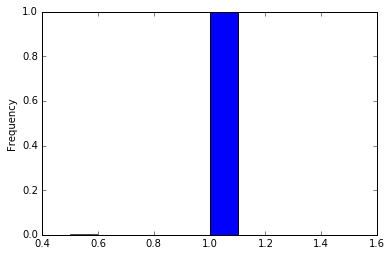

YON1382
É mais comum no 1.0 período.


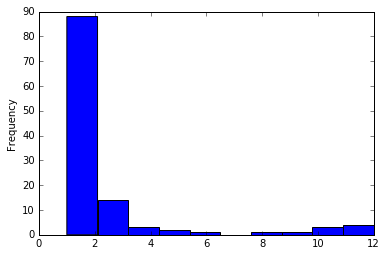

YPC1912
É mais comum no 3.0 período.


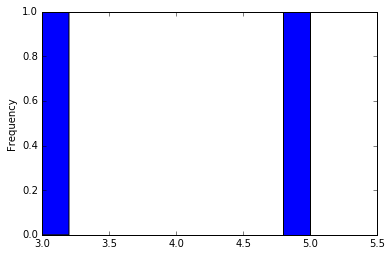

YRG1293
É mais comum no 1.0 período.


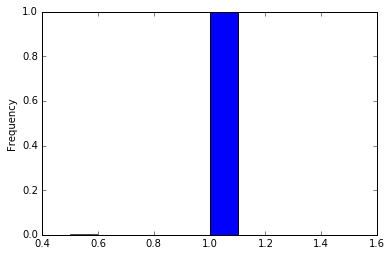

YRN1452
É mais comum no 1.0 período.


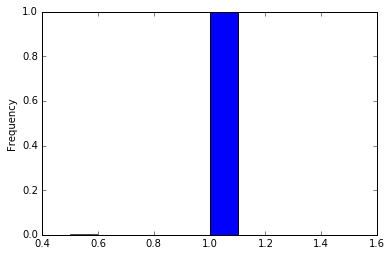

YRU1037
É mais comum no 1.0 período.


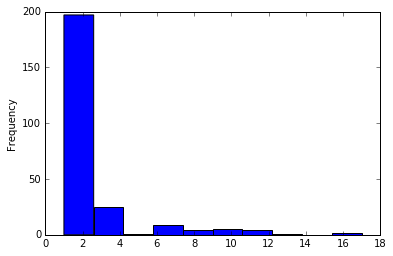

YSC1405
É mais comum no 1.0 período.


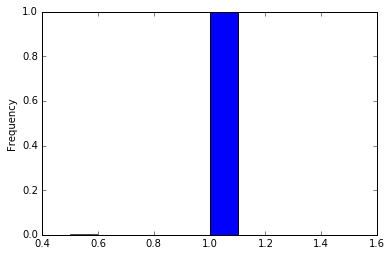

YSG1092
É mais comum no 8.0 período.


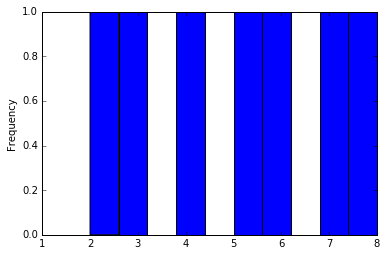

YTE1193
É mais comum no 3.0 período.


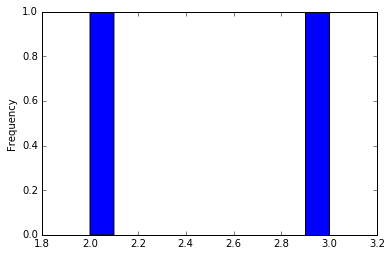

YVY1067
É mais comum no 1.0 período.


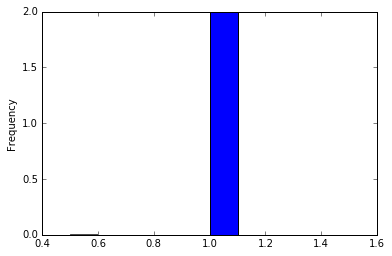

YXJ1787
É mais comum no 6.0 período.


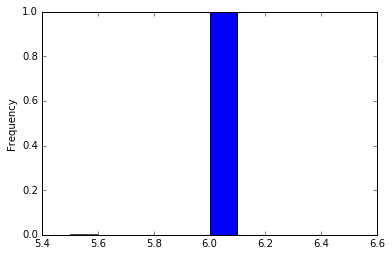

ZAA1039
É mais comum no 7.0 período.


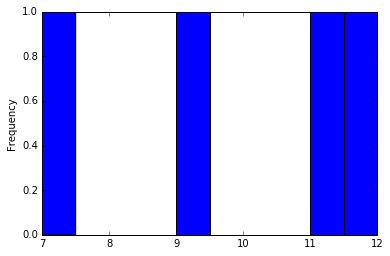

ZAB1614
É mais comum no 6.0 período.


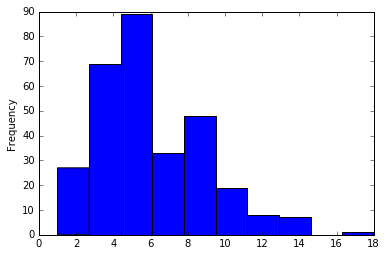

ZBC1955
É mais comum no 2.0 período.


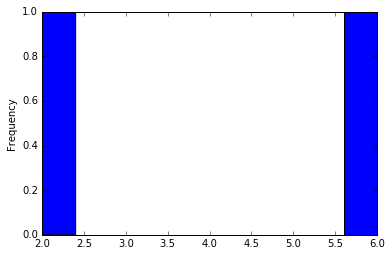

ZBN1239
É mais comum no 8.0 período.


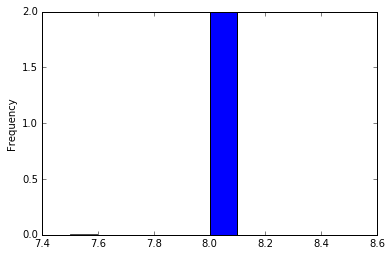

ZCK1597
É mais comum no 10.0 período.


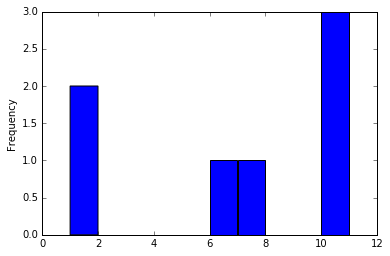

ZCO1654
É mais comum no 3.0 período.


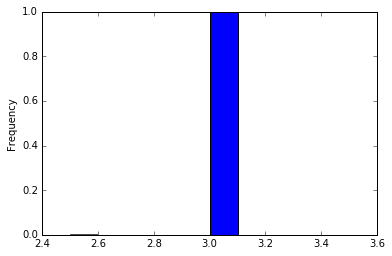

ZDM1475
É mais comum no 9.0 período.


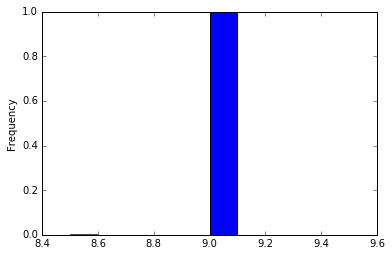

ZFS1657
É mais comum no 1.0 período.


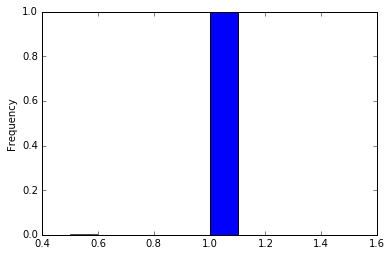

ZGN1248
É mais comum no 1.0 período.


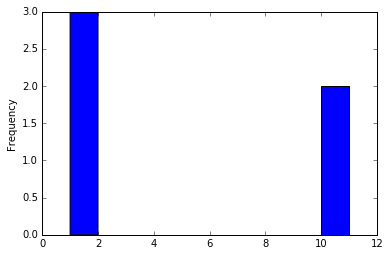

ZGU1982
É mais comum no 2.0 período.


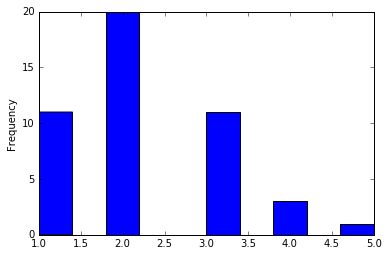

ZHI1635
É mais comum no 2.0 período.


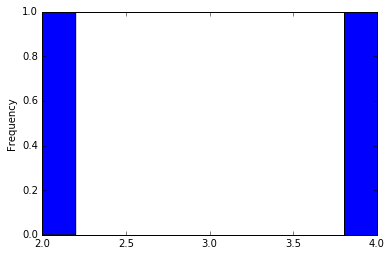

ZHP1616
É mais comum no 5.0 período.


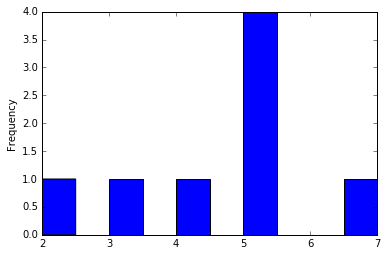

ZHR1630
É mais comum no 1.0 período.


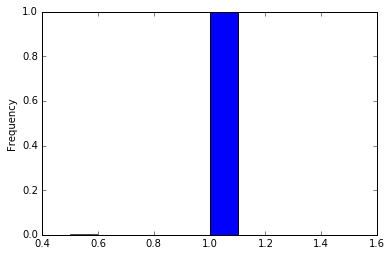

ZJC1496
É mais comum no 9.0 período.


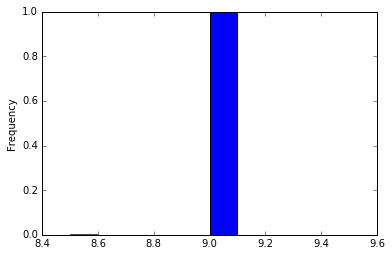

ZKO1742
É mais comum no 8.0 período.


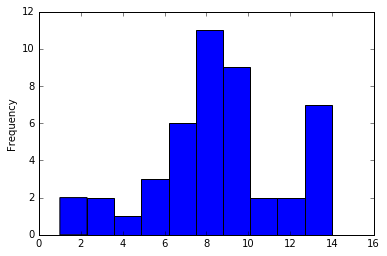

ZLF1756
É mais comum no 11.0 período.


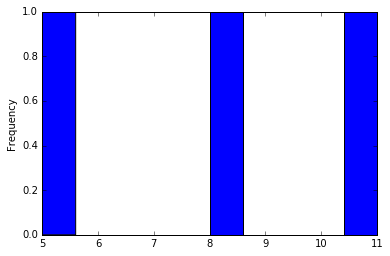

ZOF1897
É mais comum no 1.0 período.


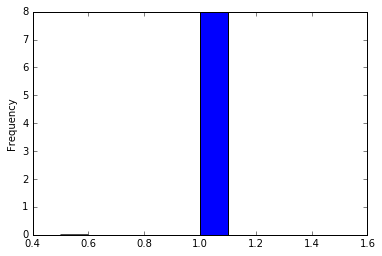

ZOQ1175
É mais comum no 3.0 período.


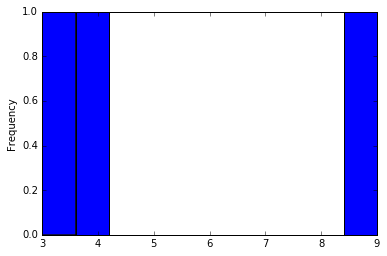

ZOX1909
É mais comum no 1.0 período.


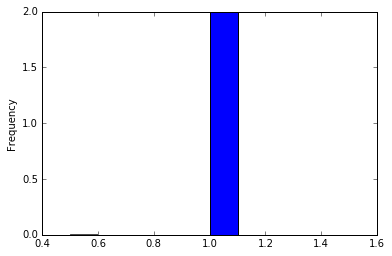

ZQI1906
É mais comum no 3.0 período.


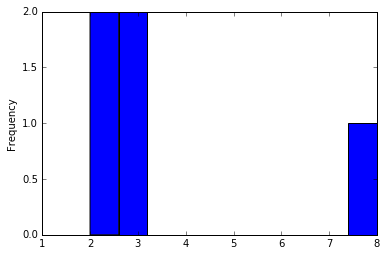

ZQT1470
É mais comum no 4.0 período.


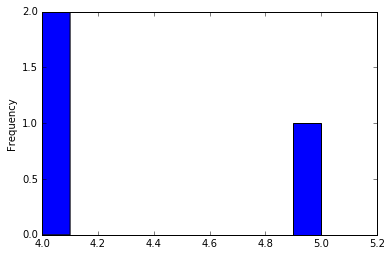

ZSH1259
É mais comum no 11.0 período.


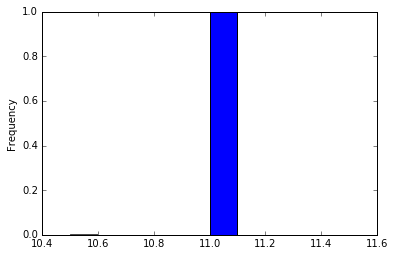

ZSY1680
É mais comum no 8.0 período.


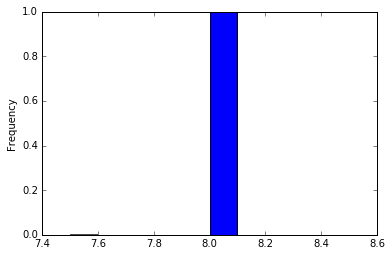

ZTD1349
É mais comum no 3.0 período.


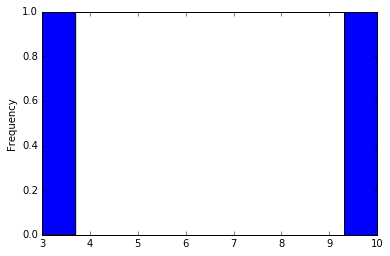

ZTN1374
É mais comum no 4.0 período.


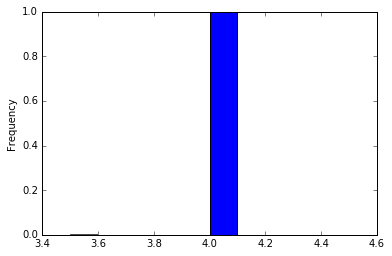

ZUA1290
É mais comum no 7.0 período.


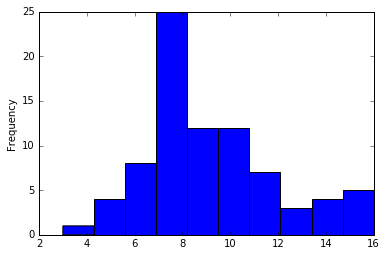

ZUM1351
É mais comum no 1.0 período.


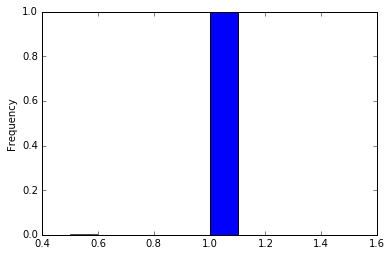

ZUP1734
É mais comum no 3.0 período.


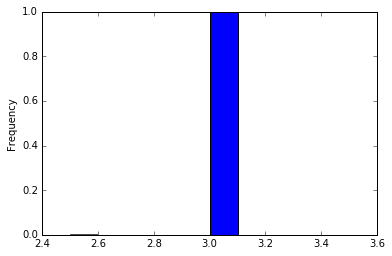

ZVV1111
É mais comum no 1.0 período.


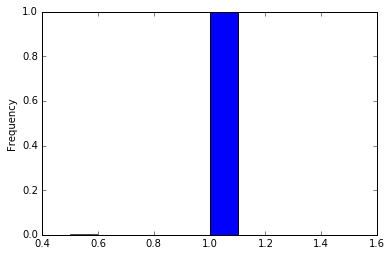

ZWI1753
É mais comum no 1.0 período.


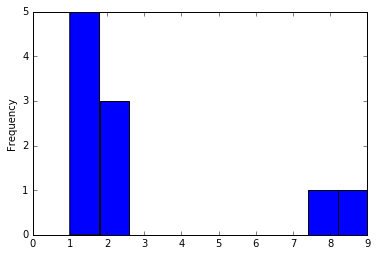

ZWP1278
É mais comum no 11.0 período.


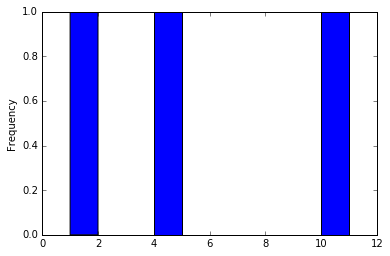

ZWY1590
É mais comum no 1.0 período.


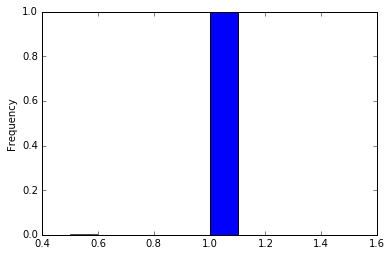

ZXD1314
É mais comum no 1.0 período.


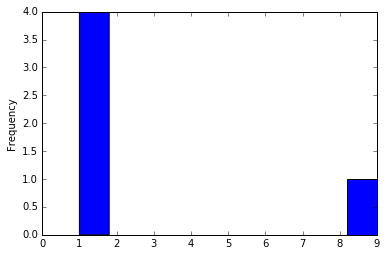

ZXK1612
É mais comum no 3.0 período.


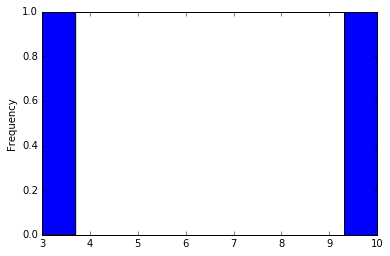

ZXU1320
É mais comum no 1.0 período.


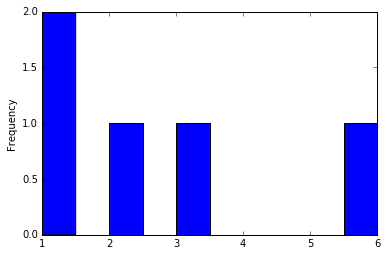

ZZX1347
É mais comum no 3.0 período.


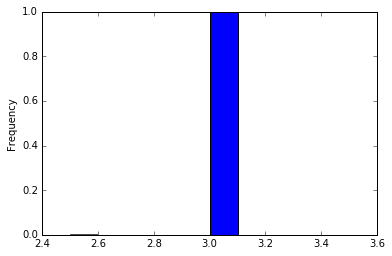

In [17]:
aux = df.groupby('disciplina')
%matplotlib inline
for index, row in aux:
    print(index)
    print("É mais comum no "+ str(row['período corrente'].value_counts().index[0]) +" período.")
    row['período corrente'].plot.hist()
    plt.show()


### 6. Para alguma disciplina faz diferença o aluno cursá-la no primeiro, segundo, ... período? Com relação ao grau? Cancelamento?

Esta análise é interessante. Pelos resultados que observei, nas matérias em que há uma maior correlação entre período e grau - em geral - não há muita variação de período. Eis então as disciplinas com maior correlação entre grau e período, tal como a média de grau das pessoas que a cursam em determinado período.

In [18]:
for course in df[~pd.isnull(df['grau'])]['disciplina'].unique():
    aux2 = pd.DataFrame()
    aux = df[(~pd.isnull(df['grau'])) & (df.disciplina == course)].groupby('período corrente')['grau'].agg('mean')
    aux2['periodo'] = aux.index
    aux2['grau'] = aux.values
    if (~pd.isnull(aux2.corr().grau[0])) & (0.7 < aux2.corr().grau[0] <= 1):
        print(course)
        print(aux2)
        print(aux2.corr().grau[0]) 

ECS1920
   periodo  grau
0        3   6.2
1        4   6.4
1.0
HXZ1743
   periodo      grau
0        1  4.881818
1        2  7.400000
1.0
YIV1842
   periodo      grau
0        1  3.309091
1        2  3.585714
1.0
WKW1070
   periodo  grau
0        1   5.0
1        2   8.1
1.0
OWM1192
   periodo  grau
0        1   7.4
1        3   9.3
1.0
ZXD1314
   periodo  grau
0        1   8.0
1        9   8.6
1.0
JFV1877
   periodo  grau
0        1   7.1
1        9  10.0
1.0
RTW1504
   periodo  grau
0        2  9.30
1        3  9.35
1.0
KBR1233
   periodo  grau
0        3   7.8
1        8   9.7
1.0
AFE1114
    periodo      grau
0         3  5.700000
1         5  6.266667
2         6  6.000000
3         7  6.800000
4         8  6.237500
5         9  6.785714
6        10  7.850000
7        11  6.875000
8        12  6.500000
9        13  7.033333
10       15  8.300000
0.783469846164
NZD1329
   periodo  grau
0        1   6.0
1        5   8.7
1.0
GXA1656
   periodo  grau
0        2   0.0
1        3   7.5


De forma similar, calculamos a correlação entre o período em que cada matéria foi cursada e o número de cancelamentos observado. Pegamos aqui, novamente, as disciplinas com maior correlação.

In [19]:
for course in df[~pd.isnull(df['grau'])]['disciplina'].unique():
    aux2 = pd.DataFrame()
    aux = df[(df.disciplina == course) & (df['sit.final'].isin(['CL', 'DT', 'LT']))].groupby('período corrente')['sit.final'].agg('count')
    aux2['período'] = aux.index
    aux2['contagem'] = aux.values
    if (~pd.isnull(aux2.corr()['contagem'][0])) & (0.6 < aux2.corr()['contagem'][0] <= 1):
        print(course)
        print(aux2)
        print(aux2.corr()['contagem'][0])

WJB1342
   período  contagem
0        2         1
1        3         2
1.0
OUT1489
   período  contagem
0        1         1
1        4         1
2        6         1
3        7         2
4        8         2
5        9         3
6       10         1
7       11         5
8       12         4
9       13         2
0.614263817792
CAB1609
   período  contagem
0        2         1
1        4         1
2        7         2
0.917662935482
GYX1745
   período  contagem
0        4         1
1        5         1
2        6         2
3        7         3
4        8         2
5        9         3
6       12         3
0.806561712249
VSG1332
   período  contagem
0        3         1
1        6         2
1.0


### 7. Existe correlação entre número de créditos cursados num período e grau do aluno?

Aqui, calculamos - para cada aluno - o número de créditos que cursou em cada período, relacionando-o com a média de seus graus naquele período. Não achamos correlação entre as duas medidas. 

In [20]:
# Remove créditos transferidos e disciplinas canceladas antes do período letivo
a = df[(~df['sit.final'].isin(['CT', 'CD', 'CJ', 'CA'])) & ('NA' not in df['matrícula'])].groupby(['matrícula', 'período'])
a1 = a['créditos'].aggregate(np.sum)
a2 = a['grau'].aggregate(np.mean)
a3 = a['sit.final'].aggregate(np.sum)
cat = pd.concat([a1,a2], axis=1, join='inner').dropna()
print(cat.corr().grau[0])

0.149655513635


### 8. Existe correlação entre número de créditos cursados num período e evasão (número de cancelamentos)?

Novamente, calculando a correlação entre o número de créditos cursados e matérias canceladas, por cada aluno, a cada período, encontramos correlação muito fraca.

In [21]:
aux = df[~df['sit.final'].isin(['CT', 'CD', 'CJ', 'CA'])].groupby(['matrícula', 'período'])
aux = aux['créditos'].agg('sum')
aux2 = df[df['sit.final'].isin(['CL', 'DT', 'LT'])].groupby(['matrícula', 'período'])

aux2 = aux2['sit.final'].agg('count')

result = pd.concat([aux, aux2], axis=1, join='inner')
print(result.corr()['sit.final'][0])

0.279908954513


### 9. Em quais tuplas o professor parece fazer diferença no número de alunos matriculados? Na distribuição do grau final dos alunos? E no número de cancelamentos?

### 10. Em que situações os alunos mais desistem do curso? (Por exemplo: Após serem reprovados em quantas/quais disciplinas (e quantas vezes)? Após terem cursado quantos créditos?)

Essa análise é interessante e se relaciona, também, ao que fizemos na parte inicial do trabalho. A pergunta que estou querendo responder aqui é: após quantos períodos é mais comum que os alunos desistam do curso?

In [22]:
print("> Most people dropout after the "+ str(df[df['sit.final'] == 'AT']['período corrente'].mode().values) + " term.\n")


> Most people dropout after the [ 1.] term.



Bem, esse resultado era esperado, afinal no começo do curso as pessoas não tem certeza se é a carreira que querem seguir. Outro motivo muito comum, ainda mais se esse dataset pertencer à PUC, é que ao longo do primeiro período surgem reclassificações de universidades públicas. Muitos alunos as preferem pelo elevado preço da mensalidade das universidades privadas.
Vamos avaliar um pouco melhor...

In [23]:
print(df[df['sit.final'] == 'AT']['período corrente'].describe())


count    867.000000
mean       2.596309
std        2.769995
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max       17.000000
Name: período corrente, dtype: float64


Novamente, vemos que mais de 50% dos alunos que desiste do curso o faz no primeiro período. 75% até o terceiro período. Ou seja, a maioria das desistências está realmente concentrada no começo do curso. Imagino que seja normal, visto que depois de alguns anos de dedicação, é realmente difícil admitir derrota e tentar outros caminhos.

Por último, podemos observar, dentre os alunos que trancaram a matrícula e abandonaram o curso, que matérias mais reprovaram antes de desistir?

In [24]:
failures = []
for student in df[df['sit.final'] == 'AT']['matrícula'] :
    for row in df[(df['matrícula'] == student) & (df['sit.final'].isin(['RM', 'RF']))]['disciplina']:
        failures.append(row)
Counter(failures).most_common(10)

[('GOZ1785', 249),
 ('OBS1959', 241),
 ('GUO1361', 198),
 ('GLJ1776', 180),
 ('PBJ1031', 150),
 ('AKJ1977', 144),
 ('YRU1037', 140),
 ('MKK1957', 134),
 ('DWU1433', 122),
 ('HOW1491', 120)]

### 11. Faz sentido agrupar os alunos em clusters? Em quantos clusters? Como você descreveria os alunos de cada cluster?

### 12. Quais são os caminhos mais bem sucedidos (com graus maiores; menores taxas de cancelamento ou reprovação)? E os mais mal sucedidos?